<a href="https://colab.research.google.com/github/xuankai91/AlgorithmsSpecialisation/blob/main/Coursera_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asymptoptic Notation

If big $\text{O}$ represents the upper asymptoptic bound of an alogrithm's complexity,
big $\Omega$ represents the lower asymptoptic bound,
and big $\Theta$ represents the lower & upper bound - i.e. "average" complexity runtime


# DIVIDE & CONQUER

Algorithms that break down problems into smaller sub-problems, and then solving them recursively back up.

Examples include sorting, searching, and randomised algorithms

# Merge Sort

for every input array of $n$ numbers, merge-sort produces a sorted output array that uses at most $6n \cdot log_{2}n + 6n$ operations.
- $6n$ is the number of work done at each level
- $log_{2}n + 1 $ is the depth of the traversal levels

In [ ]:
x = [5,4,1,8,7,2,6,3]

In [ ]:
##
def merge(arr1,arr2):
  new_arr = []
  while True:
    if len(arr1) > 0 and len(arr2) > 0:
      if arr1[0] > arr2[0]:
        new_arr.append(arr2.pop(0))
      else:
        new_arr.append(arr1.pop(0))
    elif len(arr1) == 0:
      new_arr += arr2
      break
    elif len(arr2) == 0:
      new_arr += arr1
      break

  return new_arr

##
def merge_v2(arr1,arr2):
  k = len(arr1) + len(arr2)
  new_arr = []
  i = 0
  j = 0
  for _ in range(k):
    if i == len(arr1): # this should be a final step
      new_arr += arr2[j:]
      break
    elif j == len(arr2): # this should be a final step
      new_arr += arr1[i:]
      break
    else:
      if arr1[i] < arr2[j]:
        new_arr.append(arr1[i])
        i += 1
      else:
        new_arr.append(arr2[j])
        j += 1

  # while True: #len(new_arr) < k:
  #   if arr1[i] < arr2[j]: # A > B
  #     new_arr.append(arr1[i])
  #     i+=1
  #     if i == len(arr1):
  #       new_arr += arr2[j:]
  #       break
  #   else: # B <= A
  #     new_arr.append(arr2[j])
  #     j+=1
  #     if j == len(arr2):
  #       new_arr += arr1[i:]
  #       break

  return new_arr

def mergeSort(arr):
  n = len(arr)
  if n < 2:
    return arr
  else:
    m = n//2
    return merge(mergeSort(arr[:m]), mergeSort(arr[m:]))

# ##
# def mergeSort(arr):
#   n = len(arr)
#   if n > 3:
#     m = n//2
#     #return merge(mergeSort(arr[:m]),mergeSort(arr[m:]))
#     return merge_v2(mergeSort(arr[:m]),mergeSort(arr[m:]))
#   else: # final split for a 2- or 3-item list
#     arr1 = arr[:1] # this ensures it's a 1-item list
#     arr2 = arr[1:] # this would be a 1- or 2-item list

#     if len(arr2) > 1:
#       if arr2[0] > arr2[1]:
#         arr2 = arr2[::-1]

#     #return merge(arr1,arr2)
#     return merge_v2(arr1,arr2)

In [ ]:
y = mergeSort(x)
print(y, y == sorted(x))

[1, 2, 3, 4, 5, 6, 7, 8] True


# Counting Inversions


in general, in an $n$-element array, the largest number of inversions is ${n \choose 2} = \frac{n(n-1)}{2}$

In [ ]:
#x = [1,3,5,2,4,6]
x = [6,5,3,2,1,4]
print([i+1 for i in range(len(x))])
print(x)

[1, 2, 3, 4, 5, 6]
[6, 5, 3, 2, 1, 4]


In [ ]:
# brute force approach - runtime O(n^2)
count = 0
for idx,i in enumerate(x):
  for j in x[idx+1:]:
    #print(i,j)
    if i > j:
      count += 1

print(count)

12


In [ ]:
def mergeSortCountInv(arr1,arr2):
  new_arr = []
  count = 0
  while True:
    if len(arr1) > 0 and len(arr2) > 0: # both arrays populated
      if arr1[0] > arr2[0]: # if right side smaller
        new_arr.append(arr2.pop(0))
        count += len(arr1)
      else: # if left side smaller
        new_arr.append(arr1.pop(0))
    elif len(arr1) == 0:
      new_arr += arr2
      break
    elif len(arr2) == 0:
      new_arr += arr1
      break
  return new_arr, count

# def mergeSortCountInv_v2(arr1,arr2):
#   k = len(arr1) + len(arr2)
#   new_arr = []
#   i = 0
#   j = 0
#   count = 0
#   for _ in range(k):
#     if i == len(arr1): # this should be a final step
#       new_arr += arr2[j:]
#       break # need to break otherwise for loop will continue running
#     elif j == len(arr2): # this should be a final step
#       new_arr += arr1[i:]
#       break
#     else:
#       if arr1[i] < arr2[j]:
#         new_arr.append(arr1[i])
#         i += 1
#       else: # RHS < LHS, add remaining length of LHS
#         new_arr.append(arr2[j])
#         j += 1
#         count += (len(arr1)-i)
#   return new_arr, count

def countInversion(arr, count=0):
  length = len(arr)
  if length == 1:
    return arr,count
  else:
    m = length//2
    sorted_lh, ct_lh = countInversion(arr[:m],count)
    sorted_rh, ct_rh = countInversion(arr[m:],count)
    sorted_arr, ct = mergeSortCountInv(sorted_lh,sorted_rh)
    # sorted_arr, ct = mergeSortCountInv_v2(sorted_lh,sorted_rh)

    return sorted_arr, ct+ct_lh+ct_rh

In [ ]:
print(x)
_, c = countInversion(x)
print(c)

[6, 5, 3, 2, 1, 4]
12


# Strassen's Subcubic Matrix Multiplication



---
Background: brute-force run-time of matrix multiplication:

Take for example matrices $X$ & $Y$, where each is a $n × n$ matrix, then each entry (denoted $z_{ij}$)  in the product of $X \cdot Y$ is then $z_{ij} = ∑^{n}_{k=1}x_{ik}y_{kj}$

So each entry takes $n$-steps to calculate, and for a  $n × n$ matrix product,
implies an average runtime of $\Theta(n^3)$

---

Assuming $n$ is a multiple of $2$,
for any matrix $X$ and $Y$, if we divide them into quadrants such that $
X = \begin{bmatrix}
\begin{matrix}A\end{matrix} & \begin{matrix}B\end{matrix} \\
\begin{matrix}C\end{matrix} & \begin{matrix}D\end{matrix} \\
\end{bmatrix},
Y = \begin{bmatrix}
\begin{matrix}E\end{matrix} & \begin{matrix}F\end{matrix} \\
\begin{matrix}G\end{matrix} & \begin{matrix}H\end{matrix} \\
\end{bmatrix}
$,
where
$A = \begin{bmatrix}
a_{1,1} & \ldots & a_{1,n} \\
\vdots  & \ddots & \vdots \\
a_{n,1} & \ldots & a_{n,n} \\
\end{bmatrix}$ etc

Then

$$
X \cdot Y = \begin{bmatrix}
\begin{matrix}AE+BG\end{matrix} &
\begin{matrix}AF+BH\end{matrix} \\
\begin{matrix}CE+DG\end{matrix} &
\begin{matrix}CF+DH\end{matrix} \\
\end{bmatrix}
$$

Observing that at each (recursive step), there are 8 unique products.

---

Strassen's Algorithm reduces runtime by computing only 7 (carefully chosen) products, and then do the necessary additions/subtractions:

The 7 products are:
$$
\begin{align}
\\ P_{1} &= A(F-H)
\\ P_{2} &= (A+B)H
\\ P_{3} &= (C+D)E
\\ P_{4} &= D(G-E)
\\ P_{5} &= (A+D)(E+H)
\\ P_{6} &= (B-D)(G+H)
\\ P_{7} &= (A-C)(E+F)
\end{align}
$$

Then
$$
X \cdot Y = \begin{bmatrix}
\begin{matrix}P_{5}+P_{4}-P_{2}+P_{6}\end{matrix} &
\begin{matrix}P_{1}+P_{2}\end{matrix} \\
\begin{matrix}P_{3}+P_{4}\end{matrix} &
\begin{matrix}P_{1}+P_{5}-P_{3}+P_{7}\end{matrix} \\
\end{bmatrix}
$$

which runs in sub-cubic time


# Closest Pair



---
given a set of $n$ points on a plane $P = \{ p_1,\dots,p_n \}$, find the pair of points with the minimum Euclidean distance $d$.

If $p_i = (x_i,y_i)$ and $p_j = (x_j,y_j)$, then the distance is:

$$
d(p_i,p_j) = \sqrt{(x_i - x_j)^2 + (x_i - y_j)^2}
$$

In [ ]:
def euclid(p1,p2):
  return sum([(x1-x2)**2 for x1,x2 in zip(p1,p2)])**0.5

In [ ]:
P = [(2,2),(1,0),(0,1),(4,1)]
print(P)

[(1, 0), (0, 1), (4, 1), (2, 2)]


In [ ]:
gp = lambda n, fac: randint(-int(n**fac),int(n**fac))

In [ ]:
gp(10,1.7)

-2

In [ ]:
from random import randint, uniform
def generate_points(max_len,fac=2,points_type='integers'):
  if points_type=='integers':
    gp = lambda max_len, fac: randint(-int(max_len**fac),int(max_len**fac))
  elif points_type=='floats':
    gp = lambda max_len, fac: round(uniform(-max_len/10,max_len/10),fac)
  else:
    print('Choose either "integers" or "floats"')
    return -1

  # P = []
  # while len(P) < max_len:
  #   p = (gp(max_len, fac),gp(max_len, fac))
  #   if p not in P:
  #     P.append(p)

  # create X
  X = []
  while len(X) < max_len:
    x = gp(max_len,fac)
    if x not in X:
      X.append(x)

  # create Y
  Y = []
  while len(Y) < max_len:
    y = gp(max_len,fac)
    if y not in Y:
      Y.append(y)

  P = list(zip(X,Y))
  return P

In [ ]:


#P = list(set([(randint(-10,10),randint(-10,10)) for _ in range(10)]))
P = list(set([(round(uniform(-1,1),3),round(uniform(-1,1),3)) for _ in range(10)]))

# # generate distinct x & distinct y values
# max_len = 6
# exp_fac = 1.6
# X = []
# while len(X)<max_len:
#   x = randint(-int(max_len**exp_fac),int(max_len**exp_fac))
#   #x = round(uniform(-max_len/10,max_len/10),2)
#   if x not in X:
#     X.append(x)

# Y = []
# while len(Y)<max_len:
#   y = randint(-int(max_len**exp_fac),int(max_len**exp_fac))
#   #y = round(uniform(-max_len/10,max_len/10),2)
#   if y not in Y:
#     Y.append(y)

#P = list(zip(X,Y))
#P = twoDsort(P)

print(P)
print(len(P))

[(0.193, 0.438), (0.7, 0.134), (-0.357, 0.378), (0.871, 0.194), (-0.432, 0.213), (0.975, -0.748), (-0.829, 0.955), (0.869, -0.419), (0.658, 0.184), (0.487, 0.06)]
10


In [ ]:
# brute force
def bruteForceClosestPair(P):
  min_d = float('inf')
  p1,p2 = None,None

  for p in P:
    for q in P:
      if p == q:
        continue
      else:
        d = euclid(p,q)
        if d < min_d:
          p1,p2 = p,q
          min_d = d

  return p1,p2,min_d

In [ ]:
def closestSplitPair(Px,Py,delta):
  # get midpoint X
  m = len(Px)//2
  x_bar = max([i[0] for i in Px[:m]])

  # get Sy, the set of points where x-values are within x_bar +/- delta
  Sy = []
  for p in Py:
    if (p[0] > (x_bar - delta)) and (p[0] < (x_bar + delta)):
      Sy.append(p)

  #print(Sy,'Sy')

  min_d = delta
  best_pair = (None,None)

  if len(Sy) == 0:
    print('no points in Sy')
    return best_pair, min_d

  for i in range(len(Sy)-1):
    p1 = Sy[i]
    for j in range(1,min(8,len(Sy)-i)): # look at the subsequent 7 points
      #print(Sy,i,j)
      p2 = Sy[i+j]
      d = euclid(p1,p2)

      if d < min_d:
        #print(d)
        best_pair = (p1,p2)
        min_d = d

  return best_pair, min_d


def closestPair(Px,Py):
  n = len(Px)
  if n == 2:
    return Px[0], Px[1], euclid(*Px)
  elif n == 1:
    print('wtf?')
  else:
    m = n//2
    Q, R = Px[:m], Px[m:]

    # form Qx, Qy, Rx, Ry
    Qx = Q.copy()
    Qy = [q for q in Py if q in Q]
    Rx = R.copy()
    Ry = [r for r in Py if r in R]

    Qd, Rd = float('inf'), float('inf')

    if len(Q) >= 2: #if len(Q) == 1, this won't run & won't continue to split
      #print('Q:',Q)
      p1,q1,Qd = closestPair(Qx,Qy)

    if len(R) >= 2: #if len(R) == 1, this won't run & won't continue to split
      #print('R:',R)
      p2,q2,Rd = closestPair(Rx,Ry)

    min_d = min(Qd,Rd)

    (p3,q3),d3 = closestSplitPair(Px,Py,min_d)
    #print('min_d:',min_d,'d3:',d3)

    if p3 is not None:
      #print(Q,R,d3,'split')
      return p3,q3,d3
    else:
      if Qd < Rd:
        #print(Q,R,min_d,'left',Rd)
        return p1,q1,Qd
      else:
        #print(Q,R,min_d,'right',Qd)
        return p2,q2,Rd


In [ ]:
P = generate_points(1000,4,points_type = 'floats')
print(P[:10])

[(-26.0814, -68.2896), (80.6224, 39.6344), (80.0298, 10.4829), (-62.2266, -87.801), (99.0171, -39.4987), (-87.1011, -41.5802), (21.1048, -33.968), (0.9411, 61.9303), (-59.3889, -14.0159), (91.2958, -98.3358)]


In [ ]:
%%timeit -n 1 -r 1
print(bruteForceClosestPair(P))

((-36.8075, 27.8831), (-36.8639, 27.6139), 0.2750447236359921)
1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1
#print(P)
Px = sorted(P)
Py = sorted(P, key = lambda x:x[1])
print(closestPair(Px,Py))

((-36.8639, 27.6139), (-36.8075, 27.8831), 0.2750447236359921)
58.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Master Method

---

If
$$T(n) \leq aT(\frac{n}{b})+O(n^d)$$
then
$$
\begin{equation}
  T(n)=\left\{
  \begin{array}{@{}ll@{}}
    O(n^d \log{n}), & \text{if}\ a=b^d \\
    O(n^d), & \text{if}\ a<b^d \\
    O(n^{\log_{b}{a}}), & \text{if}\ a>b^d
  \end{array}\right.
\end{equation}
$$

where
* $a$ is the number of recursive calls ($\geq 1$)
* $b$ is the divisor to split each subproblem ($>1$)
* $d$ is the number of steps needed to combine the recursion ($\geq 0$)

---
For a recursion tree with levels $j = 0,1,2,\dots,\log_{b}{n}$

$$
\text{Total work} \leq cn^d \times \sum_{j=0}^{\log_{b}{n}} (\frac{a}{b^d})^j
$$

---

Interpretation
* $a$ is the rate of subproblem proliferation (RSP)
* $b^d$ is the rate of work shrinkage per subproblem (RWS)

This implies 3 fundamental types of recursion trees:
1. RSP = RWS; same amount of work done at each level
2. RSP < RWS; less work done at each level => most work done at the root
3. RSP > RWS; more work done at each level => most work done at the leaves

Thus, $\frac{a}{b^d}$ is the main differentiating factor of the type of recursion tree being analysed.




# QuickSort

In [ ]:
import random

It is important to add in the random choice of index, instead of just taking the first element.

Because in the worst case, an already sorted array is passed into the function. Then at every recursive call, it will pass in an array of $n-1$, resulting in a runtime of $O(n^2)$.

However, we still need to preprocess array by swapping selected index with first index, because the linear scan only takes in entries subsequent to the selected index (i.e. only on the right).

In [ ]:
def quickSort(A):
  if len(A) <= 1:
    return A
  else:
    # randomly choose an index (to reduce chances of worst case runtime)
    l = random.randint(0,len(A)-1)

    # preprocess (swap selected index with start element)
    A[0],A[l] = A[l],A[0] # if l is 0, then no swap will take place

    # partition A around p
    p = A[0]

    # start sort
    i = 1
    for j in range(1,len(A)): #skip the first step
      if A[j] < p: # if A[j] > p, do nothing
        A[j], A[i] = A[i], A[j] # swap leftmost >p with new element
        i += 1

    #final swap
    A[0], A[i-1] = A[i-1], A[0]

    # recursive sort
    A[:i-1] = quickSort(A[:i-1])
    A[i:] = quickSort(A[i:])

    return A

In [ ]:
x = [3,8,2,5,1,4,7,6]
quickSort(x)

[1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
n = 100
# x = []
# while len(x) < n:
#   i = random.randint(0,n**2)
#   if i not in x:
#     x.append(i)

x = [random.randint(0,n**2) for _ in range(n)]

# take copy for check, cuz sort runs in place
y = x.copy()
x = quickSort(x)

print(y[:10],'...' if n > 10 else '')
print(x[:10],'...' if n > 10 else '')
print('correct' if x == sorted(y) else 'wrong')

[1330, 3367, 421, 7320, 3022, 6834, 4936, 2481, 1164, 2066] ...
[44, 51, 263, 327, 421, 550, 801, 958, 961, 1068] ...
correct


# Randomised Selection

Problem setup:
for any array $n$, we want to pick the $i$-th smallest element

---

Runtime: $\Theta(n)$

In [ ]:
import random

In [ ]:
def partition(A):
  # randomly choose an index (to reduce chances of worst case runtime)
  l = random.randint(0,len(A)-1)

  # preprocess (swap selected index with start element)
  A[0],A[l] = A[l],A[0] # if l is 0, then no swap will take place

  # partition A around p
  p = A[0]
  #print('chose',p)

  # start sort
  i = 1
  for j in range(1,len(A)): #skip the first step
    if A[j] < p: # if A[j] > p, do nothing
      A[j], A[i] = A[i], A[j] # swap leftmost >p with new element
      i += 1

  #final swap
  A[0], A[i-1] = A[i-1], A[0]

  return A, i-1

def RSelect(A,oi):
  #print(oi,A)
  assert oi > 0, 'oi is position, not index'
  assert oi <= len(A), f'order index out of range, max index is {len(A)}'
  if len(A) == 1:
    return A[0]
  else:
    A, j = partition(A)

    if j == (oi-1): #oi:
      return A[j]
    elif j > (oi-1):
      return RSelect(A[:j],oi)
    elif j < (oi-1):
      return RSelect(A[j+1:],oi-j-1)

In [ ]:
x = [3,8,2,5,1,4,7,6]
RSelect(x,8)

8

In [ ]:
x = [10,8,2,4]
RSelect(x,1)

2

In [ ]:
def generate_distinct_series(n=20):
  x = []
  while len(x) < n:
    i = random.randint(0,n**2)
    if i not in x:
      x.append(i)

  return x

def RSelect_unit_test(x_len):
  x = generate_distinct_series(x_len)

  idx = random.randint(1,x_len)
  if RSelect(x,idx) == sorted(x)[idx-1]:
    return True
  else:
    return False

In [ ]:
score = 0
n_tests = 50
for _ in range(n_tests):
  x_len = random.randint(10,100)
  score += RSelect_unit_test(x_len)

print(score/n_tests)

1.0


# Deterministic Selection

In [ ]:
# deterministic selection
def Dpartition(A,p):
  # get index of p
  l = A.index(p)

  # preprocess (swap selected index with start element)
  A[0],A[l] = A[l],A[0] # if l is 0, then no swap will take place

  # partition A around p
  # start sort
  i = 1
  for j in range(1,len(A)): #skip the first step
    if A[j] < p: # if A[j] > p, do nothing
      A[j], A[i] = A[i], A[j] # swap leftmost >p with new element
      i += 1

  #final swap
  A[0], A[i-1] = A[i-1], A[0]

  return A, i-1

def DSelect(A,oi):
  n = len(A)
  #print(oi,A)
  assert oi <= n, f'order index out of range, max index is {n}'
  if n == 1:
    return A[0]
  else:
    ## "Median" of "Medians"
    # admin
    if n <= 5:
      end_idx = 0

    # Break A into 5 groups, get middle elements
    C = []
    start_idx = 0
    for end_idx in range(5,n,5):
      x_ = sorted(A[start_idx:end_idx])
      C.append(x_[2]) # append median (technically, middle item)
      start_idx = end_idx

    if end_idx < n:
      x_ = sorted(A[start_idx:])
      C.append(x_[len(x_)//2])

    # select from "median"
    p = DSelect(C,1+(n//10))

    ##
    # print(f'partitioning {A} around p:{p}')
    A, j = Dpartition(A,p)

    #print('oi:',oi,', j:',j)
    if j == (oi-1):
      return A[j]
    elif j > (oi-1):
      return DSelect(A[:j],oi)
    elif j < (oi-1):
      return DSelect(A[j+1:],oi-j-1)

In [ ]:
x = [3,8,2,5,1,4,7,6]
DSelect(x,8)

8

In [ ]:
def generate_distinct_series(n=20):
  x = []
  while len(x) < n:
    i = random.randint(0,n**2)
    if i not in x:
      x.append(i)
  return x

def DSelect_unit_test(x_len):
  x = generate_distinct_series(x_len)

  idx = random.randint(1,x_len)
  if DSelect(x,idx) == sorted(x)[idx-1]:
    return True
  else:
    return False

In [ ]:
score = 0
n_tests = 50
for _ in range(n_tests):
  x_len = random.randint(10,100)
  score += DSelect_unit_test(x_len)

print(score/n_tests)

1.0


Note: Deterministic Selection is not as efficient as Random Selection in practice (due to extra steps & memory overhead requirements), even though it avoids the worst case scenario of $\text{O}(n^2)$

# Random Contraction Algorithms

Graphs are comprised of **vertices** (a.k.a. nodes) and **edges**.

Edges can be **undirected** (unordered pair) or **directed** (ordered pair).

*Parallel edges* mean that 2 vertices are connected by multiple edges.

**Arcs** are a series of directed edges.

A **cut** partitions a graph into two non-empty sets of nodes. a **crossing edge** refers to an edge that connects vertices in both graphs.

---

By convention, $n=$ no. of nodes and $m=$ no. of edges.

Graphs can be represented as *Adjacency Matrices* (where $A_{ij} =$ 1 if there is a connection between nodes $i$ & $j$, 0 otherwise), better suited for dense graphs.

Alternatively, sparse graphs better suit *Adjacency Lists*, where there are two arrays, one for vertices/nodes & one for edges. Each edge points towards its endpoints i.e. "head", while each vertex points to edges incident on it. Better suited for sparse graphs.

---

The goal of a minimum cut algorithm is to compute a cut with the fewest number of crossing edges.

# GRAPH SEARCH

Input: starting (a.k.a. source) vertex

General graph search Goals:
1. Find everything findable from a given start vertex (i.e. every node that has a path to the start vertex)
2. Do it efficiently - don't explore anything twice ($O(m + n)$ time)

---

Breadth-First Search (BFS)
- explore nodes in "layers"
- can compute shortest paths
- can compute connected components of an undirected graph

---

Depth-First Search (DFS)
- explore aggresively (like a maze), backtrack only when necessary
- compute topological ordering of directed acyclic graph
- compute connected components in directed graphs

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

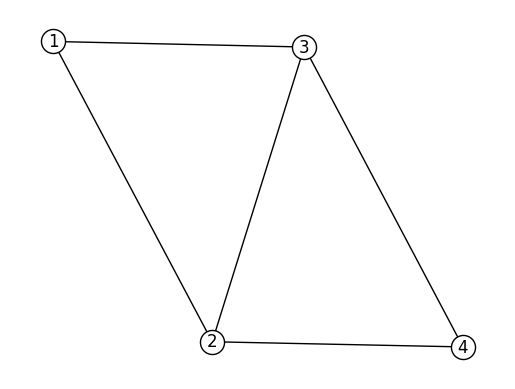

In [ ]:
# undirected graph
G = nx.Graph()
edge_list = [(1, 2),
             (1, 3),
             (2, 3),
             (2, 4),
             (3, 4)]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

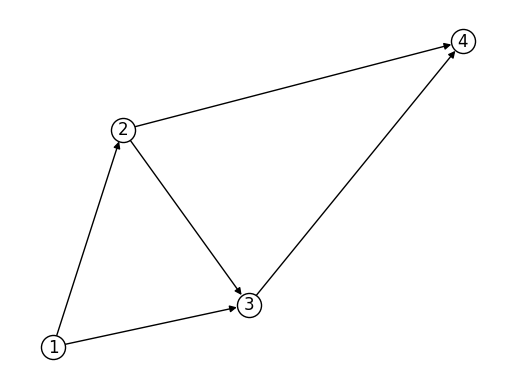

In [ ]:
# directed graph
G = nx.DiGraph()
edge_list = [(1, 2),
             (1, 3),
             (2, 3),
             (2, 4),
             (3, 4)]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

## Breadth-First Search

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

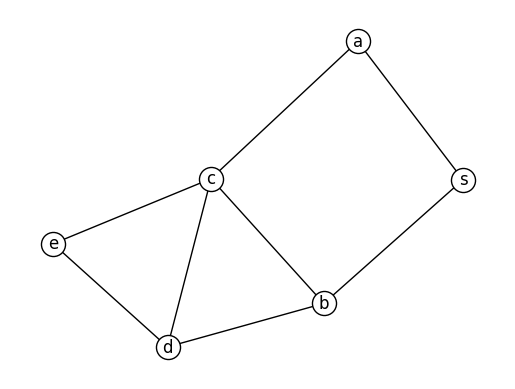

In [ ]:
G = nx.Graph()
edge_list = [('s','a'),
             ('s','b'),
             ('a','c'),
             ('b','c'),
             ('b','d'),
             ('c','d'),
             ('c','e'),
             ('d','e')]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

In [ ]:
def BFS(G,start_vertex):
  dist = {start_vertex:0} #shortest path init
  Q = [start_vertex] # to be a FIFO queue, initialise with start vertex
  while len(Q) > 0:
    #print('current queue:', Q)
    v = Q.pop(0) # remove first item from queue
    for _,w in G.edges(v):
      if w not in dist: #unexplored
        dist[w] = dist[v]+1
        Q.append(w)

  return dist

In [ ]:
ex = BFS(G,'s')
print(ex)

{'s': 0, 'a': 1, 'b': 1, 'c': 2, 'd': 2, 'e': 3}


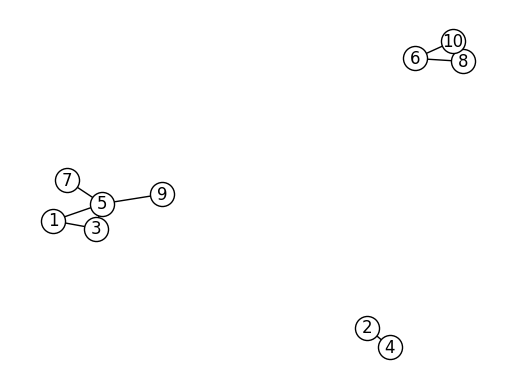

In [ ]:
G = nx.Graph()
edge_list = [(1,3),
             (1,5),
             (3,5),
             (5,7),
             (5,9),
             (2,4),
             (6,8),
             (6,10),
             (8,10)]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

In [ ]:
explored = []
clusters = []

for node in G.nodes:
  if node not in explored:
    exp = BFS(G,node)
    explored_nodes = list(exp.keys())
    clusters.append(explored_nodes)
    explored += explored_nodes

In [ ]:
explored

[1, 3, 5, 7, 9, 2, 4, 6, 8, 10]

## Depth-First Search

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Take for example the directed acyclic graph below:

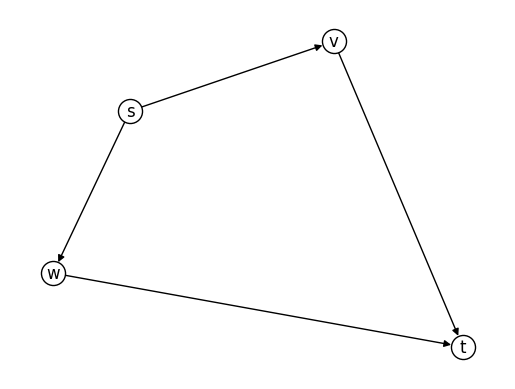

The topological order can only be either $s > v > w > t$ or $s > w > v > t$.

Note that topological order can only occur in directed acyclic graphs (i.e. no directed cycles). Directed acyclic graphs have at least one "sink" vertex, i.e. a node with no outgoing edges.

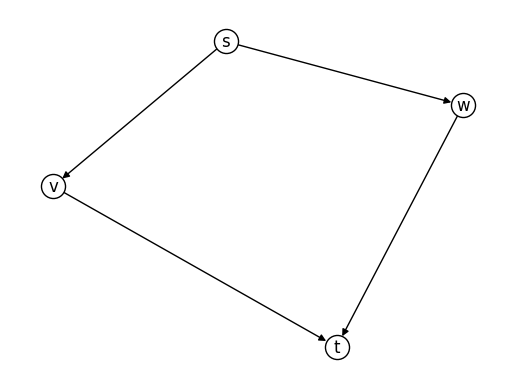

In [ ]:
G = nx.DiGraph()
edge_list = [('s','v'),
             ('s','w'),
             ('v','t'),
             ('w','t')]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

In [ ]:
# def DFS(G,start_vertex,explored=[],old_links=[]):
#   if len(explored) == 0:
#     explored = [start_vertex]
#   else:
#     explored.append(start_vertex)
#   #Q = [start_vertex] # to be a LIFO stack, initialise with start vertex

#   links = [w for _,w in G.edges(start_vertex)]
#   #print(start_vertex,'links to',links,'from',old_links)

#   for w in links:
#     if (w not in explored) and (w not in old_links):
#       #print(explored)
#       explored = DFS(G,w,explored,links+old_links)
#       #print(w)

#   return explored

def DFS_loop(G):
  order = {}
  current_label = len(G.nodes)

  for v in G.nodes:
    #print(order)
    if v not in order:
      order, current_label = DFS(G,v,order,current_label)

  return order

def DFS(G,start_vertex,order,current_label):
  for _,w in G.edges(start_vertex):
    if w not in order:
      order, current_label = DFS(G,w,order,current_label)

  order[start_vertex] = current_label
  current_label -= 1

  return order, current_label


In [ ]:
od = DFS_loop(G)
print(od)

{'t': 4, 'v': 3, 'w': 2, 's': 1}


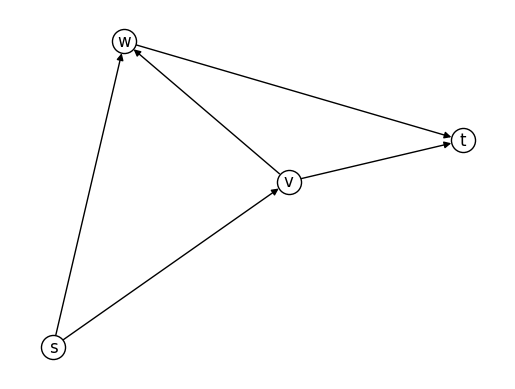

In [ ]:
G = nx.DiGraph()
edge_list = [('s','v'),
             ('s','w'),
             ('v','t'),
             ('w','t'),
             ('v','w')]
G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, with_labels=True,node_color='w',edgecolors='k')

In [ ]:
od = DFS_loop(G)
print(od)

{'t': 4, 'w': 3, 'v': 2, 's': 1}


# Strongest Connected Components


A directed graph is called strongly connected if there is a path in each direction between each pair of vertices of the graph. The strongly connected components of an arbitrary directed graph form a partition into subgraphs that are themselves strongly connected.

*Kosaraju's Two-Pass Algorithm*:

For a given directed graph $G$
1. Let $G^{rev}$ = $G$ with all arcs reversed
2. Run DFS-Loop on $G^{rev}$ => each label $f(v)$ is the "finishing time" of each node $v$
3. RUn DFS-Loop on $G$ => processing nodes in decreasing order of finishing times

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
#mcolors.BASE_COLORS

In [ ]:
# def DFS_loop(G):
#   global explored
#   explored = []

#   finishing_time = {}
#   leader = {}

#   t = 0
#   s = None

#   # explored
#   nodes = list(G.nodes)
#   nodes.sort(reverse=True)

#   for v in nodes:
#     #print(order)
#     if v not in explored:
#       s = v
#       finishing_time, leader, t = DFS(G,v,finishing_time,leader,t,s)


#   ks = list(finishing_time.keys())
#   ks.sort()
#   finishing_time = {i: finishing_time[i] for i in ks}

#   return finishing_time, leader

# def DFS(G,start_vertex,finishing_time,leader,t,s):
#   explored.append(start_vertex)
#   leader[start_vertex] = s

#   for _,w in G.edges(start_vertex):
#     if w not in explored:
#       finishing_time, leader, t = DFS(G,w,finishing_time,leader,t,s)

#   t += 1
#   finishing_time[start_vertex] = t

#   return finishing_time, leader, t

# ##
# def reverse_graph(G,ft):
#   edge_list = []
#   for edges in G.edges:
#     x,y = edges
#     edge_list.append((ft[y],ft[x]))

#   return edge_list

In [ ]:
def DFS_loop(G):

  ## init
  explored = []
  finishing_time = {}
  leader = {}
  t = [0] # needs to be a mutable object (e.g. list), cannot directly assign a variable
  s = None # keeps track of leader nodes

  ## inner DFS function
  def DFS(G,start_vertex):
    explored.append(start_vertex)
    leader[start_vertex] = s
    for _,w in G.edges(start_vertex):
      if w not in explored:
        DFS(G,w)

    # if cannot recurse anymore, run the below code & exit function
    t[0] += 1
    finishing_time[start_vertex] = t[0]

  ## main ##
  nodes = list(G.nodes)
  #nodes.sort(reverse=True)
  nodes.sort()

  for v in nodes:
    #print(order)
    if v not in explored:
      s = v
      DFS(G,v)

  return finishing_time, leader

In [ ]:
def Kosaraju_algorithm(G):

  # first pass: finishing times
  ft, _ = DFS_loop(G)

  # reverse graph
  G_rev = nx.DiGraph()

  rev_edge_list = []
  for edges in G.edges:
    x,y = edges
    rev_edge_list.append((ft[y],ft[x]))

  G_rev.add_edges_from(rev_edge_list)

  # # plot to check
  # subax1 = plt.subplot(111)
  # nx.draw(G_rev, with_labels=True,node_color='w',edgecolors='k')

  # second pass: leader nodes
  _, ldr = DFS_loop(G_rev)

  # decode the original node names
  reverse_ft = {v:k for k,v in ft.items()}
  leaders = {reverse_ft[n]:reverse_ft[l] for n,l in ldr.items()}

  # clusters = {}
  # for k,v in cls.items():
  #   clusters[reverse_ft[k]] = [reverse_ft[nn] for nn in v]

  return leaders

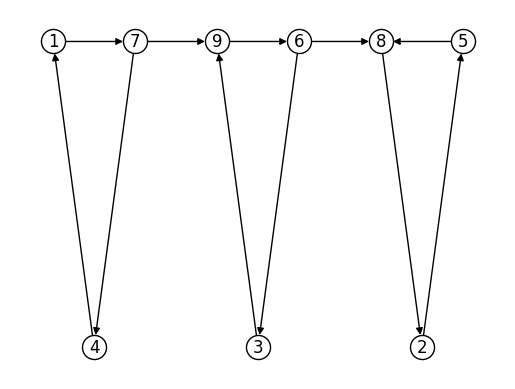

In [ ]:
G = nx.DiGraph()
edge_list = [(1,7),
             (7,4),
             (4,1),
             (7,9),
             (9,6),
             (6,3),
             (3,9),
             (6,8),
             (8,2),
             (2,5),
             (5,8)]


Gpos = {n:(i,1) for i,n in enumerate([1,7,9,6,8,5])}
Gpos.update({n:(i,0) for i,n in zip([.5,2.5,4.5],[4,3,2])})

G.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G, Gpos, with_labels=True,node_color='w',edgecolors='k')

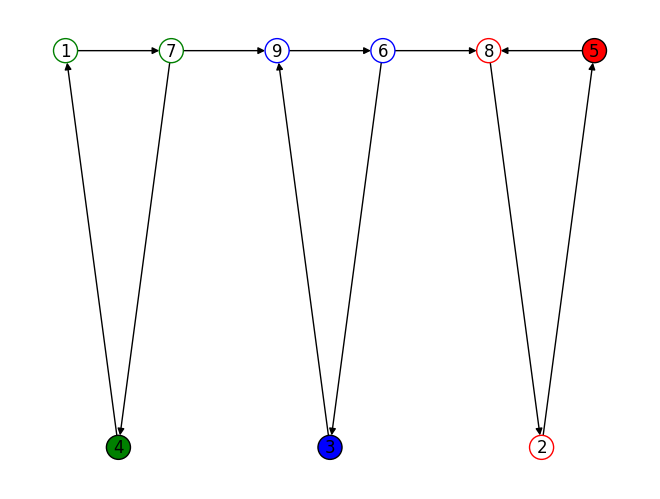

In [ ]:
leaders = Kosaraju_algorithm(G)
leader_nodes = list(set(leaders.values()))

cmap = list(mcolors.BASE_COLORS.keys())
ldr_colors = {}

# set leader nodes colors first
for i,node in enumerate(leader_nodes):
  ldr_colors[node] = cmap[i]


# set fill & edge colors
fill_map = []
edge_map = []

for node in G:
  if node in leader_nodes:
    fill_map.append(ldr_colors[node])
    edge_map.append('k')
  else:
    fill_map.append('w')
    edge_map.append(ldr_colors[leaders[node]])


# color_map = []
# for node in G:
#     if node in clusters:
#         color_map.append('b')
#     else:
#         color_map.append('w')

nx.draw(G, Gpos, with_labels=True, node_color=fill_map,edgecolors=edge_map)
plt.show()

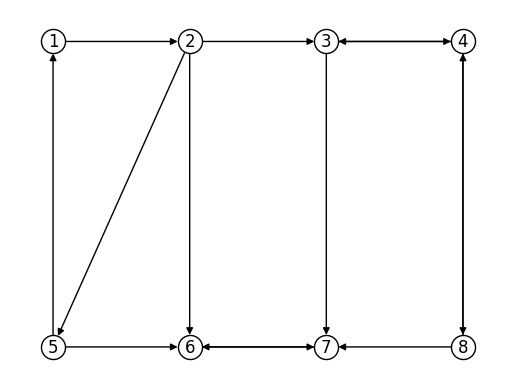

In [ ]:
G2 = nx.DiGraph()
edge_list = [(1,2),
             (2,3),(2,5),(2,6),
             (3,4),(3,7),
             (4,3),(4,8),
             (5,1),(5,6),
             (6,7),
             (7,6),
             (8,4),(8,7)]

G2pos = {n:(i,1) for i,n in enumerate([1,2,3,4])}
G2pos.update({n:(i,0) for i,n in enumerate([5,6,7,8])})

G2.add_edges_from(edge_list)
subax1 = plt.subplot(111)
nx.draw(G2, G2pos, with_labels=True,node_color='w',edgecolors='k')

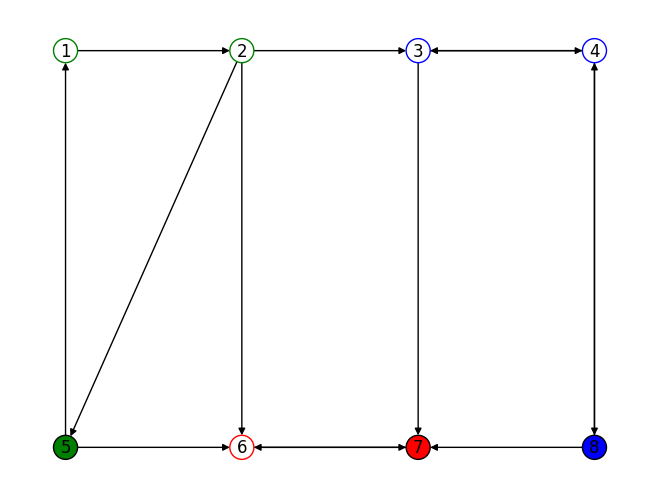

In [ ]:
leaders = Kosaraju_algorithm(G2)
leader_nodes = list(set(leaders.values()))

cmap = list(mcolors.BASE_COLORS.keys())
ldr_colors = {}

# set leader nodes colors first
for i,node in enumerate(leader_nodes):
  ldr_colors[node] = cmap[i]


# set fill & edge colors
fill_map = []
edge_map = []

for node in G2:
  if node in leader_nodes:
    fill_map.append(ldr_colors[node])
    edge_map.append('k')
  else:
    fill_map.append('w')
    edge_map.append(ldr_colors[leaders[node]])

nx.draw(G2,G2pos, with_labels=True, node_color=fill_map,edgecolors=edge_map)

# Djikstra's Algorithm



*   Cousin of breadth-first search (special case when all edge lengths = 1)
*   Assumptions
  * There is a at least one path from source $s$ to vertex $v$.
  * All edge lengths must be non-negative


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def dijkstra(G,s):

  # first list all nodes
  V = list(G.nodes)

  # remove souce node s from unexplored nodes
  X = [s] #vertices explored so far
  V.remove(s)

  # initialise dictionary to store distances & paths
  A = {s:0} # computed shortest path distance
  B = {s:[s]} # computed shortest path

  while len(V) > 0:
    #print(f'exploring X:{X} to V:{V}')
    current_min = float('inf')
    v_,w_ = None, None

    for v,w in G.edges(X):
      if (v in X) and (w in X):
        continue #skip loop if edge already explored

      length_vw = G.get_edge_data(v,w)['weight']

      explored_length = A[v] + length_vw

      if explored_length < current_min:
        current_min = explored_length
        v_,w_  = v,w

    A[w_] = current_min
    B[w_] = B[v_] + [w_]

    #print(f'shorted path from X:{X} to V:{V} is {A[w_]} via {B[w_]}')

    X.append(w_)
    V.remove(w_)

  return A,B


In [ ]:
import heapq as hq
def dijkstra_heap(G,s):
  '''
  Invariant 1: elements in heap = vertices of V - X
  Invariant 2: for v not in X, key[v] = smallest Dijkstra greedy score of an edge (u,v) with u in X
  '''
  #  initialise heap to order nodes by shortest distances (0 for root)
  V = [(float('inf'),e) if e!=s else (0,e) for e in list(G.nodes)]
  hq.heapify(V) # turn list into a heap

  # keep track of nodes + shortest paths
  A = {s:0}

  #
  while len(V) > 0:
    _, w = hq.heappop(V) # pick priority
    #print(w)
    # get shortest path to head
    for v in G.predecessors(w):
      if v not in A:
        continue
      l_vw = A[v] + G.get_edge_data(v,w)['weight']
      if l_vw < A[w]:
        A[w] = l_vw

    # get shortest path from head to nodes outside new boundary
    for w_ in G.neighbors(w):
      if w_ in A:
        continue
      l_ww_ = A[w] + G.get_edge_data(w,w_)['weight']
      if l_ww_ < A.get(w_,float('inf')):
        # replace path lengths for nodes outside new frontier
        V.remove((A.get(w_,float('inf')),w_))

        # update tracking dict
        A[w_] = l_ww_

        # push back onto heap
        hq.heappush(V,(A[w_],w_))

  return A

{('s', 'v'): Text(0.49999933305662125, 0.7499996665283105, '1'),
 ('s', 'w'): Text(0.49999933305662125, 0.2500003334716895, '4'),
 ('v', 't'): Text(1.4999993330566215, 0.7500003334716893, '6'),
 ('v', 'w'): Text(1.0, 0.49999798333738, '2'),
 ('w', 't'): Text(1.4999993330566215, 0.24999966652831063, '3')}

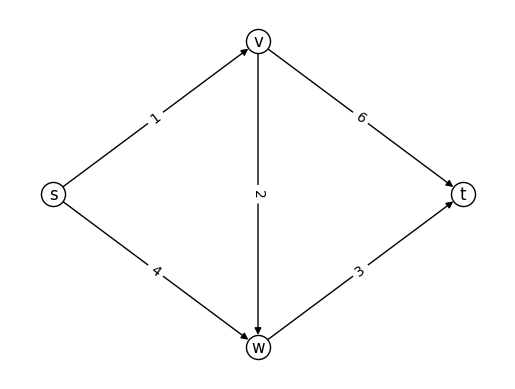

In [ ]:
G1 = nx.DiGraph()
edge_list = [('s','v',1),
             ('s','w',4),
             ('v','t',6),
             ('v','w',2),
             ('w','t',3)]


G1.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)
#pos1=nx.spring_layout(G)
pos1 = {'s':(0,0.5),
       'v':(1,1),
       'w':(1,0),
       't':(2,0.5)}


nx.draw(G1, pos1,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

In [ ]:
#%timeit  l,p = dijkstra(G1,'s')
l,p = dijkstra(G1,'s')
print(l)

{'s': 0, 'v': 1, 'w': 3, 't': 6}


In [ ]:
#%timeit l_ = dijkstra_heap(G1,'s')
l_ = dijkstra_heap(G1,'s')
print(l_)

{'s': 0, 'v': 1, 'w': 3, 't': 6}


{(1, 2): Text(0.24999992531957108, -5.551115123125783e-17, '7'),
 (1, 3): Text(0.24999845010461288, 0.24999845010461286, '9'),
 (1, 6): Text(0.1250002848391887, 0.25000056967837747, '14'),
 (2, 3): Text(0.5, 0.25001301313750446, '10'),
 (2, 4): Text(0.6250002848391887, 0.25000056967837747, '15'),
 (3, 4): Text(0.625002001062967, 0.4999999999999999, '11'),
 (3, 6): Text(0.3749979989370331, 0.4999999999999999, '2'),
 (6, 5): Text(0.49999845010461297, 0.7499984501046125, '9'),
 (4, 5): Text(0.75, 0.7500130131375043, '6')}

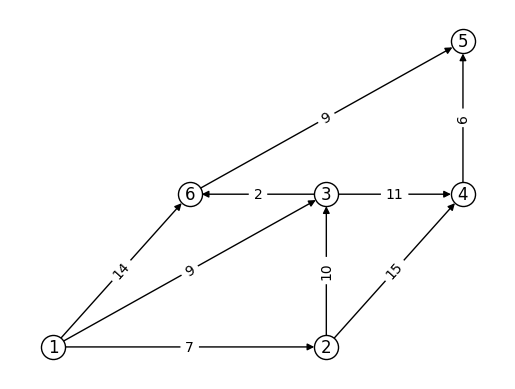

In [ ]:
G2 = nx.DiGraph()
edge_list = [(1,2,7),
             (1,3,9),
             (1,6,14),
             (2,3,10),
             (2,4,15),
             (3,4,11),
             (3,6,2),
             (4,5,6),
             (6,5,9)]


G2.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)
#pos2=nx.circular_layout(G2)
pos2 = {1:(0,0),
        2:(.5,0),
        3:(.5,0.5),
        4:(.75,0.5),
        5:(.75,1),
        6:(.25,0.5)}

nx.draw(G2, pos2,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2,pos2,edge_labels=labels)

In [ ]:
#%timeit l,p = dijkstra(G2,1)
l,p = dijkstra(G2,1)
print(l)
#print(p[5])

{1: 0, 2: 7, 3: 9, 6: 11, 4: 20, 5: 20}


In [ ]:
#%timeit l_ = dijkstra_heap(G2,1)
l_ = dijkstra_heap(G2,1)
print(l_)

{1: 0, 2: 7, 3: 9, 6: 11, 4: 20, 5: 20}


# DATA STRUCTURES

Data structures organise data so it can be accessed quickly and usefully.

E.g. lists, stacks, queues, heaps, search trees, hashtables,
bloom filters, union-find, etc.

Different data structures support different sets of operations => suitable for different types of tasks

Rule of Thumb: choose the “minimal” data structure that supports all the operations that you need.


# Heap

A container for objects that have (numeric) keys e.g. employer records, network edges, events, etc.

Heaps support the following main operations:
* INSERT: add a new object to a heap, $O(\log{n})$ runtime
* EXTRACT-MIN (or -MAX): remove an object in heap with a minimum (or maximum) key value, $O(\log{n})$ runtime. (Note: min or max operations are mutually exclusive)
* HEAPIFY: $n$-batched inserts, $O(n)$ runtime
* DELETE: delete objects from heap, $O(\log{n})$ runtime

Canonical use of heap: fast way to do **repeated minimum (or maximum) computations**.

---

Heap property:
* A heap is a rooted binary tree, as complete as possible
* For a Min-Heap, at every node $x$, $\text{Key}[x] \leq$ all keys of $x$'s children
  * vice versa for a Max-Heap
* Consequence: object at root must have a minimum (or maximum) key value

---

Instead of a tree, heap can be represented as an array, with array indices representing level-by-location of each node.

Note: starting indices with 1 instead of 0 makes calculations easier.

So, for an object at index $i$,

$
\begin{equation}
  \text{parent}(i)=\left\{
  \begin{array}{@{}ll@{}}
    i/2, & \text{if}\ i \text{ is even} \\
    \lfloor {i/2} \rfloor, & \text{if}\ i \text{ is odd} \\
  \end{array}\right.
\end{equation}
$

and

$\text{children}(i)$ are $2i$ & $2i+1$

Note: $\lfloor \cdot \rfloor$ is the floor (i.e. round down) operator.

---

*Example 1* - HeapSort:
1. Insert all $n$ elements into a heap.
2. Extract-Min to pluck out elements in sorted order

Running time: $2n$ heap operations = $O(\log{n})$ time

---

*Example 2* - Event Manager:

"Priority Queue" - synonym for heap
* Objects are event records (action/update to occur at given time in the future)
* Key is the time event scheduled to occur

Extract-Min yields the next scheduled event

---

*Example 3* - Median Maintenance:

Say a sequence of numbers, $\{x_{1},\cdots, x_{n}\}$ are given one-by-one. Return, at each time step $i$, the median of $\{ x_{1},\cdots, x_{i} \}$ in $O(\log{i})$ time.

Solution: Maintain 2 heaps
* $H_{LOW}$ supports Extract-Max
* $H_{HIGH}$ supports Extract-Min

Maintain invariant that ~$i/2$ smallest elements in $H_{LOW}$, and remaining ~$i/2$ largest in $H_{HIGH}$.

Then,
1. At each step, insert $x_{i}$ into either heap by comparison based on last known median
  * when $i$=0, median=$x_{i}$
2. If heaps are imbalanced (elements in one heap exceed the other by >1 element) then a simple extract from the larger heap & insert (of the extracted element) into the smaller heap maintains the balance.
3. Return Median:
  * If $i$ is even, then median is the average of $\text{Extract-Max}(H_{LOW})$ and $\text{Extract-Min}(H_{LOW})$.
  * If $i$ is odd, then median is the $\text{Extract-Min/Max}$ of the larger heap.


In [ ]:
class MinHeap:
  def __init__(self,arr):
    self.heap = [0] #init with 1 element to make index calcs easier

    for x in arr:
      self.insert(x)

  def __call__(self):
    return self.heap[1:]

  def _parent(self,idx):
    return idx // 2

  def _child(self,idx):
    return 2*idx, (2*idx)+1

  ## main functions
  def insert(self,x):
    self.heap.append(x)

    # get indices of new entry
    idx_to_check = len(self.heap) - 1

    # reform heap property (bubble up)
    while True:
      parent_key = self._parent(idx_to_check)

      if (parent_key > 0) and (self.heap[parent_key] > x):
        self.heap[parent_key], self.heap[idx_to_check] = self.heap[idx_to_check], self.heap[parent_key]
        idx_to_check = parent_key
      else:
        break

  def extract_min(self):
    # move last leaf to be new root, and extract root (i.e. mininum)
    self.heap[1], self.heap[-1] = self.heap[-1], self.heap[1]
    min_x = self.heap.pop(-1)

    # maximum index
    max_idx = len(self.heap)-1

    # reform heap property (bubble down)
    idx_to_check = 1
    while True:
      x = self.heap[idx_to_check]
      k_c1, k_c2 = self._child(idx_to_check)

      # first, find smaller child
      if k_c1 <= max_idx: #if k_c1 exists
        if k_c2 <= max_idx: #if k_c2 exists
          if self.heap[k_c1] < self.heap[k_c2]:
            smaller_idx = k_c1
          else:
            smaller_idx = k_c2
        else: #if k_c1 exists but k_c2 does not exist
          smaller_idx = k_c1
      else: #if k_c1 & k_c2 do not exist, end while loop
        break

      # next, swap if child smaller than parent
      #print(self.heap[1:], x, smaller_idx)
      if self.heap[smaller_idx] < x:
        self.heap[idx_to_check], self.heap[smaller_idx] = self.heap[smaller_idx], self.heap[idx_to_check]
        idx_to_check = smaller_idx
      else:
        break

    return min_x


In [ ]:
# heapify & insert
h1 = MinHeap([4,4,8,9,4,12,9,11,13])
print('heap:',h1(),'\n')

for x in [7,10,5]:
  h1.insert(x)
  print(f'insert {x}')
  print(h1(),'\n')

heap: [4, 4, 8, 9, 4, 12, 9, 11, 13] 

insert 7
[4, 4, 8, 9, 4, 12, 9, 11, 13, 7] 

insert 10
[4, 4, 8, 9, 4, 12, 9, 11, 13, 7, 10] 

insert 5
[4, 4, 5, 9, 4, 8, 9, 11, 13, 7, 10, 12] 



In [ ]:
h1 = MinHeap([4,4,8,9,4,12,9,11,13])
print('heap:',h1(),'\n')

for _ in range(5):
  mx = h1.extract_min()
  print('min:',mx)
  print(h1(),'\n')

heap: [4, 4, 8, 9, 4, 12, 9, 11, 13] 

min: 4
[4, 4, 8, 9, 13, 12, 9, 11] 

min: 4
[4, 9, 8, 11, 13, 12, 9] 

min: 4
[8, 9, 9, 11, 13, 12] 

min: 8
[9, 9, 12, 11, 13] 

min: 9
[9, 11, 12, 13] 



# Search Trees

Sorted arrays can perform many functions in $O(\log{n})$ time or better, but only for static data.

If data is dynamic, search trees can perform such functions like a sorted array, but also support fast insert & delete operations.

Operations | Sorted Array | Search Tree
---|:-:|:-:
SEARCH | $O(\log{n})$ | $O(\log{n})$
SELECT | $O(1)$ | $O(\log{n})$
MIN/MAX | $O(1)$ | $O(\log{n})$
PRED/SUCC | $O(1)$ | $O(\log{n})$
RANK | $O(1)$ | $O(\log{n})$
OUTPUT IN SORTED ORDER | $O(n)$ |$O(n)$
INSERT | - | $O(\log{n})$
DELETE | - | $O(\log{n})$

---





## Binary Search Tree

At the most basic version, there is exactly one node per key.
Each node has a
* left child pointer
* right child pointer
* parent pointer

Search Tree Property:
At every given node in the tree,
* all keys to the left of the node must be smaller than the node's key
* all keys to the right of the must be larger than the node's key

Note: There are many possible trees for a set of keys. Height (a.k.a. depth) of the tree can be anywhere from ~$\log{n}$ to ~$n$


```
Tree 1:
   3  
  / \
 1   5
 \   /  
  2 4
```

```
Tree 2
1
 \
  2
   \
    3
     \
      4
       \
        5
```


In [ ]:
class SearchTree:
  def __init__(self,tree):
    self.tree = tree
    self._find_root()

    # size nodes
    for k,v in self.tree.items():
      self.tree[k]['size'] = self._get_node_size(k)

  def __call__(self):
    return self.tree

  def _left(self,node):
    return self.tree[node]['left']

  def _right(self,node):
    return self.tree[node]['right']

  def _parent(self,node):
    return self.tree[node]['parent']

  def _find_root(self):
    if len(self.tree) == 0:
      self.root = None
    else:
      counter = 0
      for k,v in self.tree.items():
        if v['parent'] is None:
          root = k
          counter += 1

      assert counter == 1, 'error: more than 1 root found'
      self.root = root

  def _get_node_size(self,node):
    l_node = self.tree[node]['left']
    r_node = self.tree[node]['right']
    n_left = 0 if l_node is None else self._get_node_size(l_node)
    n_right = 0 if r_node is None else self._get_node_size(r_node)
    return n_left + n_right + 1

  def _find_child_side(self,par_node_info,child_node):
    left_side = par_node_info['left'] == child_node # check left, boolean
    right_side = par_node_info['right'] == child_node # check right, boolean
    assert not(left_side and right_side), 'error finding child side' # both sides true
    if left_side:
      return 'left'
    elif right_side:
      return 'right'

  def _swap_nodes(self,nodeA,nodeB):
    # for every node that is swapped, the parent & children will also be affected
    # list all info that needs to be changed
    nodeA_info = self.tree[nodeA].copy()
    par_nodeA = nodeA_info['parent']
    left_nodeA = nodeA_info['left']
    right_nodeA = nodeA_info['right']
    size_nodeA = nodeA_info['size']
    nodeA_side_at_par = None if par_nodeA is None else self._find_child_side(self.tree[par_nodeA],nodeA) # None if root

    nodeB_info = self.tree[nodeB].copy()
    par_nodeB = nodeB_info['parent']
    left_nodeB = nodeB_info['left']
    right_nodeB = nodeB_info['right']
    size_nodeB = nodeB_info['size']
    nodeB_side_at_par = None if par_nodeB is None else self._find_child_side(self.tree[par_nodeB],nodeB) # None if root

    # start swapping info of nodeA and nodeB
    self.tree[nodeA]['parent'] = par_nodeB if par_nodeB != nodeA else nodeB
    self.tree[nodeA]['left'] = left_nodeB if left_nodeB != nodeA else nodeB
    self.tree[nodeA]['right'] = right_nodeB if right_nodeB != nodeA else nodeB
    self.tree[nodeA]['size'] = size_nodeB

    # start swapping info of nodeB and nodeA
    self.tree[nodeB]['parent'] = par_nodeA if par_nodeA != nodeB else nodeA
    self.tree[nodeB]['left'] = left_nodeA if left_nodeA != nodeB else nodeA
    self.tree[nodeB]['right'] = right_nodeA if right_nodeA != nodeB else nodeA
    self.tree[nodeB]['size'] = size_nodeA

    # rewire parent node of nodeA
    if (par_nodeA is not None) and (par_nodeA != nodeB):
      self.tree[par_nodeA][nodeA_side_at_par] = nodeB

    # rewire parent node of nodeB
    if (par_nodeB is not None) and (par_nodeB != nodeA):
      self.tree[par_nodeB][nodeB_side_at_par] = nodeA

    # rewire children nodes of nodeA
    if (left_nodeA is not None) and (left_nodeA != nodeB):
      self.tree[left_nodeA]['parent'] = nodeB
    if (right_nodeA is not None) and (right_nodeA != nodeB):
      self.tree[right_nodeA]['parent'] = nodeB

    # rewire children nodes of nodeB
    if (left_nodeB is not None) and (left_nodeB != nodeA):
      self.tree[left_nodeB]['parent'] = nodeA
    if (right_nodeB is not None) and (right_nodeB != nodeA):
      self.tree[right_nodeB]['parent'] = nodeA


  ## METHODS ##
  # SEARCH
  def search(self,node,st=None,return_last_searched=False):
    if st is None: st = self.root

    # traverse
    if node == st:
      return st, self.tree[node]
    elif node < st: # go left
      new_st = self._left(st)
    elif node > st: # go right
      new_st = self._right(st)

    if new_st is not None:
      return self.search(node,new_st,return_last_searched = return_last_searched)
    else:
      if return_last_searched:
        return st, None
      else:
        return node, None

  # insert
  def insert(self,node):
    # if tree is empty, simply insert
    if len(self.tree) == 0:
      self.tree.update({node:{'parent':None,'left':None,'right':None}})
      self._find_root()
      self.tree[node]['size'] = 1
      return #end function here

    # start search of tree is not empty
    last_idx,info = self.search(node,return_last_searched=True)
    assert info is None, 'key already exists'

    if node > last_idx:
      self.tree[last_idx]['right'] = node
    else:
      self.tree[last_idx]['left'] = node

    self.tree.update({node:{'parent':last_idx,'left':None,'right':None}})

    # update size
    self.tree[node]['size'] = self._get_node_size(node)
    while True:
      par_node = self.tree[node]['parent']
      if par_node is not None:
        self.tree[par_node]['size'] += 1
        node = par_node
      else:
        break

  # MIN
  def min_x(self,node=None):
    min_x = self.root if node is None else node
    # start checking from here
    while True:
      checkmin = self._left(min_x)
      if checkmin is not None:
        min_x = checkmin
      else:
        return min_x

  # MAX
  def max_x(self,node=None):
    max_x = self.root if node is None else node
    # start checking from here
    while True:
      checkmax = self._right(max_x)
      if checkmax is not None:
        max_x = checkmax
      else:
        return max_x

  # PREDECESSOR
  def pred(self,node):
    if self._left(node) is not None:
      return self.max_x(self._left(node))
    else:
      while True:
        parent = self._parent(node)
        if parent is None:
          return None
        elif parent < node:
          return parent
        else:
          node = parent

  # SUCCESSOR
  def succ(self,node):
    if self._right(node) is not None:
      return self.min_x(self._right(node))
    else:
      while True:
        parent = self._parent(node)
        if parent is None:
          return None
        elif parent >= node:
          return parent
        else:
          node = parent

  # IN-ORDER TRAVERSAL
  def inorder(self,node=None):
    if node is None: node = self.root

    # get left & right nodes
    TL = self._left(node) # left
    TR = self._right(node) # right

    if (TL is None) and (TR is None):
      return [node]
    elif (TL is None):
      return [node] + self.inorder(TR)
    elif (TR is None):
      return self.inorder(TL) + [node]
    else:
      return self.inorder(TL) + [node] + self.inorder(TR)

  # DELETE
  def delete(self,node):
    node_info = self.tree[node].copy()
    left_is_null = node_info['left'] is None
    right_is_null = node_info['right'] is None

    if left_is_null and right_is_null: # if no children
      if node_info['parent'] is not None: # sever links (if not sole remaining node)
        child_node_side = self._find_child_side(self.tree[node_info['parent']],node)
        self.tree[node_info['parent']][child_node_side] = None

      # update size
      node_ = node
      while True:
        par_node = self.tree[node_]['parent']
        if par_node is not None:
          self.tree[par_node]['size'] -= 1
          node_ = par_node
        else:
          break

      # remove node
      self.tree.pop(node)

      # reroot
      if self.root == node:
        self._find_root()

    elif left_is_null or right_is_null: # only one child
      if left_is_null:
        self._swap_nodes(node,node_info['right'])
      elif right_is_null:
        self._swap_nodes(node,node_info['left'])

      # remove
      self.delete(node)

    else: # node has 2 children
      # find predecessor of node
      pred = self.pred(node)

      # swap predecessor and node
      self._swap_nodes(node,pred)

      # remove
      self.delete(node)

  # SELECT
  def select(self,order,node=None):
    assert order >= 1, 'order needs to be at least 1'
    assert order <= self.tree[self.root]['size'], 'order exceeds number of items in tree'
    if node is None: node = self.root
    TL = self.tree[node]['left']
    TR = self.tree[node]['right']

    a = 0 if TL is None else self.tree[TL]['size']
    if a == order - 1:
      return node
    elif a >= order:
      return self.select(order,TL)
    else:
      return self.select(order - a - 1,TR)

  # RANK
  def rank(self,node_to_rank,node=None):
    if node is None: node = self.root
    TL = self.tree[node]['left']
    TR = self.tree[node]['right']

    a = 0 if TL is None else self.tree[TL]['size']
    if node_to_rank == node:
      return a + 1
    elif node_to_rank < node:
      return self.rank(node_to_rank,TL)
    else: #node_to_rank > node
      return a + 1 + self.rank(node_to_rank,TR)

  # LEFT ROTATE
  def rotate_left(self,nodeX):
    # get all relevant info
    nodeY = self.tree[nodeX]['right']
    assert nodeY is not None, 'no right child to perform left rotation'

    nodeX_info = self.tree[nodeX].copy()
    par_nodeX = nodeX_info['parent']
    left_nodeX = nodeX_info['left'] # A root - pointers remain the same
    # right_nodeX = nodeY
    size_nodeX = nodeX_info['size']
    nodeX_side_at_par = None if par_nodeX is None else self._find_child_side(self.tree[par_nodeX],nodeX) # None if root

    nodeY_info = self.tree[nodeY].copy()
    # par_nodeY = nodeX
    left_nodeY = nodeY_info['left'] # B root
    right_nodeY = nodeY_info['right'] # C root - pointers remain the same
    size_nodeY = nodeY_info['size']

    # size info of A, B and C
    sA = self.tree[left_nodeX].get('size',0) #0 if left_nodeX is None else self.tree[left_nodeX]['size']
    sB = self.tree[left_nodeY].get('size',0) #0 if left_nodeY is None else self.tree[left_nodeY]['size']
    sC = self.tree[right_nodeY].get('size',0) #0 if right_nodeY is None else self.tree[right_nodeY]['size']

    # rewire parent
    if nodeX_side_at_par is not None: #if parent is not root
      self.tree[par_nodeX][nodeX_side_at_par] = nodeY

    # rewire X
    self.tree[nodeX]['parent'] = nodeY
    #self.tree[nodeX]['left'] = left_nodeX # A root
    self.tree[nodeX]['right'] = left_nodeY # B root
    self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

    # rewire Y
    self.tree[nodeY]['parent'] = par_nodeX
    self.tree[nodeY]['left'] = nodeX
    #self.tree[nodeY]['right'] = right_nodeY # C root
    self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

    # rewire B root
    if left_nodeY is not None:
      self.tree[left_nodeY]['parent'] = nodeX

    # manual re-root
    if nodeX == self.root:
      self.root = nodeY

  # RIGHT ROTATE
  def rotate_right(self,nodeX):
    # get all relevant info
    nodeY = self.tree[nodeX]['left']
    assert nodeY is not None, 'no left child to perform right rotation'

    nodeX_info = self.tree[nodeX].copy()
    par_nodeX = nodeX_info['parent']
    right_nodeX = nodeX_info['right'] # A root - pointers remain the same
    # left_nodeX = nodeY
    size_nodeX = nodeX_info['size']
    nodeX_side_at_par = None if par_nodeX is None else self._find_child_side(self.tree[par_nodeX],nodeX) # None if root

    nodeY_info = self.tree[nodeY].copy()
    # par_nodeY = nodeX
    right_nodeY = nodeY_info['right'] # B root
    left_nodeY = nodeY_info['left'] # C root - pointers remain the same
    size_nodeY = nodeY_info['size']

    # size info of A, B and C
    sA = self.tree[right_nodeX].get('size',0) #0 if right_nodeX is None else self.tree[left_nodeX]['size']
    sB = self.tree[right_nodeY].get('size',0) #0 if right_nodeY is None else self.tree[left_nodeY]['size']
    sC = self.tree[left_nodeY].get('size',0) #0 if left_nodeY is None else self.tree[right_nodeY]['size']

    # rewire parent
    if nodeX_side_at_par is not None: #if parent is not root
      self.tree[par_nodeX][nodeX_side_at_par] = nodeY

    # rewire X
    self.tree[nodeX]['parent'] = nodeY
    #self.tree[nodeX]['right'] = right_nodeX  # A root
    self.tree[nodeX]['left'] = right_nodeY # B root
    self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

    # rewire Y
    self.tree[nodeY]['parent'] = par_nodeX
    self.tree[nodeY]['right'] = nodeX
    #self.tree[nodeY]['left'] = left_nodeY # C root
    self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

    # rewire B root
    if right_nodeY is not None:
      self.tree[right_nodeY]['parent'] = nodeX

    # manual re-root
    if nodeX == self.root:
      self.root = nodeY


In [ ]:
## initialise tree
BST = SearchTree(tree={1:{'parent':3,'left':None,'right':2},
                       2:{'parent':1,'left':None,'right':None},
                       3:{'parent':None,'left':1,'right':5},
                       4:{'parent':5,'left':None,'right':None},
                       5:{'parent':3,'left':4,'right':None}})

In [ ]:
print('search 4:',BST.search(4))
print('min:',BST.min_x())
print('max:',BST.max_x())
print(f'predecessor of 4:',BST.pred(4))
print(f'successor of 4:',BST.succ(4))
print('traverse in-order:',BST.inorder())
print('4th item in tree:',BST.select(4))

search 4: (4, {'parent': 5, 'left': None, 'right': None, 'size': 1})
min: 1
max: 5
predecessor of 4: 3
successor of 4: 5
traverse in-order: [1, 2, 3, 4, 5]
4th item in tree: 4


In [ ]:
BST.insert(6)
BST.delete(3)
BST()

{1: {'parent': 2, 'left': None, 'right': None, 'size': 1},
 2: {'parent': None, 'left': 1, 'right': 5, 'size': 5},
 4: {'parent': 5, 'left': None, 'right': None, 'size': 1},
 5: {'parent': 2, 'left': 4, 'right': 6, 'size': 3},
 6: {'parent': 5, 'left': None, 'right': None, 'size': 1}}

In [ ]:
BST.insert(6)
for i in [3,5]:
  print(f'delete {i}')
  BST.delete(i)

for j in [0,3,8,10]:
  BST.insert(j)

BST()

delete 3
delete 5


{1: {'parent': 2, 'left': 0, 'right': None, 'size': 2},
 2: {'parent': None, 'left': 1, 'right': 4, 'size': 8},
 4: {'parent': 2, 'left': 3, 'right': 6, 'size': 5},
 6: {'parent': 4, 'left': None, 'right': 8, 'size': 3},
 0: {'parent': 1, 'left': None, 'right': None, 'size': 1},
 3: {'parent': 4, 'left': None, 'right': None, 'size': 1},
 8: {'parent': 6, 'left': None, 'right': 10, 'size': 2},
 10: {'parent': 8, 'left': None, 'right': None, 'size': 1}}

In [ ]:
print('the elements of the tree is',BST.inorder())
n = 7
print(f'the {n}-th element of the tree is {BST.select(n)}')
print(f'check: {BST.select(n)} is the {BST.rank(BST.select(n))}-th item in the tree')

the elements of the tree is [0, 1, 2, 3, 4, 6, 8, 10]
the 7-th element of the tree is 8
check: 8 is the 7-th item in the tree


In [ ]:
BSTr.rotate_right(3)
BSTr()

{3: {'parent': 2, 'left': None, 'right': 4, 'size': 2},
 2: {'parent': 5, 'left': 1, 'right': 3, 'size': 4},
 5: {'parent': None, 'left': 2, 'right': 6, 'size': 6},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1},
 4: {'parent': 3, 'left': None, 'right': None, 'size': 1},
 6: {'parent': 5, 'left': None, 'right': None, 'size': 1}}

In [ ]:
BSTr.left_rotation(5)
BSTr()

{3: {'parent': 4, 'left': 2, 'right': None, 'size': 3},
 2: {'parent': 3, 'left': 1, 'right': None, 'size': 2},
 5: {'parent': 6, 'left': 4, 'right': None, 'size': 5},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1},
 4: {'parent': 5, 'left': 3, 'right': None, 'size': 4},
 6: {'parent': None, 'left': 5, 'right': None, 'size': 6}}

## Red-Black Trees

One type of balanced binary search tree (see also AVL, splay, B, B+ trees).

Guarantees that the height of the tree is always logarithmic. All methods will then run in $O(\log{n})$ time.

Invariant properties of a red-black tree:
1. Each node has an additional property: red or black
2. Root node is black
3. No 2 red nodes can be connected in a row, i.e. red node must only have black children nodes (2 black nodes in a row is ok)
4. Every root-NULL path (e.g. unsuccessful search) traverses the same number of black nodes.

---

Example 1: A chain of length 3 cannot be a red-black tree

```
1
 \
  2
   \
    3
```

No matter how the chain is coloured, invariant 4 will be violated:
* 1 black node traversed on an unsuccessful search for 0
* 2 or more black node traversed on an unsuccessful search for 4 (especially as nodes 2 & 3 cannot both be red)

---

Example 2
```
    5
   / \
  3   7*
     / \
    6^  8^
```
All 4 properties hold when either 6 & 8 are red, or 7 is red.

---

Every red-black tree with $n$ nodes has height $\leq 2 \log_{2}({n+1})$.

If every root-NULL path has $\geq k$ nodes, then the top of the tree includes a perfectly balanced search tree of depth $k-1$, where $k$ is the minimum number of nodes on a root-NULL path. (Size of tree must be at least $2^{k}-1$)

Thus $k \leq \log_{2}({n+1})$,

In a red-black tree with $n$ nodes
* *by 4th invariant*: every root-NULL path has $\leq \log_{2}({n+1})$ black nodes
* *by 3rd invariant*: every root-NULL path has $\leq 2 \log_{2}({n+1})$ total nodes

---

Extra guide from: https://www.geeksforgeeks.org/introduction-to-red-black-tree/?ref=lbp


In [ ]:
def check_RBTree(tree,verbose=False):
  if not tree.tree:
    return
  min_x = tree.min_x()
  max_x = tree.max_x()

  max_black_count = None

  # start check from here
  for node in range(min_x - 1, max_x + 2):
    if verbose: print(f'checking node {node}')
    # if root, just check that it is black
    if node == tree.root:
      assert tree._get_colour(node) == 'black', 'CHECK ERROR: root node colour is not black'
      if verbose: print(f'checked root node {node}')
    else:
      # at every loop, start traversing from root
      black_count = 1
      prev_node = tree.root
      prev_node_col = tree._get_colour(prev_node)

      while (node != prev_node):
        #print(f'checking next node from {prev_node}')
        # next node to check
        if node < prev_node: # go left
          next_node = tree._left(prev_node)
        elif node > prev_node: # go right
          next_node = tree._right(prev_node)

        if next_node is None: # if reach a NULL leaf
          if verbose: print(f'node {node} does not exist, has traversed {black_count} black nodes')
          # check max black count
          if max_black_count is None:
            max_black_count = black_count # update at first loop
          else:
            assert black_count == max_black_count, f'CHECK ERROR: unbalanced number of black nodes by node {prev_node}'
          break
        else:
          node_col = tree._get_colour(next_node)
          assert not((node_col == 'red') and (prev_node_col == 'red')), f'CHECK ERROR: two reds in a row detected by node {next_node}'
          prev_node_col = node_col # keep track previous node colour

          if (node_col == 'black'):
            black_count += 1
          prev_node = next_node # go to next node

    if verbose: print(f'checked node {node}')

In [ ]:
class RedBlackTree:
  def __init__(self,tree):
    self.tree = tree

    # find_root
    if not tree:
      self.root = None
    else:
      counter = 0
      for k,v in self.tree.items():
        if v['parent'] is None:
          root = k
          counter += 1

      assert counter == 1, 'error: more than 1 root found'
      self.root = root

    # size nodes
    for k,v in self.tree.items():
      self.tree[k]['size'] = self._get_node_size(k)

  def __call__(self):
    print('root:',self.root)
    return self.tree

  #################################################################################################################################################################
  #################################################################################################################################################################

  def _left(self,node):
    return self.tree[node]['left']

  def _right(self,node):
    return self.tree[node]['right']

  def _parent(self,node):
    return self.tree[node]['parent']

  def _height(self):
    height = 1
    node = self.root
    while True:
      L = self._left(node)
      R = self._right(node)
      sL = 0 if L is None else self.tree[L]['size']
      sR = 0 if R is None else self.tree[R]['size']
      if (sL == 0) and (sR == 0):
        break
      else:
        height += 1
        if sL >= sR:
          node = L
        elif sR > sL:
          node = R
    return height

  def _get_colour(self,node):
    # 3 possibilities:
    # 1. node exists, colour is red/black
    # 2. node does not exist, colour is black
    # 3. node is placeholder for deletion, colour is dblack
    col = self.tree[node]['colour']
    return 'black' if col is None else col

  def _get_node_size(self,node):
    l_node = self.tree[node]['left']
    r_node = self.tree[node]['right']
    n_left = 0 if l_node is None else self._get_node_size(l_node)
    n_right = 0 if r_node is None else self._get_node_size(r_node)
    return n_left + n_right + 1

  def _find_child_side(self,parent_node,child_node):
    par_node_info = self.tree[parent_node]
    left_side = par_node_info['left'] == child_node # check left, boolean
    right_side = par_node_info['right'] == child_node # check right, boolean
    assert not(left_side and right_side), f'error finding side of {child_node} from {par_node_info}' # both sides true
    if left_side:
      return 'left'
    elif right_side:
      return 'right'

  def _get_sibling(self,node):
    par = self._parent(node)
    node_side = self._find_child_side(par,node) #returns None if no parent
    if (node_side == 'left'):
      return self._right(par), 'right'
    elif (node_side == 'right'):
      return self._left(par), 'left'
    else:
      return None, None #no sibling

  ##############################################################################
  def _swap_nodes(self,nodeA,nodeB):
    # for every node that is swapped, the parent & children will also be affected
    # freeze all info that needs to be changed
    nodeA_info = self.tree[nodeA].copy()
    nodeA_side_at_par = None if nodeA_info['parent'] is None else self._find_child_side(nodeA_info['parent'],nodeA) # None if root

    nodeB_info = self.tree[nodeB].copy()
    nodeB_side_at_par = None if nodeB_info['parent'] is None else self._find_child_side(nodeB_info['parent'],nodeB) # None if root

    # start swapping info of nodeA and nodeB
    self.tree[nodeA]['parent'] = nodeB_info['parent'] if nodeB_info['parent'] != nodeA else nodeB
    self.tree[nodeA]['left'] = nodeB_info['left'] if nodeB_info['left'] != nodeA else nodeB
    self.tree[nodeA]['right'] = nodeB_info['right'] if nodeB_info['right'] != nodeA else nodeB
    self.tree[nodeA]['size'] = nodeB_info['size']
    self.tree[nodeA]['colour'] = nodeB_info['colour']

    # start swapping info of nodeB and nodeA
    self.tree[nodeB]['parent'] = nodeA_info['parent'] if nodeA_info['parent'] != nodeB else nodeA
    self.tree[nodeB]['left'] = nodeA_info['left'] if nodeA_info['left'] != nodeB else nodeA
    self.tree[nodeB]['right'] = nodeA_info['right'] if nodeA_info['right'] != nodeB else nodeA
    self.tree[nodeB]['size'] = nodeA_info['size']
    self.tree[nodeB]['colour'] = nodeA_info['colour']

    # rewire parent node of nodeA
    if (nodeA_info['parent'] is not None) and (nodeA_info['parent'] != nodeB): self.tree[nodeA_info['parent']][nodeA_side_at_par] = nodeB

    # rewire parent node of nodeB
    if (nodeB_info['parent'] is not None) and (nodeB_info['parent'] != nodeA): self.tree[nodeB_info['parent']][nodeB_side_at_par] = nodeA

    # rewire children nodes of nodeA
    if (nodeA_info['left'] is not None) and (nodeA_info['left'] != nodeB): self.tree[nodeA_info['left']]['parent'] = nodeB
    if (nodeA_info['right'] is not None) and (nodeA_info['right'] != nodeB): self.tree[nodeA_info['right']]['parent'] = nodeB

    # rewire children nodes of nodeB
    if (nodeB_info['left'] is not None) and (nodeB_info['left'] != nodeA): self.tree[nodeB_info['left']]['parent'] = nodeA
    if (nodeB_info['right'] is not None) and (nodeB_info['right'] != nodeA): self.tree[nodeB_info['right']]['parent'] = nodeA

  ##############################################################################
  # LEFT ROTATE
  def _rotate_left(self,nodeX):
    # get all relevant info
    nodeY = self.tree[nodeX]['right']
    assert nodeY is not None, 'no right child to perform left rotation'

    nodeX_info = self.tree[nodeX].copy()
    nodeX_side_at_par = None if nodeX_info['parent'] is None else self._find_child_side(nodeX_info['parent'],nodeX) # None if root
    nodeY_info = self.tree[nodeY].copy()

    # size info of A, B and C
    sA = 0 if nodeX_info['left'] is None else self.tree[nodeX_info['left']]['size'] # A root - pointers remain the same
    sB = 0 if nodeY_info['left'] is None else self.tree[nodeY_info['left']]['size'] # B root
    sC = 0 if nodeY_info['right'] is None else self.tree[nodeY_info['right']]['size'] # C root - pointers remain the same

    # rewire parent
    if nodeX_side_at_par is not None: #if parent is not root
      self.tree[nodeX_info['parent']][nodeX_side_at_par] = nodeY

    # rewire X
    self.tree[nodeX]['parent'] = nodeY
    self.tree[nodeX]['right'] = nodeY_info['left'] # B root
    self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

    # rewire Y
    self.tree[nodeY]['parent'] = nodeX_info['parent']
    self.tree[nodeY]['left'] = nodeX
    self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

    # rewire B root
    if nodeY_info['left'] is not None:
      self.tree[nodeY_info['left']]['parent'] = nodeX

    # manual re-root
    if nodeX == self.root:
      self.root = nodeY

  ##############################################################################
  # RIGHT ROTATE
  def _rotate_right(self,nodeX):
    # get all relevant info
    nodeY = self.tree[nodeX]['left']
    assert nodeY is not None, 'no left child to perform right rotation'

    nodeX_info = self.tree[nodeX].copy()
    nodeX_side_at_par = None if nodeX_info['parent'] is None else self._find_child_side(nodeX_info['parent'],nodeX) # None if root
    nodeY_info = self.tree[nodeY].copy()

    # size info of A, B and C
    sA = 0 if nodeX_info['right'] is None else self.tree[nodeX_info['right']]['size'] # A root - pointers remain the same
    sB = 0 if nodeY_info['right'] is None else self.tree[nodeY_info['right']]['size'] # B root
    sC = 0 if nodeY_info['left'] is None else self.tree[nodeY_info['left']]['size'] # C root - pointers remain the same

    # rewire parent
    if nodeX_side_at_par is not None: #if parent is not root
      self.tree[nodeX_info['parent']][nodeX_side_at_par] = nodeY

    # rewire X
    self.tree[nodeX]['parent'] = nodeY
    self.tree[nodeX]['left'] = nodeY_info['right'] # B root
    self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

    # rewire Y
    self.tree[nodeY]['parent'] = nodeX_info['parent']
    self.tree[nodeY]['right'] = nodeX
    self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

    # rewire B root
    if nodeY_info['right'] is not None:
      self.tree[nodeY_info['right']]['parent'] = nodeX

    # manual re-root
    if nodeX == self.root:
      self.root = nodeY

  ##############################################################################
  # correct for double reds upon insertion
  def _correct_redred_insert(self,node):
    # if node is root
    if self.root == node:
      if (self._get_colour(node) == 'red'):
        self.tree[node]['colour'] = 'black'
      return #end function here

    # get parent, grandparent & uncle node info
    par = self._parent(node)
    grandpar = self._parent(par)
    if grandpar is None: return #if parent is root, end function here
    par_side = self._find_child_side(grandpar,par)
    unc = self.tree[grandpar]['right' if (par_side=='left') else 'left']

    # get colours
    node_col = self._get_colour(node)
    par_col = self._get_colour(par)
    grandpar_col = self._get_colour(grandpar)
    unc_col = self._get_colour(unc) if unc is not None else None

    ## parse cases ##

    # if parent colour is black, end function here
    if par_col == 'black':
      return

    # if parent colour is red & uncle colour is red
    elif unc_col == 'red':
      self.tree[grandpar]['colour'] = 'red'
      self.tree[par]['colour'] = 'black'
      self.tree[unc]['colour'] = 'black'
      self._correct_redred_insert(grandpar) # << RECURSE HERE

    # if parent colour is red & uncle colour is black/None
    else:
      node_side = self._find_child_side(par,node)

      #Left-Left & Right-Right cases
      if node_side == par_side:
        if (par_side == 'left'): #left-left case
          self._rotate_right(grandpar)
        elif (par_side == 'right'): #right-right case
          self._rotate_left(grandpar)

        # then swap grandparent & parent colours
        self.tree[par]['colour'] = grandpar_col
        self.tree[grandpar]['colour'] = par_col

      #Left-Right & Right-Left cases
      else:
        if (par_side == 'right') and (node_side == 'left'): #right-left case
          self._rotate_right(par) # right rotate parent side
          self._rotate_left(grandpar) # left rotate grandparent side
        elif (par_side == 'left') and (node_side == 'right'): #left-right case
          self._rotate_left(par) # right rotate parent side
          self._rotate_right(grandpar) # left rotate grandparent side

        # then swap grandparent & node colours
        self.tree[node]['colour'] = grandpar_col
        self.tree[grandpar]['colour'] = node_col

  ##############################################################################
  # correct for double blacks upon insertion
  def _correct_blackblack_delete(self,node):
    # if node is red, this function would not be called
    node_col = self._get_colour(node)

    if (node_col != 'dblack'):
      # 2 cases: node is red or black. end call & let outer function delete node.
      return

    # if dblack has been passed all the way to root, reset to black & end function.
    if self.root == node:
      self.tree[node]['colour'] = 'black'
      return

    # otherwise, since node is not root, it must have a parent
    par = self._parent(node)
    par_col = self._get_colour(par)

    # get sibling info & nephew colours (must manually assign black, else will retrieve dblack from NULL)
    sib, sib_side = self._get_sibling(node)
    sib_col = 'black' if sib is None else self._get_colour(sib)
    left_nep_col = 'black' if (self._get_colour(self._left(sib)) != 'red') else 'red' # can be black or dblack
    right_nep_col = 'black' if (self._get_colour(self._right(sib)) != 'red') else 'red' # can be black or dblack

    ## parse cases where node is to be deleted ##
    ## sibling is black
    if sib_col == 'black':
      ## if at least 1 red nephew
      if (left_nep_col == 'red') or (right_nep_col == 'red'):

        #figure out nephew side
        if (right_nep_col == 'black'): # red/black
          nep_side = 'left'
        elif (left_nep_col == 'black'): # black/red
          nep_side = 'right'
        else: # if both nephews red, we set nephew (to have ops performed) as the same side as the sibling
          nep_side = sib_side

        # get nephew
        nep = self.tree[sib][nep_side]

        # if sibling and nephew are at opposing sides, align them first
        if sib_side != nep_side:
          # swap nephew & sibling colour
          self.tree[nep]['colour'] = sib_col
          self.tree[sib]['colour'] = 'red'
          if nep_side == 'right': # left right case
            self._rotate_left(sib)
          elif nep_side == 'left': # right left case
            self._rotate_right(sib)

          # change sibling to nephew & vice versa after rotation
          sib, nep = nep, sib
          sib_col = 'black' if sib is None else self._get_colour(sib)
          nep_side = sib_side

        # now, sibling and nephew are aligned
        self.tree[sib]['colour'] = par_col
        self.tree[par]['colour'] = sib_col
        self.tree[nep]['colour'] = 'black'
        if nep_side == 'left': # left left case
          self._rotate_right(par)
        elif nep_side == 'right': # right right case
          self._rotate_left(par)

        # remove the dblack
        self.tree[node]['colour'] = 'black'  # node is definitely dblack at this point

      ## 2 black nephews
      else:
        self.tree[sib]['colour'] = 'red'

        # bubble up dblack
        self.tree[par]['colour'] = 'dblack' if (par_col == 'black') else 'black'
        self.tree[node]['colour'] = 'black' # node is definitely dblack at this point

      # recurse on parent
      self._correct_blackblack_delete(par) # << RECURSE HERE

    ## sibling is red (must have 2 black nephews)
    else:
      self.tree[sib]['colour'] = par_col
      self.tree[par]['colour'] = sib_col
      if sib_side == 'left': # red on left case
        self._rotate_right(par)
      elif sib_side == 'right': # red on right case
        self._rotate_left(par)
      self._correct_blackblack_delete(node) # << RECURSE HERE

  #################################################################################################################################################################
  #################################################################################################################################################################

  ## METHODS ##
  # SEARCH
  def search(self,node,st=None,return_last_searched=False):
    if st is None: st = self.root

    # traverse
    if node == st:
      return st, self.tree[node]
    elif node < st: # go left
      new_st = self._left(st)
    elif node > st: # go right
      new_st = self._right(st)

    if new_st is not None:
      return self.search(node,new_st,return_last_searched = return_last_searched)
    else:
      if return_last_searched:
        return st, None
      else:
        return node, None

  # MIN
  def min_x(self,node=None):
    checkmin = self.root if node is None else node
    # start checking from here
    while (checkmin is not None):
      min_x = checkmin
      checkmin = self._left(min_x)
    return min_x

  # MAX
  def max_x(self,node=None):
    checkmax = self.root if node is None else node
    # start checking from here
    while (checkmax is not None):
      max_x = checkmax
      checkmax = self._right(max_x)
    return max_x


  # PREDECESSOR
  def pred(self,node):
    if self._left(node) is not None:
      return self.max_x(self._left(node))
    else:
      while True:
        parent = self._parent(node)
        if parent is None:
          return None
        elif parent < node:
          return parent
        else:
          node = parent

  # SUCCESSOR
  def succ(self,node):
    if self._right(node) is not None:
      return self.min_x(self._right(node))
    else:
      while True:
        parent = self._parent(node)
        if parent is None:
          return None
        elif parent >= node:
          return parent
        else:
          node = parent

  # IN-ORDER TRAVERSAL
  def inorder(self,node=None):
    if node is None: node = self.root

    # get left & right nodes
    TL = self._left(node) # left
    TR = self._right(node) # right

    if (TL is None) and (TR is None):
      return [node]
    elif (TL is None):
      return [node] + self.inorder(TR)
    elif (TR is None):
      return self.inorder(TL) + [node]
    else:
      return self.inorder(TL) + [node] + self.inorder(TR)

  # SELECT
  def select(self,order,node=None):
    assert order >= 1, 'order needs to be at least 1'
    assert order <= self.tree[self.root]['size'], 'order exceeds number of items in tree'
    if node is None: node = self.root
    TL = self.tree[node]['left']
    TR = self.tree[node]['right']

    a = 0 if TL is None else self.tree[TL]['size']
    if a == order - 1:
      return node
    elif a >= order:
      return self.select(order,TL)
    else:
      return self.select(order - a - 1,TR)

  # RANK
  def rank(self,node_to_rank,node=None):
    if node is None: node = self.root
    TL = self.tree[node]['left']
    TR = self.tree[node]['right']

    a = 0 if TL is None else self.tree[TL]['size']
    if node_to_rank == node:
      return a + 1
    elif node_to_rank < node:
      return self.rank(node_to_rank,TL)
    else: #node_to_rank > node
      return a + 1 + self.rank(node_to_rank,TR)

  ##############################################################################
  # insert
  def insert(self,node):
    # if tree is empty, simply insert
    if not self.tree:
      self.tree.update({node:{'parent':None,'left':None,'right':None,'size':1,'colour':'black'}})
      self.root = node
      return #end function here

    # start search of tree is not empty
    parent,info = self.search(node,return_last_searched=True)
    assert info is None, 'key already exists'

    if node > parent:
      self.tree[parent]['right'] = node
    else:
      self.tree[parent]['left'] = node

    self.tree.update({node:{'parent':parent,'left':None,'right':None,'size':1,'colour':'red'}})

    # update size
    par_node = parent
    while (par_node is not None):
      self.tree[par_node]['size'] += 1
      par_node = self._parent(par_node)

    # update colours
    self._correct_redred_insert(node)

  ##############################################################################
  # DELETE
  def delete(self,node):
    node_info = self.tree[node].copy()
    left_is_null = node_info['left'] is None
    right_is_null = node_info['right'] is None

    if left_is_null and right_is_null: # if no children
      # delete node
      self.tree.pop(node)

      # if root, it must be the  only node remaining
      if self.root == node:
        self.root = None
        return

      # since it's not root, it must have a parent. find original node side
      node_side = self._find_child_side(node_info['parent'],node)

      # sever parent links
      self.tree[node_info['parent']][node_side] = None

      # update size
      par_node = node_info['parent']
      while (par_node is not None):
        self.tree[par_node]['size'] -= 1
        par_node = self._parent(par_node)

      # if node is red, can end function here.
      if (node_info['colour'] == 'red'):
        return

      # insert NULL node
      self.tree.update({None:{'parent':node_info['parent'],'left':None,'right':None,'size':node_info['size'],'colour':'dblack'}})

      # start correcting from NULL node
      self._correct_blackblack_delete(None)

      # remove node None after completion
      self.tree.pop(None)

    elif left_is_null or right_is_null: # only one child
      if left_is_null:
        child = node_info['right']
      elif right_is_null:
        child = node_info['left']

      #print(f'swapping node {node} with child {child}')
      self._swap_nodes(node,child)

      #re-root
      if self.root == node: self.root = child

      # remove by recursion
      self.delete(node)

    else: # node has 2 children
      # find predecessor of node
      pred = self.pred(node)

      # swap predecessor and node
      self._swap_nodes(node,pred)

      #re-root
      if self.root == node: self.root = pred

      # remove by recursion
      self.delete(node)


In [ ]:
from random import sample

In [ ]:
N = sample(list(range(1,11)),10)
N_ = N.copy()

In [ ]:
# simple test
N = N_.copy()
print(f'{len(N)} keys generated')
print(N)

RBT = RedBlackTree({})
for i in N_:
  RBT.insert(i)
  check_RBTree(RBT)

if len(N) < len(N_): N = N_.copy()
RBT()
#print('tree generated')

10 keys generated
[9, 4, 3, 8, 2, 6, 1, 5, 10, 7]
root: 4


{9: {'parent': 8, 'left': None, 'right': 10, 'size': 2, 'colour': 'black'},
 4: {'parent': None, 'left': 2, 'right': 8, 'size': 10, 'colour': 'black'},
 3: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 8: {'parent': 4, 'left': 6, 'right': 9, 'size': 6, 'colour': 'red'},
 2: {'parent': 4, 'left': 1, 'right': 3, 'size': 3, 'colour': 'black'},
 6: {'parent': 8, 'left': 5, 'right': 7, 'size': 3, 'colour': 'black'},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 5: {'parent': 6, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 10: {'parent': 9, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 7: {'parent': 6, 'left': None, 'right': None, 'size': 1, 'colour': 'red'}}

In [ ]:
RBT.delete(10)
check_RBTree(RBT)
RBT()

root: 4


{9: {'parent': 8, 'left': None, 'right': None, 'size': 1, 'colour': 'black'},
 4: {'parent': None, 'left': 2, 'right': 8, 'size': 9, 'colour': 'black'},
 3: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 8: {'parent': 4, 'left': 6, 'right': 9, 'size': 5, 'colour': 'red'},
 2: {'parent': 4, 'left': 1, 'right': 3, 'size': 3, 'colour': 'black'},
 6: {'parent': 8, 'left': 5, 'right': 7, 'size': 3, 'colour': 'black'},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 5: {'parent': 6, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 7: {'parent': 6, 'left': None, 'right': None, 'size': 1, 'colour': 'red'}}

In [ ]:
RBT.delete(6)
check_RBTree(RBT)
RBT()

root: 4


{9: {'parent': 8, 'left': None, 'right': None, 'size': 1, 'colour': 'black'},
 4: {'parent': None, 'left': 2, 'right': 8, 'size': 8, 'colour': 'black'},
 3: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 8: {'parent': 4, 'left': 5, 'right': 9, 'size': 4, 'colour': 'red'},
 2: {'parent': 4, 'left': 1, 'right': 3, 'size': 3, 'colour': 'black'},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 5: {'parent': 8, 'left': None, 'right': 7, 'size': 2, 'colour': 'black'},
 7: {'parent': 5, 'left': None, 'right': None, 'size': 1, 'colour': 'red'}}

In [ ]:
RBT.delete(7)
check_RBTree(RBT)
RBT()

root: 4


{9: {'parent': 8, 'left': None, 'right': None, 'size': 1, 'colour': 'black'},
 4: {'parent': None, 'left': 2, 'right': 8, 'size': 7, 'colour': 'black'},
 3: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 8: {'parent': 4, 'left': 5, 'right': 9, 'size': 3, 'colour': 'red'},
 2: {'parent': 4, 'left': 1, 'right': 3, 'size': 3, 'colour': 'black'},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 5: {'parent': 8, 'left': None, 'right': None, 'size': 1, 'colour': 'black'}}

In [ ]:
RBT.delete(5)
check_RBTree(RBT)
RBT()

root: 4


{9: {'parent': 8, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 4: {'parent': None, 'left': 2, 'right': 8, 'size': 6, 'colour': 'black'},
 3: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'},
 8: {'parent': 4, 'left': None, 'right': 9, 'size': 2, 'colour': 'black'},
 2: {'parent': 4, 'left': 1, 'right': 3, 'size': 3, 'colour': 'black'},
 1: {'parent': 2, 'left': None, 'right': None, 'size': 1, 'colour': 'red'}}

In [ ]:
# stress test
SS = 100
UL = ((SS//500)+1)*500
N = sample(list(range(1,1+UL)),SS)
N_ = N.copy()
print(f'{len(N)} keys generated, with max ceiling of {UL}')

100 keys generated, with max ceiling of 500


In [ ]:
RBT2 = RedBlackTree({})
for i in N_:
  RBT2.insert(i)
  check_RBTree(RBT2)

if len(N) < len(N_): N = N_.copy()
#RBT2()
print('tree generated')

tree generated


In [ ]:
deleted = []
RBT_ = RBT2
for _ in range(int(SS*.6)):
  to_del = sample(N,1)[0]
  #print('deleting',to_del)
  RBT2.delete(to_del)
  check_RBTree(RBT2)
  deleted.append(to_del)
  N.remove(to_del)

print('deleted',len(deleted), '| remaining', len(N))
#RBT2()

deleted 60 | remaining 40


#### RBTree working

In [ ]:
# class RedBlackTree:
#   def __init__(self,tree):
#     self.tree = tree
#     self._find_root()

#     # size nodes
#     for k,v in self.tree.items():
#       self.tree[k]['size'] = self._get_node_size(k)

#   def __call__(self):
#     return self.tree

#   #################################################################################################################################################################
#   #################################################################################################################################################################

#   def _left(self,node):
#     return self.tree[node]['left']

#   def _right(self,node):
#     return self.tree[node]['right']

#   def _parent(self,node):
#     return self.tree[node]['parent']

#   def _height(self):
#     height = 1
#     node = self.root
#     while True:
#       L = self._left(node)
#       R = self._right(node)
#       sL = 0 if L is None else self.tree[L]['size']
#       sR = 0 if R is None else self.tree[R]['size']
#       if (sL == 0) and (sR == 0):
#         break
#       else:
#         height += 1
#         if sL >= sR:
#           node = L
#         elif sR > sL:
#           node = R
#     return height

#   def _get_colour(self,node):
#     # 3 possibilities:
#     # 1. node exists, colour is red/black
#     # 2. node does not exist, colour is black
#     # 3. node is placeholder for deletion, colour is dblack
#     col = self.tree[node]['colour']
#     return 'black' if col is None else col

#   def _find_root(self):
#     if len(self.tree) == 0:
#       self.root = None
#     else:
#       counter = 0
#       for k,v in self.tree.items():
#         if v['parent'] is None:
#           root = k
#           counter += 1

#       assert counter == 1, 'error: more than 1 root found'
#       self.root = root

#   def _get_node_size(self,node):
#     l_node = self.tree[node]['left']
#     r_node = self.tree[node]['right']
#     n_left = 0 if l_node is None else self._get_node_size(l_node)
#     n_right = 0 if r_node is None else self._get_node_size(r_node)
#     return n_left + n_right + 1

#   def _find_child_side(self,par_node_info,child_node):
#     left_side = par_node_info['left'] == child_node # check left, boolean
#     right_side = par_node_info['right'] == child_node # check right, boolean
#     assert not(left_side and right_side), f'error finding side of {child_node} from {par_node_info}' # both sides true
#     if left_side:
#       return 'left'
#     elif right_side:
#       return 'right'

#   def _get_sibling(self,node):
#     par = self._parent(node)
#     node_side = self._find_child_side(self.tree[par],node) #returns None if no parent
#     if (node_side == 'left'):
#       return self._right(par), 'right'
#     elif (node_side == 'right'):
#       return self._left(par), 'left'
#     else:
#       return None, None #no sibling

#   ##############################################################################
#   def _swap_nodes(self,nodeA,nodeB):
#     # for every node that is swapped, the parent & children will also be affected
#     # change links & sizing but not colours
#     # freeze all info that needs to be changed
#     nodeA_info = self.tree[nodeA].copy()
#     par_nodeA = nodeA_info['parent']
#     left_nodeA = nodeA_info['left']
#     right_nodeA = nodeA_info['right']
#     size_nodeA = nodeA_info['size']
#     nodeA_side_at_par = None if par_nodeA is None else self._find_child_side(self.tree[par_nodeA],nodeA) # None if root

#     nodeB_info = self.tree[nodeB].copy()
#     par_nodeB = nodeB_info['parent']
#     left_nodeB = nodeB_info['left']
#     right_nodeB = nodeB_info['right']
#     size_nodeB = nodeB_info['size']
#     nodeB_side_at_par = None if par_nodeB is None else self._find_child_side(self.tree[par_nodeB],nodeB) # None if root

#     # start swapping info of nodeA and nodeB
#     self.tree[nodeA]['parent'] = par_nodeB if par_nodeB != nodeA else nodeB
#     self.tree[nodeA]['left'] = left_nodeB if left_nodeB != nodeA else nodeB
#     self.tree[nodeA]['right'] = right_nodeB if right_nodeB != nodeA else nodeB
#     self.tree[nodeA]['size'] = size_nodeB
#     self.tree[nodeA]['colour'] = nodeB_info['colour']

#     # start swapping info of nodeB and nodeA
#     self.tree[nodeB]['parent'] = par_nodeA if par_nodeA != nodeB else nodeA
#     self.tree[nodeB]['left'] = left_nodeA if left_nodeA != nodeB else nodeA
#     self.tree[nodeB]['right'] = right_nodeA if right_nodeA != nodeB else nodeA
#     self.tree[nodeB]['size'] = size_nodeA
#     self.tree[nodeB]['colour'] = nodeA_info['colour']

#     # rewire parent node of nodeA
#     if (par_nodeA is not None) and (par_nodeA != nodeB):
#       self.tree[par_nodeA][nodeA_side_at_par] = nodeB

#     # rewire parent node of nodeB
#     if (par_nodeB is not None) and (par_nodeB != nodeA):
#       self.tree[par_nodeB][nodeB_side_at_par] = nodeA

#     # rewire children nodes of nodeA
#     if (left_nodeA is not None) and (left_nodeA != nodeB):
#       self.tree[left_nodeA]['parent'] = nodeB
#     if (right_nodeA is not None) and (right_nodeA != nodeB):
#       self.tree[right_nodeA]['parent'] = nodeB

#     # rewire children nodes of nodeB
#     if (left_nodeB is not None) and (left_nodeB != nodeA):
#       self.tree[left_nodeB]['parent'] = nodeA
#     if (right_nodeB is not None) and (right_nodeB != nodeA):
#       self.tree[right_nodeB]['parent'] = nodeA

#   ##############################################################################
#   # LEFT ROTATE
#   def _rotate_left(self,nodeX):
#     # get all relevant info
#     nodeY = self.tree[nodeX]['right']
#     assert nodeY is not None, 'no right child to perform left rotation'

#     nodeX_info = self.tree[nodeX].copy()
#     par_nodeX = nodeX_info['parent']
#     left_nodeX = nodeX_info['left'] # A root - pointers remain the same
#     # right_nodeX = nodeY
#     size_nodeX = nodeX_info['size']
#     nodeX_side_at_par = None if par_nodeX is None else self._find_child_side(self.tree[par_nodeX],nodeX) # None if root

#     nodeY_info = self.tree[nodeY].copy()
#     # par_nodeY = nodeX
#     left_nodeY = nodeY_info['left'] # B root
#     right_nodeY = nodeY_info['right'] # C root - pointers remain the same
#     size_nodeY = nodeY_info['size']

#     # size info of A, B and C
#     sA = 0 if left_nodeX is None else self.tree[left_nodeX]['size']
#     sB = 0 if left_nodeY is None else self.tree[left_nodeY]['size']
#     sC = 0 if right_nodeY is None else self.tree[right_nodeY]['size']

#     # rewire parent
#     if nodeX_side_at_par is not None: #if parent is not root
#       self.tree[par_nodeX][nodeX_side_at_par] = nodeY

#     # rewire X
#     self.tree[nodeX]['parent'] = nodeY
#     #self.tree[nodeX]['left'] = left_nodeX # A root
#     self.tree[nodeX]['right'] = left_nodeY # B root
#     self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

#     # rewire Y
#     self.tree[nodeY]['parent'] = par_nodeX
#     self.tree[nodeY]['left'] = nodeX
#     #self.tree[nodeY]['right'] = right_nodeY # C root
#     self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

#     # rewire B root
#     if left_nodeY is not None:
#       self.tree[left_nodeY]['parent'] = nodeX

#     # manual re-root
#     if nodeX == self.root:
#       self.root = nodeY

#   ##############################################################################
#   # RIGHT ROTATE
#   def _rotate_right(self,nodeX):
#     # get all relevant info
#     nodeY = self.tree[nodeX]['left']
#     assert nodeY is not None, 'no left child to perform right rotation'

#     nodeX_info = self.tree[nodeX].copy()
#     par_nodeX = nodeX_info['parent']
#     right_nodeX = nodeX_info['right'] # A root - pointers remain the same
#     # left_nodeX = nodeY
#     size_nodeX = nodeX_info['size']
#     nodeX_side_at_par = None if par_nodeX is None else self._find_child_side(self.tree[par_nodeX],nodeX) # None if root

#     nodeY_info = self.tree[nodeY].copy()
#     # par_nodeY = nodeX
#     right_nodeY = nodeY_info['right'] # B root
#     left_nodeY = nodeY_info['left'] # C root - pointers remain the same
#     size_nodeY = nodeY_info['size']

#     # size info of A, B and C
#     sA = 0 if right_nodeX is None else self.tree[right_nodeX]['size']
#     sB = 0 if right_nodeY is None else self.tree[right_nodeY]['size']
#     sC = 0 if left_nodeY is None else self.tree[left_nodeY]['size']

#     # rewire parent
#     if nodeX_side_at_par is not None: #if parent is not root
#       self.tree[par_nodeX][nodeX_side_at_par] = nodeY

#     # rewire X
#     self.tree[nodeX]['parent'] = nodeY
#     #self.tree[nodeX]['right'] = right_nodeX  # A root
#     self.tree[nodeX]['left'] = right_nodeY # B root
#     self.tree[nodeX]['size'] = sA + sB + 1 # plus sx

#     # rewire Y
#     self.tree[nodeY]['parent'] = par_nodeX
#     self.tree[nodeY]['right'] = nodeX
#     #self.tree[nodeY]['left'] = left_nodeY # C root
#     self.tree[nodeY]['size'] = sA + sB +sC + 2 # plus sx & sy

#     # rewire B root
#     if right_nodeY is not None:
#       self.tree[right_nodeY]['parent'] = nodeX

#     # manual re-root
#     if nodeX == self.root:
#       self.root = nodeY

#   ##############################################################################
#   # correct for double reds upon insertion
#   def _correct_redred_insert(self,node):
#     # if node is root
#     if self.root == node:
#       if self.tree[node]['colour'] == 'red':
#         self.tree[node]['colour'] = 'black'
#       return #end function here

#     # get parent, grandparent & uncle node info
#     par = self.tree[node]['parent']
#     grandpar = self.tree[par]['parent']
#     if grandpar is None: return #if parent is root, end function here
#     par_side = self._find_child_side(self.tree[grandpar],par)
#     unc = self.tree[grandpar]['right' if (par_side=='left') else 'left']
#     #print(f'node: {node} | parent: {par} | grandparent: {grandpar} | uncle: {unc}')

#     # get colours
#     node_col = self._get_colour(node)
#     par_col = self._get_colour(par)
#     grandpar_col = self._get_colour(grandpar)
#     #assert grandpar_col == 'black', f'grandparent colour error: {grandpar_col}'
#     unc_col = self._get_colour(unc) if unc is not None else None
#     #print(f'node_col: {node_col} | parent_col: {par_col} | grandparent_col: {grandpar_col} | uncle_col: {unc_col }')

#     #
#     if par_col == 'black':
#       #print('parent is black, stop here')
#       return # if parent colour is black, end function here
#     elif unc_col == 'red': # if parent colour is red & uncle colour is red
#       #print('parent & uncle is red, swap parent/uncle and grandparent colours')
#       self.tree[grandpar]['colour'] = 'red'
#       self.tree[par]['colour'] = 'black'
#       self.tree[unc]['colour'] = 'black'
#       # check grandparent colour is valid
#       #print('check red grandparent colour is valid')
#       self._correct_redred_insert(grandpar)
#     else: # if parent colour is red & uncle colour is black/None
#       #print('parent is red, uncle is black/None')
#       node_side = self._find_child_side(self.tree[par],node)
#       #print(f'node side: {node_side}, parent side: {par_side}')
#       if node_side == par_side: #LL & RR cases
#         if (par_side == 'left'): #left-left case
#           #print('left left case, rotate grandparent right')
#           self._rotate_right(grandpar)
#         elif (par_side == 'right'): #right-right case
#           #print('right right case, rotate grandparent left')
#           self._rotate_left(grandpar)
#         # then swap grandparent & parent colours
#         #print('swap grandparent & parent colours')
#         self.tree[par]['colour'] = grandpar_col
#         self.tree[grandpar]['colour'] = par_col

#         # # now parent node is the highest node, check parent colour is valid at new location
#         # self._correct_redred_insert(par)
#       else: #LR & RL cases
#         if (node_side == 'left') and (par_side == 'right'):
#           #print('right left case, rotate parent right then node left')
#           self._rotate_right(par) # right rotate parent side
#           self._rotate_left(grandpar) # left rotate grandparent side
#         elif (node_side == 'right') and (par_side == 'left'):
#           #print('left right case, rotate parent left then node right')
#           self._rotate_left(par) # right rotate parent side
#           self._rotate_right(grandpar) # left rotate grandparent side
#         # then swap grandparent & node colours
#         #print('swap grandparent & node colours')
#         self.tree[node]['colour'] = grandpar_col
#         self.tree[grandpar]['colour'] = node_col

#         # # now inserted node is the highest node, check node colour is valid at new location
#         # self._correct_redred_insert(node)

#   ##############################################################################
#   # correct for double blacks upon insertion
#   def _correct_blackblack_delete(self,node):
#     node_col = self._get_colour(node)

#     if not(node_col == 'dblack'):
#       print(f'{node} node colour is {node_col}. end call.')
#       return
#     # # if (node_col == 'black'): return
#     # print(f'checking {node}, current colour {node_col}')

#     # # if node is red, can just remove and end function
#     # if node_col == 'red':
#     #   print(f'{node} is red, just delete. end call.')
#     #   return

#     # if dblack passed all the way to root
#     if self.root == node:
#       print('node is root')
#       assert node_col != 'red', 'error: root is red' # don't know if this will always hold true
#       if node_col == 'dblack':
#         print('root is dblack, resetting to black')
#         self.tree[node]['colour'] = 'black'
#         return

#     # since node is not root, it must have a sibling
#     par = self._parent(node)
#     par_col = self._get_colour(par)
#     #node_side = self._find_child_side(self.tree[par],node) # if node is None, then both sides is child
#     #print(f'parent of node {node} is {par}, current tree:', self.tree)
#     sib, sib_side = self._get_sibling(node)
#     sib_col = 'black' if sib is None else self._get_colour(sib)

#     left_nep_col = 'black' if (self._get_colour(self._left(sib)) != 'red') else 'red'
#     right_nep_col = 'black' if (self._get_colour(self._right(sib)) != 'red') else 'red'

#     print(f"parent: {par} is {par_col}; {sib_col} sibling {sib} is on {sib_side} of parent; left nephew is {left_nep_col}, right nephew is {right_nep_col}")

#     # if (node is not None):
#     #   if (node_col == 'dblack'):
#     #     print(f'node is {node}, and is dblack')
#     #     print(f"push up dblack: set parent {par} colour from {par_col} to {'dblack' if (par_col == 'black') else 'black'}")
#     #     self.tree[par]['colour'] = 'dblack' if (par_col == 'black') else 'black'
#     #     self.tree[node]['colour'] = 'black'
#     #     print(f'recurse on parent {par}')
#     #     self._correct_blackblack_delete(par) # << RECURSE HERE
#     #     return
#       # elif (node_col == 'black'):
#       #   #print(f'node is {node}, and is black. end call.')
#       #   return

#     ## parse cases where node is None##
#     # if (node_col == 'black'):
#     #   #print('None node colour is black. end call.')
#     #   return

#     ## sibling is black
#     if sib_col == 'black':
#       ## if at least 1 red nephew
#       if (left_nep_col == 'red') or (right_nep_col == 'red'):

#         #figure out newphew side
#         if (right_nep_col == 'black'): # red/black
#           nep_side = 'left'
#         elif (left_nep_col == 'black'): # black/red
#           nep_side = 'right'
#         else:
#           nep_side = sib_side  # if both nephews red, we set nephew (to have ops performed) as the same side as the sibling

#         nep = self.tree[sib][nep_side]
#         nep_col = 'red' #self._get_colour(nep)

#         print(f'sibling {sib} is black & on {sib_side} of parent {par}, red nephew {nep} on {nep_side} of sibling')
#         if sib_side != nep_side:
#           # perform rotation first to make left-left/right-right case
#           if nep_side == 'left': # right left case
#             print(f'action 2d: swap nephew {nep} colour {nep_col} with sibling {sib} colour {sib_col}')
#             self.tree[nep]['colour'] = sib_col
#             self.tree[sib]['colour'] = nep_col
#             print(f'action 2d: rotate right on sibling {sib}')
#             self._rotate_right(sib)
#           elif nep_side == 'right': # left right case
#             print(f'action 2c: swap nephew {nep} colour {nep_col} with sibling {sib} colour {sib_col}')
#             self.tree[nep]['colour'] = sib_col
#             self.tree[sib]['colour'] = nep_col
#             print(f'action 2c: rotate left on sibling {sib}')
#             self._rotate_left(sib)
#             # print(f'action 2c: rotate right on parent {par}')
#             # self._rotate_right(par)

#           # change sibling to nephew & vice versa
#           sib, nep = nep, sib
#           sib_col = 'black' if sib is None else self._get_colour(sib)
#           #nep_col = 'black' if (self._get_colour(nep) != 'red') else 'red'

#         if sib_side == 'left': #nep_side == 'left': # left left case
#           print(f'action 2a: swap parent {par} colour {par_col} with sibling {sib} colour {sib_col}')
#           self.tree[sib]['colour'] = par_col
#           self.tree[par]['colour'] = sib_col
#           print(f'action 2a: change nephew {nep} colour back to black')
#           self.tree[nep]['colour'] = 'black'
#           print(f'action 2a: rotate right on parent {par}')
#           self._rotate_right(par)
#         elif sib_side == 'right': #nep_side == 'right': # right right case
#           print(f'action 2b: swap parent {par} colour {par_col} with sibling {sib} colour {sib_col}')
#           self.tree[sib]['colour'] = par_col
#           self.tree[par]['colour'] = sib_col
#           print(f'action 2b: change nephew {nep} colour back to black')
#           self.tree[nep]['colour'] = 'black'
#           print(f'action 2b: rotate left on parent {par}')
#           self._rotate_left(par)

#         # if sib_side == 'left':
#         #   if nep_side == 'left': # left left case
#         #     #print(f'action 2a: set sibling {sib} colour to parent colour {par_col}')
#         #     #self.tree[sib]['colour'] = par_col
#         #     #print(f'action 2a: set nephew {nep} colour to sibling colour {sib_col}')
#         #     #self.tree[nep]['colour'] = sib_col
#         #     print(f'action 2a: swap parent {par} colour {par_col} with sibling {sib} colour {sib_col}')
#         #     self.tree[sib]['colour'] = par_col
#         #     self.tree[par]['colour'] = sib_col
#         #     print(f'action 2a: change nephew {nep} colour back to black')
#         #     self.tree[nep]['colour'] = 'black'
#         #     print(f'action 2a: rotate right on parent {par}')
#         #     self._rotate_right(par)

#         #   elif nep_side == 'right': # left right case
#         #     print(f'action 2c: swap nephew {nep} colour {nep_col} with sibling {sib} colour {sib_col}')
#         #     self.tree[nep]['colour'] = sib_col
#         #     self.tree[sib]['colour'] = nep_col
#         #     print(f'action 2c: rotate left on sibling {sib}')
#         #     self._rotate_left(sib)
#         #     # print(f'action 2c: rotate right on parent {par}')
#         #     # self._rotate_right(par)

#         # elif sib_side == 'right':
#         #   if nep_side == 'right': # right right case
#         #     print(f'action 2b: swap parent {par} colour {par_col} with sibling {sib} colour {sib_col}')
#         #     self.tree[sib]['colour'] = par_col
#         #     self.tree[par]['colour'] = sib_col
#         #     print(f'action 2b: change nephew {nep} colour back to black')
#         #     self.tree[nep]['colour'] = 'black'
#         #     print(f'action 2b: rotate left on parent {par}')
#         #     self._rotate_left(par)

#         #   elif nep_side == 'left': # right left case
#         #     print(f'action 2d: swap nephew {nep} colour {nep_col} with sibling {sib} colour {sib_col}')
#         #     self.tree[nep]['colour'] = sib_col
#         #     self.tree[sib]['colour'] = nep_col
#         #     print(f'action 2d: rotate right on sibling {sib}')
#         #     self._rotate_right(sib)
#         #     # print(f'action 2d: rotate left on parent {par}')
#         #     # self._rotate_left(par)

#         # figured out all the rotations and colour swaps, bubble up dblack as necessary
#         # #print(f"push up dblack: set parent {par} colour from {par_col} to {'dblack' if (par_col == 'black') else 'black'}")
#         # self.tree[par]['colour'] = 'dblack' if (par_col == 'black') else 'black'
#         if node_col == 'dblack': self.tree[node]['colour'] = 'black'
#         #print(f'recurse on parent {par}')
#         #self._correct_blackblack_delete(par) # << RECURSE HERE
#         #return

#       ## 2 black nephews
#       else:
#         print(f'sibling {sib} is black & on {sib_side} of parent {par}, both nephews black')
#         print(f'action 3: set sibling {sib} colour to red')
#         self.tree[sib]['colour'] = 'red'

#         # as long as sibling is black, bubble up colour & recurse on parent
#         print(f"push up dblack: set parent {par} colour from {par_col} to {'dblack' if (par_col == 'black') else 'black'}")
#         self.tree[par]['colour'] = 'dblack' if (par_col == 'black') else 'black'
#         if node_col == 'dblack': self.tree[node]['colour'] = 'black'

#       print(f'recurse on parent {par}')
#       self._correct_blackblack_delete(par) # << RECURSE HERE
#       #return

#     ## sibling is red
#     else:
#       print(f'sibling {sib} is red & on {sib_side} of parent {par}')
#       # swap parent & sibling colours

#       self.tree[sib]['colour'] = par_col
#       self.tree[par]['colour'] = sib_col
#       if sib_side == 'left': # red left case
#         print(f'action 4a: swap sibling {sib} colour {sib_col} with parent {par} colour {par_col}, rotate right on parent')
#         self._rotate_right(par)
#       elif sib_side == 'right': # red right case
#         print(f'action 4b: swap sibling {sib} colour {sib_col} with parent {par} colour {par_col}, rotate left on parent')
#         self._rotate_left(par)
#       # print(f'recurse on parent {par}')
#       # self._correct_blackblack_delete(par) #node
#       print(f'recurse on node {node}')
#       self._correct_blackblack_delete(node) # << RECURSE HERE
#       #return

#   #################################################################################################################################################################
#   #################################################################################################################################################################

#   ## METHODS ##
#   # SEARCH
#   def search(self,node,st=None,return_last_searched=False):
#     if st is None: st = self.root

#     # traverse
#     if node == st:
#       return st, self.tree[node]
#     elif node < st: # go left
#       new_st = self._left(st)
#     elif node > st: # go right
#       new_st = self._right(st)

#     if new_st is not None:
#       return self.search(node,new_st,return_last_searched = return_last_searched)
#     else:
#       if return_last_searched:
#         return st, None
#       else:
#         return node, None

#   # MIN
#   def min_x(self,node=None):
#     min_x = self.root if node is None else node
#     # start checking from here
#     while True:
#       checkmin = self._left(min_x)
#       if checkmin is not None:
#         min_x = checkmin
#       else:
#         return min_x

#   # MAX
#   def max_x(self,node=None):
#     max_x = self.root if node is None else node
#     # start checking from here
#     while True:
#       checkmax = self._right(max_x)
#       if checkmax is not None:
#         max_x = checkmax
#       else:
#         return max_x

#   # PREDECESSOR
#   def pred(self,node):
#     if self._left(node) is not None:
#       return self.max_x(self._left(node))
#     else:
#       while True:
#         parent = self._parent(node)
#         if parent is None:
#           return None
#         elif parent < node:
#           return parent
#         else:
#           node = parent

#   # SUCCESSOR
#   def succ(self,node):
#     if self._right(node) is not None:
#       return self.min_x(self._right(node))
#     else:
#       while True:
#         parent = self._parent(node)
#         if parent is None:
#           return None
#         elif parent >= node:
#           return parent
#         else:
#           node = parent

#   # IN-ORDER TRAVERSAL
#   def inorder(self,node=None):
#     if node is None: node = self.root

#     # get left & right nodes
#     TL = self._left(node) # left
#     TR = self._right(node) # right

#     if (TL is None) and (TR is None):
#       return [node]
#     elif (TL is None):
#       return [node] + self.inorder(TR)
#     elif (TR is None):
#       return self.inorder(TL) + [node]
#     else:
#       return self.inorder(TL) + [node] + self.inorder(TR)

#   # SELECT
#   def select(self,order,node=None):
#     assert order >= 1, 'order needs to be at least 1'
#     assert order <= self.tree[self.root]['size'], 'order exceeds number of items in tree'
#     if node is None: node = self.root
#     TL = self.tree[node]['left']
#     TR = self.tree[node]['right']

#     a = 0 if TL is None else self.tree[TL]['size']
#     if a == order - 1:
#       return node
#     elif a >= order:
#       return self.select(order,TL)
#     else:
#       return self.select(order - a - 1,TR)

#   # RANK
#   def rank(self,node_to_rank,node=None):
#     if node is None: node = self.root
#     TL = self.tree[node]['left']
#     TR = self.tree[node]['right']

#     a = 0 if TL is None else self.tree[TL]['size']
#     if node_to_rank == node:
#       return a + 1
#     elif node_to_rank < node:
#       return self.rank(node_to_rank,TL)
#     else: #node_to_rank > node
#       return a + 1 + self.rank(node_to_rank,TR)

#   ##############################################################################
#   # insert
#   def insert(self,node):
#     # if tree is empty, simply insert
#     if len(self.tree) == 0:
#       self.tree.update({node:{'parent':None,'left':None,'right':None,'size':1,'colour':'black'}})
#       self.root = node #_find_root()
#       return #end function here

#     # start search of tree is not empty
#     parent,info = self.search(node,return_last_searched=True)
#     assert info is None, 'key already exists'

#     if node > parent:
#       self.tree[parent]['right'] = node
#     else:
#       self.tree[parent]['left'] = node

#     self.tree.update({node:{'parent':parent,'left':None,'right':None,'size':1,'colour':'red'}})

#     # update size
#     node_ = node
#     while True:
#       par_node = self.tree[node_]['parent']
#       if par_node is not None:
#         self.tree[par_node]['size'] += 1
#         node_ = par_node
#       else:
#         break

#     # update colours
#     self._correct_redred_insert(node)

#   ##############################################################################
#   # DELETE
#   def delete(self,node):
#     orig_node = node #int cannot be copied
#     node_info = self.tree[node].copy()
#     left_is_null = node_info['left'] is None
#     right_is_null = node_info['right'] is None
#     #size_updated = False

#     if node_info['parent'] is not None:
#       node_side = self._find_child_side(self.tree[node_info['parent']],node)

#     if left_is_null and right_is_null: # if no children
#       if self.root == orig_node:
#         self.tree.pop(node)
#         self.root = None
#         return

#       print('deleting',orig_node)
#       self.tree.pop(orig_node)

#       # insert NULL node
#       node = None
#       print(f'changing {orig_node} to None')
#       new_node_col = 'dblack' if node_info['colour'] == 'black' else node_info['colour']
#       self.tree.update({node:{'parent':node_info['parent'],'left':None,'right':None,'size':node_info['size'],'colour':new_node_col}})


#       # if node_info['colour'] != 'red':
#       #   print('deleting',orig_node)
#       #   self.tree.pop(orig_node)
#       #   node = None
#       #   print(f'changing {orig_node} to None')
#       #   self.tree.update({node:{'parent':node_info['parent'],'left':None,'right':None,'size':node_info['size'],'colour':'dblack'}})

#       #   # update size
#       #   node_ = node
#       #   while True:
#       #     par_node = self.tree[node_]['parent']
#       #     if par_node is not None:
#       #       self.tree[par_node]['size'] -= 1
#       #       node_ = par_node
#       #     else:
#       #       break

#       #   size_updated = True

#       #   # redirect parent of node to None key
#       #   if node_info['parent'] is not None:
#       #     self.tree[node_info['parent']][node_side] = node

#       #   self._correct_blackblack_delete(node)

#       if node_info['parent'] is not None: # sever links (if not sole remaining node)
#         self.tree[node_info['parent']][node_side] = None

#       #if not size_updated:
#       # update size
#       node_ = node
#       while True:
#         par_node = self.tree[node_]['parent']
#         if par_node is not None:
#           self.tree[par_node]['size'] -= 1
#           node_ = par_node
#         else:
#           break

#       self._correct_blackblack_delete(node)
#       # remove node None
#       self.tree.pop(node)

#     elif left_is_null or right_is_null: # only one child
#       if left_is_null:
#         child = node_info['right']
#       elif right_is_null:
#         child = node_info['left']

#       print(f'swapping node {node} with child {child}')
#       self._swap_nodes(node,child)

#       #re-root
#       if self.root == orig_node: self.root = child

#       # remove
#       self.delete(node)

#     else: # node has 2 children
#       #print('swap 2 child')
#       # find predecessor of node
#       pred = self.pred(node)

#       # swap predecessor and node
#       print(f'swapping node {node} with predecessor leaf {pred}')
#       self._swap_nodes(node,pred)

#       #re-root
#       if self.root == orig_node: self.root = pred

#       # remove
#       self.delete(node)


# Hash Tables

Hash tables maintain a (possibly evolving) set of data e.g. transactions, people + associated info, IP addresses, etc.

Supported operations (Insert, Delete, Lookup) are almost guaranteed to perform in $O(1)$ time, as long as:
1. hash is properly implemented
2. data is non-pathological (for every hash table, there are pathological datasets that will cause its function to be sub-optimal)

Applications
* de-duplication
  * for streaming data, when each new object $x$ arrivaes, lookup $x$ in table $H$, and insert $x$ into $H$ if $x$ is not found
* 2-sum problem
  * Insert elements of array $A$ into table $H$; for each $x$ in $A$, lookup $t-x$, where $t$ is the target sum.
* Symbol table in compilers
* Blocking network traffic (black/whitelist)
* Search algorithms - keep track of search history

Hash tables are well suited for problems with repeated lookups.

---
**Key Idea**

Setup: Universe $U$ (e.g. all IP addresses, all names, all chessboard configs etc.) $⇒$ typically really big

Goal: Maintain an evolving set $S ⊆ U$

Solution:
1. Pick the number of "buckets" $n ≈ |S|$ (assume it doesn't vary too much)
2. choose a hash function $h:U → \{ 0,1,2,⋯,n-1 \}$
3. use array $A$ of length $n$, store $x$ in $A[h(x)]$

---

*Resolving collisions*

Collisions occur when distinct $x,y \in U$ such that $h(x) = h(y)$.

Solutions:
1. (separate) chaining - keep a linked list in each bucket
2. open addressing - has function now specifies probe sequence
`* e.g. linear probing (look consecutively), double hashing (2nd hash function defines offset)

---

*Hash Functions*

Performance is highly dependent on choice of hash function (e.g. a bad hash function puts everything in 1 bucket)

Good hash functions should:
* lead to good performance (i.e. spread data out)
* easy to store/very fast to evaluate

Bad hash functions:
* really easy to inadvertently design
* Examples:
  * Using area codes for U.S. phone numbers $⇒$ Majority of phone numbers will be in buckets with highly populated regions, while there are empty buckets (not all 3 digit combinations are legitimate area codes)
  * Using memory locations as keys (bytes will be in powers of 2) and an even modulus $⇒$ all odd buckets guaranteed to be empty

Note: an ideal hash function guaranteed to spread every dataset out evenly does not exist.

Some times hash functions are broken down into 2 sub-steps:
1. "hash code": subroutine to convert input to integers
2. "compression function": assignment to $n$ buckets, e.g. modulo operation

Note: if using some modulo function as a quick-&-dirty hash function
* Choose $n$ to be a prime (reduce chances of having common factors with the modulus)
* Not too close to power of 2 or 10 (increase chances of "spreading out")

---

The load (factor) of a hash table is:
$$ α = \frac{\text{no. of objects in hash table}}{\text{no. of buckets in hash table}}$$

Notes:
1. $\alpha = O(1)$ is necessary condition for operations to run in constant time
2. with open addressing, $\alpha << 1$

For a good hash table performance, load needs to be controlled (by changing the denominator/number of buckets)

---

Real world pathological data can paralyse systems by exploiting badly desiged hash functions $⇒$ can simply reverse engineer a pathological dataset to cause collisions.

Solutions:
1. Use a cryptographic hash function (e.g. SHA-2) $⇒$ infeasible to reverse engineer
2. Use randomisation $⇒$ family of hash functions such that for all datasets $S$, "almost all" functions spread S out pretty evenly



# Universal Hashing

*Randomised solution for pathological data*

Let $H$ be a set of hash functions from $U$ to $\{ 0,1,2,\cdots,n-1 \}$

$H$ is universal i.f.f.:
$$ ∀ x,y ∈ U, x \neq y $$
$$ Pr_{h ∈ H} [h(x) = h(y)] \leq \frac{1}{n}$$

when $h$ is chosen uniformly at random from $H$

Implementation notes: hash function is chosen before inserting first element, and used in all future operations.

---

Example: IP Addresses

IP Addresses have the 4-tuple form $(x_1,x_2,x_3,x_4)$ where $x_i \in \{ 0,1,\cdots,255 \}$

Let $n$ be a prime number, approximately double no. of objects in hash table.

Define one hash function $h_a$ per 4-tuple $a = (a_1,a_2,a_3,a_4)$ with each $a_i \in \{ 0,1,2,\cdots,n-1 \}$,

$$ h_a(x_1,x_2,x_3,x_4) = ∑\limits_{i=1}^{4} a_i·x_i \mod n$$

Now consider 2 distinct IP addresses $(x_1,x_2,x_3,x_4)$ & $(y_1,y_2,y_3,y_4)$ where assume $x_4 \neq y_4$

Collision happens when
$$
\begin{align}
\\∑\limits_{i=1}^{4} a_i·x_i \mod n &= ∑\limits_{i=1}^{4} a_i·y_i \mod n
\\a_4(x_4-y_4) \mod n &= ∑\limits_{i=1}^{3} a_i(x_i - y_i) \mod n
\end{align}
$$

With $(a_1,a_2,a_3)$ fixed arbitrarily, result of L.H.S. is equally likely to be any value of $\{ 0,1,2,\cdots,n-1 \}$ since $n$ is prime, and $a_4$ is chosen uniformly at random.

In [ ]:
# "proof"

n = 7
diff_1 = 2
results_1 = []
diff_2 = 3
results_2 = []

for a_i in range(n):
  results_1.append((a_i * diff_1) % n)
  results_2.append((a_i * diff_2) % n)

print(f'if x4 - y4 = {diff_1}, the result for each value of a4 is {results_1}')
print(f'if x4 - y4 = {diff_2}, the result for each value of a4 is {results_2}')


if x4 - y4 = 2, the result for each value of a4 is [0, 2, 4, 6, 1, 3, 5]
if x4 - y4 = 3, the result for each value of a4 is [0, 3, 6, 2, 5, 1, 4]


# Bloom Filters

Variation of hash table - for fast inserts and lookups

Comparison to hash tables:
* Pros:
  * more space efficient
* Cons:
  * can't store an associated object (just want to know if has been seen before)
  * deletions are not allowed (at least for vanilla implementation)
  * small false positive probability

---

*Applications*

* Original: early spellcheckers (when space was limited)
* Canonical: list of forbidden passwords
* Modern: network routers (limited memory, need to be super-fast)

---
**Key Idea**

Bloom filters use:
1. an array $A$ of $n$ bits (i.e. $\frac{n}{|S|}$ = number of bits per object in dataset $S$)
2. $k$ hash functions $h_1,…,h_k$, where $k$ is a small constant

Insertion of item $x$: for $i$ from 1 to $k$, set $A[h_i(x)] = 1$, regardless of whether bit has already been set to 1

Lookup of item $x$: return True if $A[h_i(x)] = 1, ∀i \in \{1,2,\cdots,k \}$

Note this will result in no false negatives, but false positives will occur if bits are already set to 1 by previous insertions.

---

*How to pick $k$*

There is a trade-off between space and error rate (false positive probability)

Assume that all $h_i(x)$ are uniformly random & independent (across different $i$'s and $x$'s)

For each bit of array $A$, probability that a given bit is 1 is
$$Pr[A(h_i(x)) = 1] = 1 - (1 - \frac{1}{n})^{k|S|}$$

which can be upper-bounded by (approximate since $\frac{1}{n}$ is close to 0)$$Pr[A(h_i(x)) = 1] ≈ 1 - e^{-\frac{k|S|}{n}}$$

Recall that $b$ is the number of bits per object, $b = \frac{n}{|S|}$. Therefore
$$Pr[A(h_i(x)) = 1] ≈ 1 - e^{-\frac{k}{b}}$$

For false positives, under the assumptions, each of of the $k$ bits of $z ∉ S$ has been set to 1. So, it's probability is
$$Pr[∀ h_i(z) = 1] ≈ (1 - e^{-\frac{k}{b}})^k$$

Then for any fixed $b$, we can minimise false positives by setting $k$ to a minimum, i.e.
$$\arg \min_{k} (1 - e^{-\frac{k}{b}})^k $$
$$ k ≈ (\ln 2)b$$

Example: with $b = 8$, then $k$ will be 5 or 6, and error probability $\approx$ 2%.




# GREEDY ALGORITHMS

rough definition: iteratively make "myopic" decisions, hope everything works out at the end. e.g. Djisktra's algorithm

Contrast with divide-&-conquer algorithms:
* easy to propose multiple greedy algorithms for many problems
* easy running time analysis
* hard to establish correctness

Danger: most greedy algorithms are NOT correct.

# Optimal Caching

Cache: small fast memory, contains subset of info in big slow memory.

Task: process sequence of "page request" i.e. access something in memory

Fault: (a.k.a. page faults / cache miss) user wants to access something in big memory but not in cache. need to evict something from cache to make room

---
2 types of page faults:
1. inevitable
2. consequence of poor eviction choice

Example:

*First request sequence:*
```
Cache: |a|b|c|d|
Request sequence: c d e f
```
No issue accessing `c` & `d`. However to make space for `e` & `f`, we choose to remove `a` & `b`. Inevitable fault.


*Second request sequence:*
```
Cache: |e|f|c|d|
Request sequence: a b
```
Now we need to evict some info from cache again, though `a` & `b` were previously in memory. Poor eviction choice.


*Note: request sequences are processed sequentially (one-by-one)*

---
Optimal Caching Algorithm utilises "furthest-in-future" principle, i.e. clairvoyancy (Bélády 1960s). Since this is unimplementable in practice, implementable algorithms like Least-Recently Used (LRU) are used instead, with the optimal solution being used as a benchmark (with post-hoc processing)




# Scheduling

*Setup*: one shared resource (e.g. processor) and many "jobs" to do i.e. processes.

*Question*: In what order to sequence jobs?

Assume each job $j$ has a:
* weight $w_j$ (i.e. "priority")
* length $l_j$ (i.e. process length)

Completion time $C_j$ of job $j$ = sum of job lengths $l_j$ up to and including $j$

Scheduling objectives can vary according to real-world requirements. For this we example we use a specific goal: minimise the weighted sum of completion times
$$
\min \sum_{j=1}^{n} w_j C_j
$$

---

Example: 3 jobs with lengths $l_1 = 1, l_2 = 2, l_3 = 3$ and weights $w_1 = 3, w_2 = 2, w_3 = 1$.

Then $C_1 = 1, C_2 = 3, C_3 = 6$.

Sum of weighted completion times is $3 \times 1 + 2 \times 3 + 1 \times 6 = 15$.

---


In [ ]:
import numpy as np

In [ ]:
## prioritisation
#  Scenario: equal lengths.
l = [1,1]
w = [1,2]

print(f'with equal lengths: job lengths are {l}, weights are {w}')

C_small = [l[0], l[1]+l[0]]
print(f'if smaller weight prioritised first, completion times are {C_small}, goal: {sum([w*c for w,c in zip(w,C_small)])}')

C_large = [l[1], l[0]+l[1]]
print(f'if larger weight prioritised first, completion times are {C_large}, goal: {sum([w*c for w,c in zip(w[::-1],C_large)])}')

print('\n')

# Scenario: equal weights.
l = [1,2]
w = [1,1]

print(f'with equal weights: job lengths are {l}, weights are {w}')

C_small = [l[0], l[1]+l[0]]
print(f'if shorter job prioritised first, completion times are {C_small}, goal: {sum([w*c for w,c in zip(w,C_small)])}')

C_large = [l[1], l[0]+l[1]]
print(f'if longer job prioritised first, completion times are {C_large}, goal: {sum([w*c for w,c in zip(w,C_large)])}')

with equal lengths: job lengths are [1, 1], weights are [1, 2]
if smaller weight prioritised first, completion times are [1, 2], goal: 5
if larger weight prioritised first, completion times are [1, 2], goal: 4


with equal weights: job lengths are [1, 2], weights are [1, 1]
if shorter job prioritised first, completion times are [1, 3], goal: 4
if longer job prioritised first, completion times are [2, 3], goal: 5


So, with equal lengths, prioritise larger weights first. With equal weights, prioritise shorter lengths first.

In [ ]:
## prioritisation 2

l = [5,2]
w = [3,1]

# option 1 - difference (order by decreasing)
idx1 = [w_j - l_j for w_j,l_j in zip(w,l)]
od1 = np.flip(np.argsort(idx1)) # reverse order to sort by decreasing

l1 = [x for _,x in sorted(zip(od1,l))]
w1 = [x for _,x in sorted(zip(od1,w))]
C1 = np.cumsum(l1)

#print(f'order:{od1}, w:{w1}, C:{C1}')
print(f'using difference as a metric, goal: {sum([w_j * C_j for w_j, C_j in zip(w1,C1)])}')

# option 2 - ratio (order by decreasing)
idx2 = [w_j / l_j for w_j,l_j in zip(w,l)]
od2 = np.flip(np.argsort(idx2)) # reverse order to sort by decreasing

l2 = [x for _,x in sorted(zip(od2,l))]
w2 = [x for _,x in sorted(zip(od2,w))]
C2 = np.cumsum(l2)

#print(f'order:{od2}, w:{w2}, C:{C2}')
print(f'using ratio as a metric, goal: {sum([w_j * C_j for w_j, C_j in zip(w2,C2)])}')


using difference as a metric, goal: 23
using ratio as a metric, goal: 22


Therefore, using difference as a metric is not always correct. But using ratio always correct.

---

Proof of ratio correctness:

Assume fixed number of jobs $n$, each with distinct ratios
1. By the ratio principle, the Greedy scheduler takes the form $\frac{w_1}{l_1} > \frac{w_2}{l_2} > \cdots > \frac{w_n}{l_n}$
2. If a scheduler better than the Greedy scheduler exists, then it must be different. This implies that at some point there will at least be 1 pair of jobs where $\frac{w_i}{l_i} > \frac{w_j}{l_j}$ where $i > j$ (i.e. job $j$ has larger ratio than job $i$, but processing order is reversed).
3. Consider now if we exchange positions of jobs $i$ & $j$. Then the completion time $C_i$ will increased by $l_j$, and $C_j$ will decrease by $l_i$. The overall goal thus increases by $w_i l_j$ (cost) and decreases by $w_j l_i$ (benefit).
4. From the purportedly better scheduler, we assume that $\frac{w_i}{l_i} > \frac{w_j}{l_j} ⇒ w_i l_j < w_j l_i$. Note that the rearranged equation implies that the switching jobs $i$ & $j$ decreases the completion times by a larger factor than increasing it, i.e. a definite improvement. This results in the contradiction that the Greedy scheduler has a smaller completion time than the proposed "better" scheduler.  

# Minimum Spanning Trees

Informal Goal: Connect a bunch of points together as cheaply as possible.

Applications: Clustering, Networking.

---

Input: Undirected graph $G = (V,E)$, and a cost $c_e$ for each edge $e ∈ E$. $c_e$ can be negative.

Output: minimum cost (sum of $c_e$'s) tree $T ⊆ E$ that spans all vertices, with the 2 criteria:
1. $T$ has no cycles
2. subgraph $(V,T)$ is fully connected i.e. containes path between each pair of vertices

Assumptions:
1. Input graph $G$ is fully connected
2. Edge costs are distinct (though Prim & Kruskal's algorithms remain correct with ties, broken arbitrarily)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq as hq

## Prim's algorithm

In [ ]:
def prim(G,s = None):

  # first list all nodes
  V = list(G.nodes)

  # randomly select a node to start, if not defined
  if s is None: s = V[0]

  # remove souce node s from unexplored nodes
  X = [s] #vertices explored so far
  V.remove(s)

  # initialise empty graph to update T
  T_edges = []
  while len(V) > 0: #while tree not fully explored

    current_min = float('inf')
    v_, w_ = None,None

    # check through all outgoing edges from X
    for v,w in G.edges(X):
      if (w not in X):
        cost = G.get_edge_data(v,w)['weight'] #terminology: weight is cost of edge
        if cost < current_min: # record minimum cost edge
          v_, w_ = v,w
          c_ = cost
          current_min = cost

    # after checking all edges
    T_edges.append((v_,w_,{'weight':c_}))

    # track
    X.append(w_)
    V.remove(w_)

  return nx.Graph(T_edges)


In [ ]:
def prim_heap(G,s=None):
  '''
  Invariant 1: elements in heap = vertices of V - X
  Invariant 2: for v not in X, key[v] = cheapest edge (u,v) with u in X
  Note: assume costs are distinct
  '''
  # pick s if not given
  if s is None: s = list(G.nodes)[0]

  #  initialise heap to order nodes
  V = [(float('inf'),n) if n!=s else (0,n) for n in G.nodes]
  hq.heapify(V) # turn list into a heap
  T_edges = []
  vals = {v[1]:v[0] for v in V} # reverse mapping of heap items (value -> key)
  #C = {G.edges[v,w]['weight']:(v,w) for v,w in G.edges} # this only works if all costs are distinct

  C = {} # to deal with non-distinct costs
  for v,w in G.edges:
    wt = G.edges[v,w]['weight']
    if wt not in C:
      C.update({wt:[(v,w)]})
    else:
      C[wt].append((v,w))

  X = [] # record of explored nodes

  #
  while len(V) > 0:
    # pop smallest element (i.e. smallest cost from any vertex in X to vertex v in V-X)
    cost, v = hq.heappop(V)

    # update keys (min cost of unexplored vertices leading from v)
    for _,w in G.edges(v):
      if (w not in X):
        old_cost = vals[w]
        new_cost = G.edges[v,w]['weight'] # recompute key[w]

        if new_cost < old_cost:
          V.remove((old_cost,w))
          hq.heappush(V,(new_cost,w)) # reinsert recomputed cost
          vals[w] = new_cost # update bookkeeping

    # out of loop
    X.append(v)
    if v == s: # if source node, just do one pass of key updates (skip appending)
      continue

    # with non-distinct cost, scan through all edges of the same cost to find node endpoint
    for edge in C[cost]:
      if v in edge:
        break

    #T_edges.append((*C[cost],{'weight':cost}))
    T_edges.append((*edge,{'weight':cost}))

  return nx.Graph(T_edges)

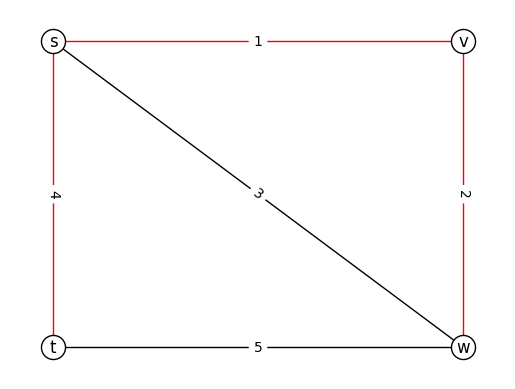

In [ ]:
# build graph
G1 = nx.Graph()
edge_list = [('s','v',1),
             ('s','w',3),
             ('s','t',4),
             ('v','w',2),
             ('w','t',5)]

G1.add_weighted_edges_from(edge_list)

# get MST
#T1 = prim(G1,'v')
T1 = prim_heap(G1,'v')

for edge in G1.edges:
  if T1.has_edge(*edge):
    G1.edges[edge]['color'] = 'red'
  else:
    G1.edges[edge]['color'] = 'black'

# plot
subax1 = plt.subplot(111)
pos1 = {'s':(0,1),
       'v':(1,1),
       'w':(1,0),
       't':(0,0)}

colors = nx.get_edge_attributes(G1,'color').values()
_ = nx.draw(G1, pos1, edge_color=colors, with_labels=True, node_color='w', edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
_ = nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

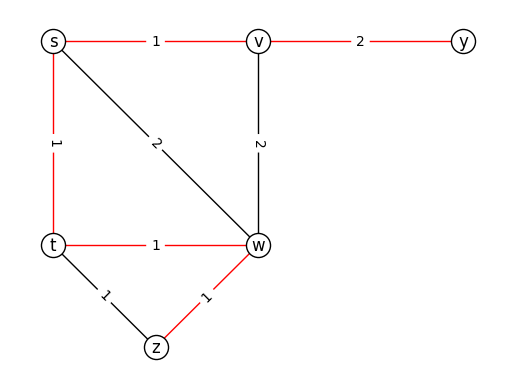

In [ ]:
# build graph
G2 = nx.Graph()
edge_list = [('s','v',1),
             ('s','w',2), #3
             ('s','t',1), #4
             ('v','w',2), #2
             ('w','t',1), #5
             ('t','z',1), #6
             ('w','z',1), #7
             ('v','y',2)] #8

G2.add_weighted_edges_from(edge_list)

# get MST
#T2 = prim(G2,'v')
T2 = prim_heap(G2,'v')

for edge in G2.edges:
  if T2.has_edge(*edge):
    G2.edges[edge]['color'] = 'red'
  else:
    G2.edges[edge]['color'] = 'black'

# plot
subax2 = plt.subplot(111)
pos2 = {'s':(0,2),
       'v':(1,2),
       'w':(1,1),
       't':(0,1),
       'z':(.5,.5),
       'y':(2,2)}

colors = nx.get_edge_attributes(G2,'color').values()
_ = nx.draw(G2, pos2, edge_color=colors, with_labels=True, node_color='w', edgecolors='k')
labels = nx.get_edge_attributes(G2,'weight')
_ = nx.draw_networkx_edge_labels(G2,pos2,edge_labels=labels)

## Kruskal's MST Algorithm

Steps
1. Sort edges in order of increasing cost
2. Initialise MST to Null
3. from smallest to largest, add edge to MST if edge has no cycles

---

Checking for a cycle takes $O(mn)$ time. Using a union-find data structure results in a $O(1)$ cycle check.

---

Union-Find data structure maintains parition of a set of objects. 2 methods:
* FIND(X): return naame of group that X belongs to
* UNION(Ci,Cj): Fuse groups Ci and Cj into a single group

In Kruskal's algorithm, objects = vertices.

In [ ]:
def kruskal(G):
  # sort edges by weight in increasing order
  sorted_edges = sorted(G.edges(data=True), key = lambda edge: edge[2]['weight'])
  MST = nx.Graph([])

  for u,v,wt in sorted_edges:
    if (u in MST) and (v in MST):
      if nx.has_path(MST,u,v): # cycle exists
        continue # end loop, don't add u-v

    # add u-v
    MST.add_edges_from([(u,v,wt)])

  return MST

In [ ]:
def kruskal_unionfind(G):
  '''
  use union-find data structure to improve search for cycle
  '''
  # sort edges by weight in increasing order
  sorted_edges = sorted(G.edges(data=True), key = lambda edge: edge[2]['weight'])
  MST = nx.Graph([])
  X = {}
  group = {}

  for u,v,wt in sorted_edges:
    print(f'checking {u}-{v}, weight: {wt["weight"]}')
    if (u in X) and (v in X):
      l_u,l_v = X[u], X[v] # get leaders of u and v
      if (l_u == l_v): # cycle exists
        print(f'cycle exists between {u} and {v}')
        continue # end loop, don't add u-v
      else: # both explored but not connected, perform UNION
        # smaller group to merge with bigger group
        if len(group[l_u]) < len(group[l_v]):
          # merge u to v
          for n in group[l_u]: X[n] = l_v #repoint leader
          group[l_v] += group.pop(l_u)
        else:
          # merge v to u
          for n in group[l_v]: X[n] = l_u #repoint leader
          group[l_u] += group.pop(l_v)
    else: # either one/both not explored, perform UNION
      if (u not in X) and (v not in X):
        X.update({u:u,v:u}) # assign u to be leader of both u & v
        group[u] = [u,v]
      elif (v in X):
        X.update({u:X[v]}) # assign leader of u to v's leader
        group[X[v]].append(u)
      elif (u in X):
        X.update({v:X[u]}) # assign leader of v to u's leader
        group[X[u]].append(v)


    # add u-v
    print(f'adding {u}-{v}')
    MST.add_edges_from([(u,v,wt)])

  return MST

checking s-q, weight: 1
adding s-q
checking w-t, weight: 2
adding w-t
checking s-w, weight: 3
adding s-w
checking s-t, weight: 4
cycle exists between s and t
checking s-v, weight: 5
adding s-v
checking v-w, weight: 6
cycle exists between v and w
checking q-v, weight: 7
cycle exists between q and v


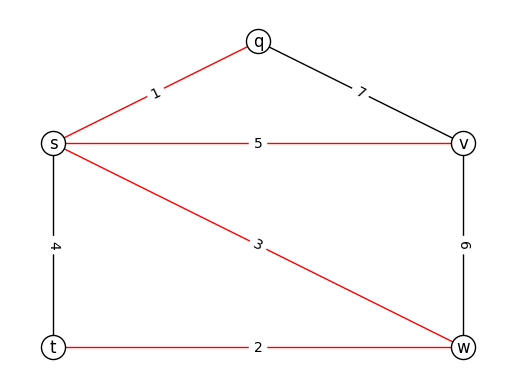

In [ ]:
# build graph
G1 = nx.Graph()
edge_list = [('s','q',1),
             ('q','v',7),
             ('s','v',5),
             ('s','w',3),
             ('s','t',4),
             ('v','w',6),
             ('w','t',2)]

G1.add_weighted_edges_from(edge_list)

# get MST
#T1 = kruskal(G1)
T1 = kruskal_unionfind(G1)

for edge in G1.edges:
  if T1.has_edge(*edge):
    G1.edges[edge]['color'] = 'red'
  else:
    G1.edges[edge]['color'] = 'black'

# plot
subax1 = plt.subplot(111)
pos1 = {'s':(0,1),
       'v':(1,1),
       'w':(1,0),
       't':(0,0),
       'q':(.5,1.5)}

colors = nx.get_edge_attributes(G1,'color').values()
_ = nx.draw(G1, pos1, edge_color=colors, with_labels=True, node_color='w', edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
_ = nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

checking s-v, weight: 1
checking s-t, weight: 1
checking w-t, weight: 1
checking w-z, weight: 1
checking t-z, weight: 1
cycle exists between t and z
checking s-w, weight: 2
cycle exists between s and w
checking v-w, weight: 2
cycle exists between v and w
checking v-y, weight: 2


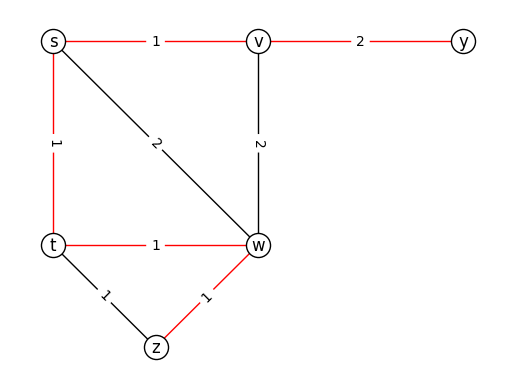

In [ ]:
# build graph
G2 = nx.Graph()
edge_list = [('s','v',1),
             ('s','w',2), #3
             ('s','t',1), #4
             ('v','w',2), #2
             ('w','t',1), #5
             ('t','z',1), #6
             ('w','z',1), #7
             ('v','y',2)] #8

G2.add_weighted_edges_from(edge_list)

# get MST
#T2 = kruskal(G2)
T2 = kruskal_unionfind(G2)

for edge in G2.edges:
  if T2.has_edge(*edge):
    G2.edges[edge]['color'] = 'red'
  else:
    G2.edges[edge]['color'] = 'black'

# plot
subax2 = plt.subplot(111)
pos2 = {'s':(0,2),
       'v':(1,2),
       'w':(1,1),
       't':(0,1),
       'z':(.5,.5),
       'y':(2,2)}

colors = nx.get_edge_attributes(G2,'color').values()
_ = nx.draw(G2, pos2, edge_color=colors, with_labels=True, node_color='w', edgecolors='k')
labels = nx.get_edge_attributes(G2,'weight')
_ = nx.draw_networkx_edge_labels(G2,pos2,edge_labels=labels)

checking A-D, weight: 5
checking E-C, weight: 5
checking D-F, weight: 6
checking A-B, weight: 7
checking B-E, weight: 7
checking B-C, weight: 8
cycle exists between B and C
checking E-F, weight: 8
cycle exists between E and F
checking B-D, weight: 9
cycle exists between B and D
checking E-G, weight: 9
checking F-G, weight: 11
cycle exists between F and G
checking D-E, weight: 15
cycle exists between D and E


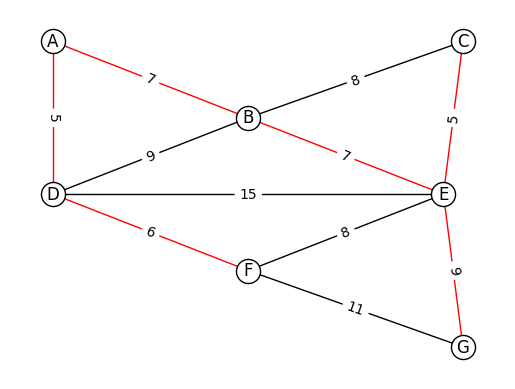

In [ ]:
# build graph
G3 = nx.Graph()
edge_list = [('A','B',7),
             ('A','D',5),
             ('D','B',9),
             ('D','E',15),
             ('D','F',6),
             ('B','C',8),
             ('B','E',7),
             ('C','E',5),
             ('F','G',11),
             ('F','E',8),
             ('E','G',9),]

G3.add_weighted_edges_from(edge_list)

# get MST
#T3 = kruskal(G3)
T3 = kruskal_unionfind(G3)

for edge in G3.edges:
  if T3.has_edge(*edge):
    G3.edges[edge]['color'] = 'red'
  else:
    G3.edges[edge]['color'] = 'black'

# plot
subax3 = plt.subplot(111)
pos3 = {'D':(0,1),
        'A':(0,2),
        'B':(1,1.5),
        'F':(1,.5),
        'C':(2.1,2),
        'E':(2,1),
        'G':(2.1,0)}

colors = nx.get_edge_attributes(G3,'color').values()
_ = nx.draw(G3, pos3, edge_color=colors, with_labels=True, node_color='w', edgecolors='k')
labels = nx.get_edge_attributes(G3,'weight')
_ = nx.draw_networkx_edge_labels(G3,pos3,edge_labels=labels)

## Applications to Clustering

Given $n$ points, group into $k$ "coherent" groups.

Usually performed while optimising over an objective, e.g. *k*-means.

---
For e.g. using single-link max-spacing *k*-clusterings

As input, given a (dis)similarity measure a.k.a. a distance $d(p,q)$ between each point pair (assume symmetry)

We call points $p$ & $q$ separated if they are assigned to different clusters

The spacing of *k*-clustering is:

$$
\min_{\text{separated}_{p,q}} d(p,q)
$$

Given a distance measure $d$ and desired no. of clusters $k$, compute *k*-clustering with maximum spacing.

In [ ]:
import random

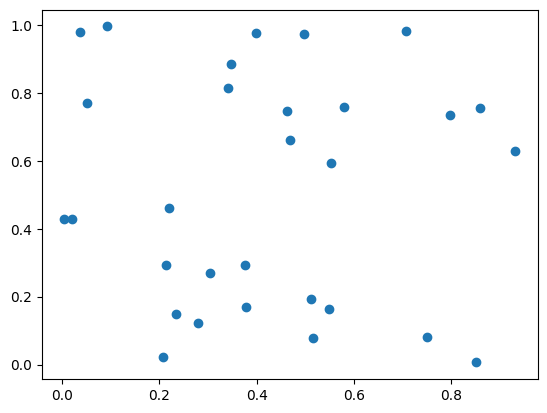

In [ ]:
# generate random data
n = 30
x = [random.random() for _ in range(n)]
y = [random.random() for _ in range(n)]
data = {i:pq for i,pq in enumerate(zip(x,y))} # assign keys
#print(data)
plt.scatter(x,y)


In [ ]:
def maxspace_cluster(data,k):
  # calculate distances
  distances = {}
  dist = lambda p,q: ((p[0]-q[0])**2 + (p[1]-q[1])**2)**0.5

  for p,p_coords in data.items():
    for q,q_coords in data.items():
      if (p == q) or ((p,q) in distances) or ((q,p) in distances):
        continue
      else:
        distances[(p,q)] = dist(p_coords,q_coords)

  # sort distances in increasing order
  sorted_distances = sorted(distances.items(), key=lambda kv: kv[1])
  X = {}
  group = {n:[n] for n in data.keys()}

  itr = 0
  for (u,v),wt in sorted_distances:
    #print(f'group is now of size {len(group)}')
    itr+=1
    if len(group) == k:
      print(f'reached k at iteration {itr}')
      break
    #print(f'checking {u}-{v}, dist: {round(wt,3)}')
    if (u in X) and (v in X):
      l_u,l_v = X[u], X[v] # get leaders of u and v
      if (l_u == l_v): # cycle exists
        continue # end loop, don't add u-v
      else: # both explored but not connected, perform UNION
        # smaller group to merge with bigger group
        if len(group[l_u]) < len(group[l_v]):
          # merge u to v
          for n in group[l_u]: X[n] = l_v #repoint leader
          group[l_v] += group.pop(l_u)
        else:
          # merge v to u
          for n in group[l_v]: X[n] = l_u #repoint leader
          group[l_u] += group.pop(l_v)
    else: # either one/both not explored, perform UNION
      if (u not in X) and (v not in X):
        X.update({u:u,v:u}) # assign u to be leader of both u & v
        group[u] += group.pop(v)
      elif (v in X):
        X.update({u:X[v]}) # assign leader of u to v's leader
        group[X[v]] += group.pop(u)
      elif (u in X):
        X.update({v:X[u]}) # assign leader of v to u's leader
        group[X[u]] += group.pop(v)


      # # add u-v
      # print(f'adding {u}-{v}')
      # MST.add_edges_from([(u,v,wt)])

  return group, sorted_distances

In [ ]:
clusters, dst = maxspace_cluster(data,3)
print(clusters)

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29]}
reached k at iteration 54
{4: [4, 22, 27], 11: [11, 25, 0, 9, 1, 12, 21, 26, 15, 3, 28, 17], 18: [18, 20, 24, 14, 2, 7, 23, 16, 19, 6, 10, 8, 13, 5, 29]}


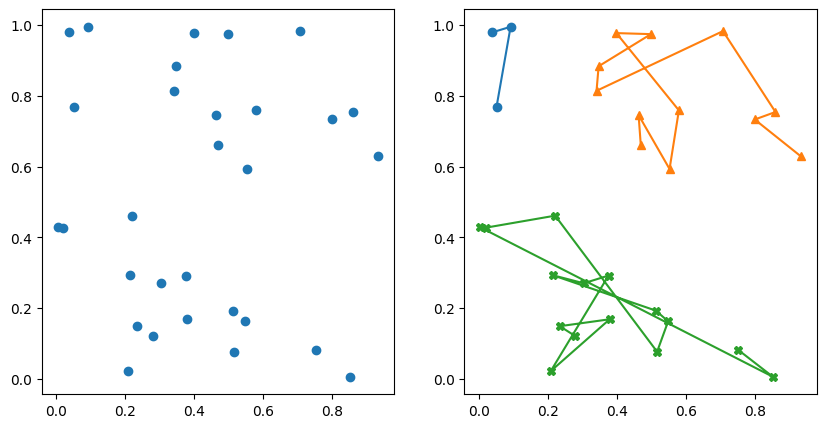

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.scatter(x,y)
markers = ['-o','-^','-X','-P','-v']
for g,marker in zip(clusters.values(),markers):
  x_,y_ = [],[]
  for n in g:
    x_.append(data[n][0])
    y_.append(data[n][1])

  ax2.plot(x_,y_,marker)


# Union-Find

3 key ideas behind optimisation for UnionFind operations.
1. Lazy Union
2. Union by Rank
3. Path compression

---

*Lazy Union:*

Given two trees, 0-1-2 (leader 1) and 3-4-5 (leader 4), lazy union simply points the leader of one root node to the other root node.

We can use arrays to represent the leader points, where the node is the index and the value of the node, the leader's index.

Then simply traverse root nodes until main root found.

Note: once a root is subsumed under another tree, it will never again be a root node

In [ ]:
#
nodes   = [0,1,2,3,4,5]
leaders = [1,1,1,4,4,4] # 2 trees, leader 1: 0,1,2; leader 4: 3,4,5

# eager union (single level tree, many leaves)
leaders_ = leaders.copy()
for idx,l in enumerate(leaders_): # change all nodes with old leader 1 to point to new leader 4
  if l == 1:
    leaders_[idx] = 4

# lazy union (deeper tree)
leaders[1] = 4 # change only old leader 1 to point to new leader 4

print('eager union method:',leaders_)
print('lazy union method:',leaders)

eager union method: [4, 4, 4, 4, 4, 4]
lazy union method: [1, 4, 1, 4, 4, 4]


*Union by Rank:*

Rank is the maximum number of hops from a leaf to a node

Union-by-rank is then the combination of the smaller-ranked tree to the larger-ranked tree

Note that ranks do not change unless both trees have the same rank, in which case the larger-ranked tree's rank goes up by 1

---

*lemmas*

1. if two nodes x & y have the same rank, then they are disjoint (i.e. not in same tree)
2. a subtree with rank $r$ has at least $2^r$ nodes in it
3. there are at most $\frac{n}{2^r}$ nodes of rank $r$
4. a non-root object will never change ranks

In [ ]:
# e.g. 1
nodes   = [0,1,2,3,4,5]
leaders = [1,1,1,4,4,4] # 2 trees, leader 1: 0,1,2; leader 4: 3,4,5
rank    = [0,1,0,0,1,0]

# union by rank (equal rank)
leaders[1] = 4 # change only old leader 1 to point to new leader 4
rank[4] += 1

# e.g.2
nodes   = [0,1,2,3,4,5,6]
leaders = [1,2,2,2,4,4,4]
rank    = [0,1,2,0,1,0,0]

# union by rank (different rank)
larger_tree = 2
leaders = [1,2,2,2,2,4,4]
rank    = [0,1,2,0,1,0,0] # rank unchanged

*Path compression*

Every FIND operation has to traverse the tree up to it's root.

Instead of repeating traversals every time, keep a history of nodes traversed, and point them towards the root once it is found

Though the ranks would lose it's meaning, there is no need to change ranks.

In [ ]:
class UnionFind:
  def __init__(self,leaders):
    self.leaders = leaders
    self.rank = [0 for _ in range(len(leaders))]

    # calculate rank upon init
    for idx, l in enumerate(self.leaders):
      #print(self.rank)
      if (l == idx): # if point to itself
        continue
      else:
        #par = self.find(idx)
        curr_l = idx
        while True:
          new_l = self.leaders[curr_l]
          #print(f'node {new_l}, current rank: {self.rank[new_l]}, new rank: {self.rank[curr_l]+1}')
          self.rank[new_l] = max(self.rank[new_l],self.rank[curr_l]+1)
          if new_l != self.leaders[new_l]: #par:
            curr_l = new_l
          else:
            break

  def __call__(self):
    print('leaders:', self.leaders)
    print('  ranks:', self.rank)

  def find(self,x):
    old_par = x
    X = []
    while True:
      par = self.leaders[old_par] # find parent
      if (par == old_par): # if parent is x, it is root node
        break
      else: # traverse up one layer
        X.append(old_par) # explored
        old_par = par

    # path compression
    for node in X:
      self.leaders[node] = par

    return par

  def union(self,s1,s2):
    # find leaders
    l_s1 = self.find(s1) # leader of s1
    l_s2 = self.find(s2) # leader of s2

    if l_s1 != l_s2:
      # find rank
      r_s1 = self.rank[l_s1]  # rank of s1 leader
      r_s2 = self.rank[l_s2]  # rank of s2 leader

      # perform Union - 3 cases (2 unequal 1 equal)
      if (r_s1 < r_s2):
        self.leaders[l_s1] = l_s2
      elif (r_s1 > r_s2):
        self.leaders[l_s2] = l_s1
      else: # equal ranks
        self.leaders[l_s2] = l_s1
        self.rank[l_s1] += 1


In [ ]:
## example 1
T = UnionFind([1,2,2,2,4,4,4])
T()

leaders: [1, 2, 2, 2, 4, 4, 4]
  ranks: [0, 1, 2, 0, 1, 0, 0]


In [ ]:
print(T.find(0))
T()

2
leaders: [2, 2, 2, 2, 4, 4, 4]
  ranks: [0, 1, 2, 0, 1, 0, 0]


In [ ]:
n = 5
print('find',n)
print('group before union:',T.find(n))
print(T())
T.union(0,5)
print('group after union:',T.find(n))
T()

find 5
group before union: 4
leaders: [2, 2, 2, 2, 4, 4, 4]
  ranks: [0, 1, 2, 0, 1, 0, 0]
None
group after union: 2
leaders: [2, 2, 2, 2, 2, 2, 4]
  ranks: [0, 1, 2, 0, 1, 0, 0]


In [ ]:
## example 2
T2 = UnionFind([0,0,0,4,4,4])
T2()

leaders: [0, 0, 0, 4, 4, 4]
  ranks: [1, 0, 0, 0, 1, 0]


In [ ]:
n = 5
print('find',n)
print('group before union:',T2.find(n))
print(T2())
T2.union(0,5)
print('group after union:',T2.find(n))
T2()

find 5
group before union: 4
leaders: [0, 0, 0, 4, 4, 4]
  ranks: [1, 0, 0, 0, 1, 0]
None
group after union: 0
leaders: [0, 0, 0, 4, 0, 0]
  ranks: [2, 0, 0, 0, 1, 0]


Hopcroft-Ullman proved that with Union by rank and path compression $m$ Union + Find operations takes $O(m \ log^* (n))$ time

Tarjan's bound further lowers the guarantee of $m$ Union + Find operations to $O(m \ \alpha(n))$, where $\alpha(n)$ is the inverse Ackermann function

---

Note: Iterative logarithm operator $log^*(n)=$ no. of times $log_2$ is needed to be applied to $n$ before the result is $\leq n$  

## Ackermann Function & Inverse Ackermann Function

The Ackermann Function is defined as:
$$
A_k(r)=
\begin{cases}
r + 1 & \text{ if } k = 0 \\
A_{k-1}^{r}(r) & \text{ otherwise }
\end{cases}
\forall k \geq 0, \forall r \geq 1
$$

where $A_{k}^{r}(⋅)$ represents an $r$-fold composite function, i.e. $(\underbrace{A_{k} ∘ A_{k} ∘ \cdots ∘ A_{k} }_{r})(⋅)$

---
Base examples:

$
\begin{align}
A_1(r) &= 2r \\
A_2(r) &= r2^r
\end{align}
$

---

So, if $k = 3, r = 2$

$
\begin{align}
A_3(2) &= A_2(A_2(2)) \\
 &= A_2(2*2^2) \\
 &= A_2(8) \\
 &= 8*2^8 \\
 &= 2048
\end{align}
$

---

For practical purposes, Ackermann's function becomes computationally infeasible past $n \geq 4$



In [ ]:
def ackermann(k,r):
  assert k >= 0, 'k needs to be at least 0'
  assert r >= 1, 'r needs to be at least 1'
  if k == 0:
    return r + 1
  else:
    r_ = r
    for _ in range(r):
      r_ = ackermann(k-1,r_)
    return r_

In [ ]:
# k = 3, r = 2
ackermann(3,2)

2048

The Inverse Ackermann function, denoted $\alpha(n)$, is defined as follows:

For every $n \geq 4$, $\alpha(n)=$ minimum value of $k$ such that $A_k(2) \geq n$

---

Note how the Inverse Ackermann function grows at a much slower rate than the iterative logarithm $log^*$

|$\alpha(n)$|$log*(n)$|
|:-:|:-:|
|$\alpha(n) = 1, n = \{4\}$|$log^*(n) = 1, n = \{2\}$|
|$\alpha(n) = 2, n = \{5,\dots,8\}$|$log^*(n) = 2, n = \{3,4\}$|
|$\alpha(n) = 3, n = \{9,\dots,2048\}$|$log^*(n) = 3, n = \{5,\dots,16\}$|
|$\alpha(n) = 4, n = \{ 2049,\dots,\underbrace{2^{2^{\unicode{x22F0}^{2}}}}_{2048 \text{ times}}\}$|$log^*(n) = 4, n = \{17,\dots,65536\}$|
|$\vdots$|$log^*(n) = 5, n = \{65537,\dots,2^{65536}\}$|
|$\vdots$|$\vdots$|
|$\vdots$|$log^*(n) = 2048, n = \{\dots,\underbrace{2^{2^{\unicode{x22F0}^{2}}}}_{2048 \text{ times}}\}$|

# Huffman Codes

Constructs specific kind of prefix-free binary code to compress data

---

Binary code: maps each character of an alphabet $Σ$ to a binary string

E.g. if $Σ$ = a-z, with some additional punctuation; size 32 overall, we can use 32 5-bit binary strings to encode this (in a fixed-length manner), i.e. $A = 00000, B = 00001, C = 00010, D = 00011,$ etc.

---

Using variable-length code can help to compress better if certain characters are much more frequent than others.

However this can lead to ambiguity if codes are not chosen properly. Suppose $\Sigma = \{ A,B,C,D \}$ and $codes = \{0,01,10,1\}$. The string $001$ can either be $AB$ or $AAD$.

The solution is thus to use prefix-free encodings - for every pair $i,j \in \Sigma$, neither of the encodings $f(i), f(j)$ are prefixes of the other.

---

Prefix-free encodings remove ambiguity, and can give shorter encodings (i.e. lower memory requirements) with non-uniform character frequencies; more frequently occurring characters assigned relatively shorter binary strings.

For example

|char|freq|fixed-length|variable-length|
|:-:|:-:|:-:|:-:|
|A|60%|00|0|
|B|25%|01|10|
|C|10%|10|110|
|D|5%|11|111|

Using fixed length encoding, it will take 2 bits of memory per character

Using variable length encoding, it will need 1.55 bits of memory per character, on average.

---

Binary code can be represented as trees.
In general, prefix-free codes can be represented as a binary tree, where left child edges are 0, right child edges are 1.
* for each $i \in Σ$, exactly one node labelled $i$
* encoding of $i \in Σ$ = bits along path from node to the node $i$
* prefix free since only leaves are labelled nodes (and prefixes are ancestors of another node)

to decode, simply follow the path from root until hitting a leaf

E.g
```
  r
 / \
A  / \
  B / \
   C   D
```

The string $0110111$ decodes unambiguously to $ACD$

The encoding length of $i$ thus corresponds to it's depth in the tree.

---

The problem definition is such that, given a probability $p_i$ for each character $i \in Σ$, we want to output a binary tree $T$ that minimises the average encoding length $L(T)$.

$$L(T) = \sum_{i \in Σ} p_i \cdot [\text{depth of } i \text{ in } T]$$

---

Huffman's algorithm:

Build a tree bottom-up using successive mergers, by merging the 2 lowest-occurring characters.


In [ ]:
import heapq
class Huffman:
  def __init__(self,freqs:dict):
    ## freqs is a dictionary of characters & frequencies (or weights), chars:freq

    ## sort characters by freq/weights
    Sigma = [(v,k) for k,v in freqs.items()]
    heapq.heapify(Sigma)

    ## merge small groups first
    while True:
      if len(Sigma) == 2:
        break
      else:
        # get 2 lowest occurring chars
        (p_n1, c_n1),(p_n2, c_n2) = heapq.heappop(Sigma),heapq.heappop(Sigma)

        # merge (always append to the right)
        if len(c_n1) > len(c_n2):
          n = (p_n1+p_n2,c_n1+c_n2)
        else:
          n = (p_n2+p_n1,c_n2+c_n1)

        # add back to Sigma
        heapq.heappush(Sigma,n)

    ## divide back down
    def breakdown(S:tuple):
      weight = S[0]
      chars = S[1]

      if len(chars)>1:
        last_char, remainder_char = chars[-1], chars[:-1]
        last_char_weight = freqs[last_char]
        remainder_char_weight = weight - last_char_weight

        # always put more frequent char to the left
        if last_char_weight > remainder_char_weight:
          return {0:(last_char_weight,last_char),1:breakdown((remainder_char_weight,remainder_char))}
        else:
          return {0:breakdown((remainder_char_weight,remainder_char)),1:(last_char_weight,last_char)}

      else:
        return S

    ## search for encoding
    def search(c,T):
      #if T is None: T = self.Tree
      L = T.get(0,None) # get left value
      R = T.get(1,None) # get right value

      if (L is not None) or (R is not None):
        if (type(L) == tuple) and (L[1] == c): # search left again
          return "0"
        elif (type(R) == tuple) and (R[1] == c): # search right again
          return "1"

        # at this point, neither branch contains the letters, but can either be dict, tuple, or None. only care if dict.
        if (type(L) == dict):
          L_res = search(c,L)
          if L_res is not None:
            return "0" + L_res

        if (type(R) == dict):
          R_res = search(c,R)
          if R_res is not None:
            return "1" + R_res

    ## setup
    self.Tree = {0:breakdown(Sigma[1]),1:breakdown(Sigma[0])} # always put more frequent item on the left
    self.encoded = {k:search(k,self.Tree) for k in freqs.keys()}

    avg_len = 0
    total_w = 0
    for k,d in self.encoded.items():
      avg_len += freqs[k] * len(d)
      total_w += freqs[k]

    self.avg_len = avg_len / total_w

  def __call__(self):
    return self.encoded #self.Tree

  def decode(self,code:str):
    # using string as a placeholder for binary/bitwise data
    D = ''
    curr = self.Tree
    for c in code:
      x = curr[int(c)]
      if type(x) == tuple:
        D = D + x[1]
        curr = self.Tree
      else:
        curr = x

    return D

In [ ]:
freqs = {"A":.6,"C":.1,"B":.25,"D":.05}
T = Huffman(freqs)
T.decode('0110111')

'ACD'

In [ ]:
T()

{'A': '0', 'C': '110', 'B': '10', 'D': '111'}

In [ ]:
T.avg_len

1.5499999999999998

In [ ]:
freqs2 = {"A":3,"C":6,"B":2,"D":8,"E":2,"F":6}
T2 = Huffman(freqs2)
#T2.decode('0110111')

In [ ]:
for k,v in T2().items(): print(k,v)

A 011
C 11
B 0101
D 00
E 0100
F 10


In [ ]:
T2.avg_len

2.4074074074074074

# DYNAMIC PROGRAMMING

Principles:
1. Identify a small, suitable, number of subproblems
2. quickly & correctly solve "larger" subproblems given the solutions to "smaller" subproblems (usually via a recurrence)
3. after solving all subproblems, can quickly compute the final solution (usually is the answer to the "biggest" subproblem)

Critical factor is to identify the subproblems, once that is done solutions are generally formulaic. Usually solved by reasoning what optimal substructures lead to solutions.

# Weighted Independent Sets in Path Graphs



Given a path graph $G = (V,E)$ with non-negative weights on the vertices, e.g.

```
A - B - C - D
1   4   5   4
```

Find the independent set (i.e. subset of non-adjacent vertices) of maximum total weight.

Notes:
* brute force search requires exponential time
* divide-&-conquer algorithms can lead to conflicting sub-solutions with no obvious fix

---

*Reasoning for an optimal substructure*

Let $S ⊆ V$ be the optimal max-weight IS, and $v_n$ be the last vertex of the path

Case 1: $v_n ∉ S$
* let $G' = G - \{v_n\}$
* Then $S$ must be a max-weight IS of $G'$ - there cannot be an alternative set $S^*$ that would be better, otherwise it would also be better than $S$ in $G$.

Case 2: $v_n \in S$
* let $G'' = G - \{v_n, v_{n-1}\}$
* Then $S - \{ v_n\}$ must be a max-weight IS of $G''$. By same reasoning as Case 1, there cannot be an alternative set $S^*$ that would be better, otherwise $S^* \cup \{v_n\}$ would also be better than $S$ in $G$.

Therefore, the max-weight IS of $G$ must either be
1. a max-weight IS of $G'$
2. $v_n$ + a max-weight IS of $G''$

Since we don't know if $v_n$ is part of the max-weight IS, simply try both & return the better solution

---

Since subproblems are repeated, we simply cache subproblem solutions for $O(1)$-time lookup in global table. This is known as **memoisation**.

We can reforumlate the optimal substructure reasoning into a bottom-up solution, and populate the lookup table $A$ with each value $A_i$ storing the value of max-weight IS of $G_i$ (where $G_i$ represents the first $i$ vertices of $G$).

Initialise $A_0 = 0, A_1 = w_1$.

Then,
$\text{for } i = 2,3,\cdots,n \\ A_i = max\{ A_{i-1}, A_{i-2} + w_i \}$

In [ ]:
# value only
G = [1,4,5,4,6]
A = [0]

for i,g in enumerate(G):
  idx = i+1
  if idx == 1:
    A.append(g)
  else:
    S1 = A[idx-1]
    S2 = A[idx-2] + g

    A.append(max(S1,S2))

print(A)
print('max:',A[len(G)])

[0, 1, 4, 6, 8, 12]
max: 12


In [ ]:
# reconstruction
S = []
idx = len(A) - 1

# go from right to left of array A
while idx >= 1:
  w = G[idx-1]
  if A[idx-1] >= A[idx-2] + w:
    idx -= 1
  else:
    S = [w] + S
    idx -= 2

print(S)

[1, 5, 6]


# Knapsack Problem

Given a set of $n$ items, each with:
* a value $v_i$ (non-negative)
* a size $w_i$ (non-negative and integral)

Then, given a capacity $W$ (non-negative integer), find the subset $S ⊆ \{1,2,...,n \}$ that maximises $∑_{i \in S} v_i$ subject to $∑_{i \in S} w_i ≤ W$

In other words, what are the set of items that give maximum value that do not go over capacity.

---

*Case 1*: $n ∉ S$

Implication: $S$ must be optimal with the first $n-1$ items, and fit within the same capacity $W$. Because if some other subset $S^*$ is better than $S$ w.r.t. the $n-1$ items, then this is equally true w.r.t all $n$ items - contradiction.


*Case 2*: $n \in S$

Implication: $S - \{n\}$ is an optimal solution w.r.t. the first $n-1$ items and capacity $W - w_n$. Because if some other subset $S^*$ is better than $S - \{n\}$ with total size $\le W - w_n$, then $S^* ∪ \{n\}$ has size $\le W$ and value more than $S$ - contradiction.

---

Can solve using D.P. as a recurrence has been formulated, where the structure of an optimal solution is a function of solutions to smaller subproblems.


In [ ]:
import numpy as np

In [ ]:
# data
W = 6
N = [(4,2),(3,4),(2,3),(4,3)]

# preprocess (has to be sorted, at least by value)
N = sorted(N)

In [ ]:
# initialise A to keep track of value V(i,x)
# value of x keeps track of capacity usage, to make sure it does not go over limit
A = np.zeros((len(N)+1,W+1))
print(A.shape)

(5, 7)


In [ ]:
# get optimal value
for i in range(1,len(N)+1):
  for x in range(W+1):
    v_i, w_i = N[i-1]
    if (x-w_i) >= 0:
      # case 1: if n not in S, inherit from previously calculated optimal solution
      # case 2: if n in S, add n to the previously calculated optimal solution
      A[i,x] = max(A[i-1,x],A[i-1,x-w_i]+v_i)

optimal_val = A[-1,-1]
print(optimal_val,'\n', A)

8.0 
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 2. 2.]
 [0. 0. 0. 0. 3. 3. 3.]
 [0. 0. 4. 4. 4. 4. 7.]
 [0. 0. 0. 4. 4. 8. 8.]]


In [ ]:
# build back items
i = len(N)
x = W
val = optimal_val

S = []
while i != 0:
  # step back
  i -= 1

  inherited = A[i,x]
  #print(i,x, inherited, val)

  if (inherited != val):
    S.append(N[i])
    x -= N[i][1] #weight
    val = A[i][x] #prev val
  else:
    val = inherited

print(S)

[(4, 3), (4, 2)]


# Sequence Alignment

Given 2 strings over some alphabet $\Sigma$, e.g. $\{A,G,T,C\}$
* $X = x_1,x_2,\dots,x_m$
* $Y = y_1,y_2,\dots,y_n$

Insert gaps into either of the strings until they are equalised such that it minimises the total possible penalty when letters are misaligned, e.g.

```
A G G G C T
A G G - C A
```

$\text{Penalty} = \alpha_{\text{gap}} + \alpha_{\text{AT}}$

where we assume $\alpha_{ab} = 0 \text{ if } a = b$, and $a_{\text{gap}}$ & $\alpha_{ab} > 0 \text{ if } a \neq b$. (a.k.a. the Needleman-Wunsch score)

---

Consider the optimal solution of $X$ and $Y$ being aligned, then the final position will only comprise of 3 cases:
1. $x_m$ & $y_n$ are matched
1. $x_m$ matched with gap
1. $y_n$ matched with gap

There is no need for a case with 2 gaps being matched, as it increases the overall penalty.

---

*Reasoning for optimal substructure*

Suppose in the optimal alighment, we peel off the last letter of each string, i.e. $X' = X - x_m, Y' = Y - y_n$, and calculate the penalty $P$.

Now suppose there is some better alignment of $X'$ and $Y'$, which has penalty $P^* < P$

After appending $x_m$ and $y_n$ back to each of their respective strings, the alignment of $X$ and $Y$ will have penalty $P^* + \alpha_{x_m y_n} < P + \alpha_{x_m y_n}$, contradicting the optimality of original alignment.

Therefore an optimal alignment of $X$ and $Y$ implies an optimal alignment of $X'$ and $Y'$.

---

*Recurrence*

Let $P_ij =$ penalty of optimal alightment of $X_i$ and $Y_j$, where indices $i$ and $j$ denote all letters of the string up to their position.

$$
P_{i,j}=min
\left(\begin{array}{lr}
\alpha_{x_i y_j} + P_{i-1,j-1}\\
\alpha_{\text{gap}} + P_{i-1,j}\\
\alpha_{\text{gap}} + P_{i,j-1}
\end{array} \right)
$$



In [ ]:
import numpy as np

In [ ]:
def pen_alpha(x=None,y=None):
  assert not((x is None) and (y is None)), '2 gaps'
  if (x is None) or (y is None): # gap penalty
    return 1
  else:
    if (x != y): # mismatch penalty
      return .1
    else: # match
      return 0

# store gap penalty
alpha_gap = pen_alpha(1)

In [ ]:
# data
X = "AGGGCT"
Y = "AGGCA"
# X = "AGC"
# Y = "ATA"

In [ ]:
# initialise matrix to keep track of previous calcs
A = np.zeros((len(X)+1,len(Y)+1))

for r in range(A.shape[0]):
  A[r,0] = r*alpha_gap

for c in range(A.shape[1]):
  A[0,c] = c*alpha_gap


print(A.shape)

(7, 6)


In [ ]:
# algorithm
for i in range(1,len(X)+1):
  for j in range(1,len(Y)+1):
    # calculate cases
    case1 = A[i-1,j-1] + pen_alpha(X[i-1],Y[j-1])
    case2 = A[i-1,j] + alpha_gap
    case3 = A[i,j-1] + alpha_gap
    #print(i,j,round(case1,1),case2,case3)
    A[i,j] = min(case1, case2, case3)

print(A[-1,-1],'\n', A)

1.1 
 [[0.  1.  2.  3.  4.  5. ]
 [1.  0.  1.  2.  3.  4. ]
 [2.  1.  0.  1.  2.  3. ]
 [3.  2.  1.  0.  1.  2. ]
 [4.  3.  2.  1.  0.1 1.1]
 [5.  4.  3.  2.  1.  0.2]
 [6.  5.  4.  3.  2.  1.1]]


In [ ]:
# reconstruct
i = len(X)
j = len(Y)
min_val = A[-1,-1]

X_ = ""
Y_ = ""

while (i > 0) and (j > 0):
  # calculate cases
  case1 = A[i-1,j-1] + pen_alpha(X[i-1],Y[j-1])
  case2 = A[i-1,j] + alpha_gap
  case3 = A[i,j-1] + alpha_gap

  used_case = np.argmin([case1,case2,case3]) + 1
  match used_case:
    case 1:
      X_ = X[i-1] + X_
      Y_ = Y[j-1] + Y_
      i -= 1
      j -= 1
    case 2:
      X_ = X[i-1] + X_
      Y_ = '-' + Y_
      i -= 1
    case 3:
      X_ = '-' + X_
      Y_ = Y[j-1] + Y_
      j -= 1
    case _:
      assert False, 'no match'

  # X_ = X[i-1] + X_
  # Y_ = Y[j-1] + Y_
  # X_ = '-' + X_
  # Y_ = '-' + Y_

if i > 0: X_ = '-'*i + X_
if j > 0: Y_ = '-'*j + Y_

print(X_)
print(Y_)

AGGGCT
A-GGCA


# Optimal Binary Search Tree

For a given set of keys, there can be many valid search trees.

If keys are uniformly searched, balanced search trees tend to be optimal. e.g. RB trees.

However, in the case of non-uniform searches, non-balanced trees may be more efficient.

---

Given a list of frequencies $p_1,p_2,\dots,p_n$ for items $1,2,\dots,n$, compute a valid search tree that minimised the weighted (average) search time.


$C(T) = \sum_{\text{items }i} p_i \times [\text{search time for } i \text{ in } T]$

Unlike Huffman codes, the tree is not prefix-free (i.e. symbols not only at leaves) and have to keep to the search tree property (i.e. left sub-tree of a node contains only keys smaller than the node, vice versa for right sub-tree)

N.B. search time is the same as depth

---

Intuition: Most frequently accessed items closest to the root; least accessed item furthest from the root. However, no known greedy algorithm produces optimal trees.

---

*Optimal Substructure*

Suppose an optimal BST for keys $\{1,2,\dots,n\}$ has root $r$, left subtree $T_1$ and right subtree $T_2$. Then, $T_1$ must be optimal for keys $\{1,2,\dots,r-1\}$ and $T_2$ optimal for keys $\{r+1,r+2,\dots,n\}$.

*Proof of optimality*
* Suppose there exists a better subtree $T^*_1$, then $C(T^*_1) < C(T_1)$.
* $C(T)$ can be broken down into its constituent components; where $D_i(T)$ represents the search time for $i$ in $T$:
$\begin{align}
C(T) &= \sum_{i=1}^{n} p_i \cdot D_i(T) \\
&= P_r \cdot 1 + \sum_{i=1}^{r-1} p_i \cdot D_i(T) + \sum_{i=r+1}^{n} p_i \cdot D_i(T) \\
&= \sum_{i} P_r + \sum_{i=1}^{r-1} p_i \cdot D_i(T_1) + \sum_{i=r+1}^{n} p_i \cdot D_i(T_2) \\
&= \sum_{i} P_r + C(T_1) + C(T_2)
\end{align}
$
* if $C(T^*_1) < C(T_1)$, then $C(T^*) < C(T)$, contradicting optimality of $T$. same reasoning can be used for other subtree $T_2$.

*Relevant Subproblems*

At each recurrence, will only need to consider contiguous intervals of subsets $S = \{i,i+1,\dots,j-1,j\}$ for every $i < j$.

*Recurrence*

For $1 \leq i \leq j \leq n$, let $C_{ij}$ be the weighted search cost of an optimal BST for items $\{i,i+1,\dots,j-1,j\}$. Then

$$
C_{ij} = \min_{r=i,\dots,j}\{ \sum_{k=i}^{j} p_k + C_{i,r-1} + C_{r+1,j} \}
$$
If $x \leq y$, otherwise $C_{ij} = 0 \text{ if } x > y$.

Optimal substructure thus narrows candidates down to $j-i+1$ possibilities, with the recurrence picking best candidate by brute force



In [ ]:
import numpy as np

In [ ]:
# data
P = [2,23,73,2] #frequencies, keys are indices
N = len(P)

In [ ]:
A = np.zeros((N+1,N+1))

for s in range(N): # s represents j - i
  for i in range(1,N+1): # i+s plays role of j
    # find minimum of all possibilities
    j = i + s
    if j > N:
      continue
    cases = []
    const = sum(P[i-1:j])
    for r in range(i,j+1):
      C_T1 = 0 if (i > r-1) else A[i,r-1]
      C_T2 = 0 if (r+1 > j) else A[r+1,j]
      cases.append(const + C_T1 + C_T2)

    A[i,j] = min(cases)

cost = A[1,N]

In [ ]:
print(cost)

129.0


---
Current implementation is $\Theta(n^3)$, but *Knuth '71* and *Yoo '80* show that it is possible to optimise this version of the DP algorithm in $\Theta(n^2)$ time by piggybacking on work down in previuos subproblems, to avoid trying all possible roots.

# Bellman-Ford Algorithm

Problem: Given a directed graph $G = (V,E)$, edge lengths $c_e$ for each $e \in E$, source vertex $s \in V$, compute the length (i.e. sum of edge costs) of a shortest $s → v$ path for every destination $v \in V$. *($n$ = number of vertices, $m$ = number of edges)*


When there are negative edge lengths,or if the graph is not very distributed, Dijkstra's algorithm is not always correct. Bellman-Ford algorithm overcomes these issues.

---

*How can a shortest path be defined when $G$ has a negative cycle?*
* If cycles are allowed, the shortest path is undefined (i.e. $-∞$) as the solution repeatedly traverses the negative cycle
* If computing the shortest cycle-free path, the problem is NP-hard (no polynomial algorithm unless P = NP)

The Bellman-Ford algorithm either outputs the shortest path if the input graph has no negative cycles, else it will indicate that there is a negative cycle that prevents it from calculating the shortest path.

---

*Intuition behind optimal substructure*
1. If a graph $G$ has no negative cycles, then for every vertex $v$ there is a shortest path with at most $n-1$ edges.
2. Subpath of a shortest path should itself be the shortest.
3. Artificially restrict the number of edges in a path to delineate between "smaller" & "larger" subpaths.

For the graph $G$, let $P$ be the shortest $s → v$ path with at most $i$ edges
* Case 1: If $P$ has $≤(i-1)$ edges, it is (by definition) a shortest path with $≤(i-1)$ edges.
* Case 2: If $P$ has $i$ edges with a last hop $w → v$, then $P'$ is a shortest $s → w$ path with $≤(i-1)$ edges.
  * if there is a path $Q$ shorter than $P'$, then $Q + (w,v) < P' + (w,v)$ $⇒$ $ Q + (w,v) < P$, contradicting the optimality of $P$.

The number of candidates for an optimal solution to a subproblem involving the destination $v$ is one (from Case 1) plus the number of choices for the final hop $w → v$ (from Case 2), i.e. $1 + \text{in-degree}(v)$

Total runtime is $O \left( n \cdot \sum_{v \in V} \text{in-degree}(v) \right) = O(mn)$

---


N.B. negative cost cycle means the *total* cost of the cycle is negative, not that it contains (at least) a negative edge.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

{('s', 'v'): Text(0.2499941659043543, 0.7499941659043544, '2'),
 ('s', 'x'): Text(0.49999933305662125, 0.2500003334716895, '4'),
 ('v', 'x'): Text(0.7499948993208816, 0.5000102013582364, '1'),
 ('v', 'w'): Text(1.0000011393567547, 0.9999999999999999, '2'),
 ('x', 't'): Text(1.4999993330566215, 0.24999966652831063, '4'),
 ('w', 't'): Text(1.7499941659043545, 0.7500058340956456, '2')}

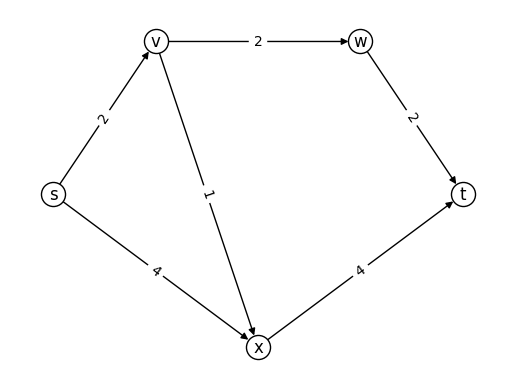

In [ ]:
G1 = nx.DiGraph()
edge_list = [('s','v',2),
             ('s','x',4),
             ('v','x',1),
             ('v','w',2),
             ('x','t',4),
             ('w','t',2)]


G1.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)
#pos1=nx.spring_layout(G)
pos1 = {'s':(0,0.5),
       'v':(0.5,1),
       'w':(1.5,1),
       't':(2,0.5),
       'x':(1,0)}


nx.draw(G1, pos1,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

In [ ]:
def bellman_ford_noneg(G, source,destination):
  '''
  This implementation assumes that there are no negative cycles,
  Will not check for them
  '''
  # setup
  V = list(G.nodes)
  N = len(V) # no. of vertices
  M = len(G.edges) # no. of edges


  ## Bellman-Ford Algorithm
  A = np.zeros((M,N))

  # Assign A[0,s] = 0
  A[0,V.index(source)] = 0

  # Assign A[0,v] = +inf
  for v in range(N):
    if v != V.index(source):
      A[0,v] = np.inf

  #print(A.shape)

  for i in range(1,M):
    for vertex in V:
      idx = V.index(vertex)
      # get case 1
      A[i,idx] = A[i-1,idx]

      # get case 2 - cycle through in degrees
      for (w,v) in G.in_edges(vertex):
        candidate = A[i-1,V.index(w)] + G.edges[w, v]['weight']
        if candidate < A[i,idx]:
          A[i,idx] = candidate

  #print(V,'\n',A)
  return A[N,V.index(destination)]

In [ ]:
bellman_ford_noneg(G1, 's','t')

6.0

{('s', 'v'): Text(0.2499941659043543, 0.7499941659043544, '2'),
 ('v', 'w'): Text(1.0000011393567547, 0.9999999999999999, '2'),
 ('v', 'x'): Text(0.7499948993208816, 0.5000102013582364, '1'),
 ('x', 's'): Text(0.5000006669433787, 0.24999966652831063, '-4'),
 ('x', 't'): Text(1.4999993330566215, 0.24999966652831063, '4'),
 ('w', 't'): Text(1.7499941659043545, 0.7500058340956456, '2')}

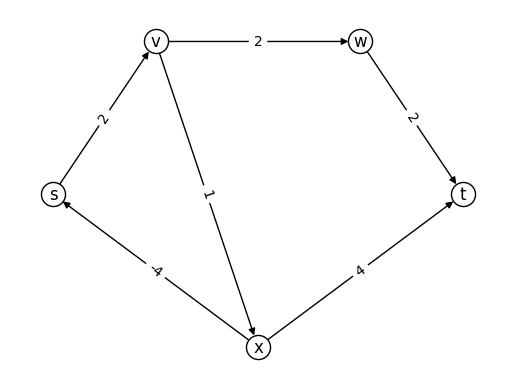

In [ ]:
G2 = nx.DiGraph()
edge_list = [('s','v',2),
             ('x','s',-4),
             ('v','w',2),
             ('v','x',1),
             ('x','t',4),
             ('w','t',2)]


G2.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)

pos2 = {'s':(0,0.5),
       'v':(0.5,1),
       'w':(1.5,1),
       't':(2,0.5),
       'x':(1,0)}


nx.draw(G2, pos2,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2,pos2,edge_labels=labels)

In [ ]:
def bellman_ford(G, source, destination):
  '''
  will only detect negative cycles reachable from source
  '''
  # setup
  V = list(G.nodes)
  N = len(V) # no. of vertices
  M = len(G.edges) # no. of edges


  ## Bellman-Ford Algorithm
  A = np.zeros((M+1,N)) #with additional column to check for negative cycle

  # Assign A[0,s] = 0
  A[0,V.index(source)] = 0

  # Assign A[0,v] = +inf
  for v in range(N):
    if v != V.index(source):
      A[0,v] = np.inf

  #print(A.shape)
  for i in range(1,M+1): #with additional iteration to check for negative cycle
    for vertex in V:
      idx = V.index(vertex)
      # get case 1
      A[i,idx] = A[i-1,idx]

      # get case 2 - cycle through in degrees
      for (w,v) in G.in_edges(vertex):
        candidate = A[i-1,V.index(w)] + G.edges[w, v]['weight']
        if candidate < A[i,idx]:
          A[i,idx] = candidate

  print(V,'\n',A)
  if (A[N] != A[-1]).any(): # negative cycle detected
    print('neg cycle detected')
    return None

  return A[N,:], V

In [ ]:
bellman_ford(G1, 's','t')

['s', 'v', 'x', 'w', 't'] 
 [[ 0. inf inf inf inf]
 [ 0.  2.  4. inf inf]
 [ 0.  2.  3.  4.  8.]
 [ 0.  2.  3.  4.  6.]
 [ 0.  2.  3.  4.  6.]
 [ 0.  2.  3.  4.  6.]
 [ 0.  2.  3.  4.  6.]]


(array([0., 2., 3., 4., 6.]), ['s', 'v', 'x', 'w', 't'])

In [ ]:
bellman_ford(G2, 's','t')

['s', 'v', 'x', 'w', 't'] 
 [[ 0. inf inf inf inf]
 [ 0.  2. inf inf inf]
 [ 0.  2.  3.  4. inf]
 [-1.  2.  3.  4.  6.]
 [-1.  1.  3.  4.  6.]
 [-1.  1.  2.  3.  6.]
 [-2.  1.  2.  3.  5.]]
neg cycle detected


In [ ]:
def bellman_ford_spaceopt(G, source):
  '''
  will only detect negative cycles reachable from source
  space optimised & keeps track for reconstruction
  '''
  # setup
  V = list(G.nodes)
  N = len(V) # no. of vertices
  M = len(G.edges) # no. of edges

  ## Bellman-Ford Algorithm

  # keep track of shortest sub-paths
  A = []
  for i in range(N):
    if i == V.index(source):
      A.append(0)
    else:
      A.append(np.inf)

  # keep track of last hop
  B = [None for _ in range(N)]

  #print(A.shape)
  for i in range(1,M):
    for vertex in V:
      idx = V.index(vertex)
      # get case 1 (already filled in)
      #A[idx] = A[idx]

      # get case 2 - cycle through in-degrees
      for (w,v) in G.in_edges(vertex):
        candidate = A[V.index(w)] + G.edges[w, v]['weight']
        if candidate < A[idx]:
          A[idx] = candidate
          B[idx] = w

  print(V,A,B,sep='\n')

  # go one more round to check if negative cycle detected
  for vertex in V:
    idx = V.index(vertex)
    # get case 2 - cycle through in-degrees
    for (w,v) in G.in_edges(vertex):
      candidate = A[V.index(w)] + G.edges[w, v]['weight']
      if candidate < A[idx]:
        return None

  return A, B, V

In [ ]:
bellman_ford_spaceopt(G1, 's')

['s', 'v', 'x', 'w', 't']
[0, 2, 3, 4, 6]
[None, 's', 'v', 'v', 'w']


([0, 2, 3, 4, 6], [None, 's', 'v', 'v', 'w'], ['s', 'v', 'x', 'w', 't'])

In [ ]:
bellman_ford_spaceopt(G2, 's','t')

['s', 'v', 'x', 'w', 't']
[-4, -2, -1, 0, 2]
['x', 's', 'v', 'v', 'w']


# All-Pairs Shortest Paths

Given a directed graph $G = (V,E)$, edge lengths $c_e$ for each $e \in E$, with no distinguished source vertex,
* EITHER compute the length (i.e. sum of edge costs) of a shortest $u → v$ path for all pairs of vertices $u,v \in V$,
* OR correctly report that $G$ contains a negative cycle.

*($n$ = number of vertices, $m$ = number of edges)*

1. In the case of non-negative edge weights, if we use Dijkstra's algorithm to solve this problem, $n$ invocations are needed to solve the APSP problem (since each invocation inherently calculates shortest path to all other vertices from a given node). Thus the runtime of $n$ invocations of Dijkstra is $O(n m \log{n})$, which is approximate to
  * $O(n^2 \log{n}) \text{ if } m = \Theta(n)$ (sparse graphs)
  * $O(n^3 \log{n}) \text{ if } m = \Theta(n^2)$ (dense graphs)

2. In the case of general edge lengths (i.e. non-negative), if we use the Bellman-Ford equation as the workhorse to solve this problem, the runtime of $n$ invocations of Bellman-Ford is $O(n^2 m)$, which is approximate to
  * $O(n^3) \text{ if } m = \Theta(n)$ (sparse graphs)
  * $O(n^4) \text{ if } m = \Theta(n^2)$ (dense graphs)

---

## Floyd-Warshall Algorithm

*Optimal Substructure*

Key Idea: order the vertices $V = \{1,2,\dots,n\}$ arbitrarily. Let $V^{(k)} = \{1,2,\dots,k\}$ (i.e. nodes up to node $k$).

Suppose $G$ has no negative cost cycles. Fix source $i \in V$, destination $j \in V$, and let $P$ be the shortest $i → j$ path with all internal nodes in $V^{(k)}$.

Then
* Case 1: if node $k$ is not internal to $P$, then $P$ is the shortest $i → j$ path with all internal nodes in $V^{(k-1)}$.
* Case 2: if node $k$ is internal to $P$, then
  * $P_1 =$ shortest $i → k$ path with all internal nodes in $V^{(k-1)}$
  * $P_2 =$ shortest $k → j$ path with all internal nodes in $V^{(k-1)}$

---

The Floyd-Warshall algorithm is $O(n^3)$ for APSP
* At least as good as $n$ Bellman-Fords, and even faster in dense graphs
* In graphs with non-negative edge costs, competitive with $n$ Dijkstra's in dense graphs

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

{('s', 'v'): Text(0.2499941659043543, 0.7499941659043544, '2'),
 ('s', 'x'): Text(0.49999933305662125, 0.2500003334716895, '4'),
 ('v', 'x'): Text(0.7499948993208816, 0.5000102013582364, '1'),
 ('v', 'w'): Text(1.0000011393567547, 0.9999999999999999, '2'),
 ('x', 't'): Text(1.4999993330566215, 0.24999966652831063, '4'),
 ('w', 't'): Text(1.7499941659043545, 0.7500058340956456, '2')}

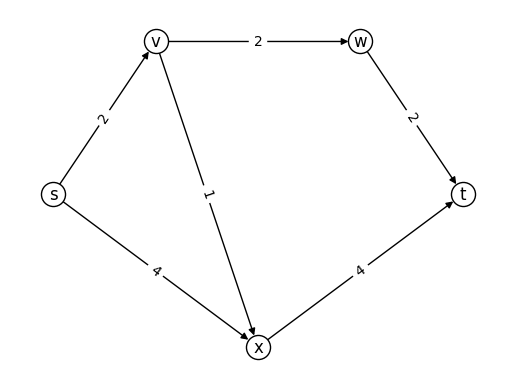

In [ ]:
G1 = nx.DiGraph()
edge_list = [('s','v',2),
             ('s','x',4),
             ('v','x',1),
             ('v','w',2),
             ('x','t',4),
             ('w','t',2)]


G1.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)
#pos1=nx.spring_layout(G)
pos1 = {'s':(0,0.5),
       'v':(0.5,1),
       'w':(1.5,1),
       't':(2,0.5),
       'x':(1,0)}


nx.draw(G1, pos1,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

{('s', 'v'): Text(0.2499941659043543, 0.7499941659043544, '2'),
 ('v', 'w'): Text(1.0000011393567547, 0.9999999999999999, '2'),
 ('v', 'x'): Text(0.7499948993208816, 0.5000102013582364, '1'),
 ('x', 's'): Text(0.5000006669433787, 0.24999966652831063, '-4'),
 ('x', 't'): Text(1.4999993330566215, 0.24999966652831063, '4'),
 ('w', 't'): Text(1.7499941659043545, 0.7500058340956456, '2')}

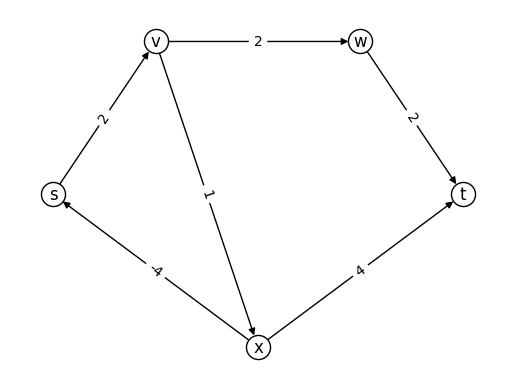

In [ ]:
G2 = nx.DiGraph()
edge_list = [('s','v',2),
             ('x','s',-4),
             ('v','w',2),
             ('v','x',1),
             ('x','t',4),
             ('w','t',2)]


G2.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)

pos2 = {'s':(0,0.5),
       'v':(0.5,1),
       'w':(1.5,1),
       't':(2,0.5),
       'x':(1,0)}


nx.draw(G2, pos2,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2,pos2,edge_labels=labels)

In [ ]:
def floyd_warshall(G,verbose=False):
  '''
  will only detect negative cycles reachable from source
  Note that this implementation can be further space optimised
  '''
  # setup
  V = list(G.nodes)
  N = len(V)+1 # no. of vertices

  ## Floyd-Warshall Algorithm

  # keep track of shortest sub-paths
  A = np.zeros((N,N,N))

  # keep track of last hop
  B = np.full((N,N),"")

  for i in range(1,N):
    for j in range(1,N):
      if i == j:
        A[i,j,0] = 0
        B[i,j] = V[i-1]
      elif (V[i-1],V[j-1]) in G.edges:
        A[i,j,0] = G.edges[(V[i-1],V[j-1])]['weight']
        B[i,j] = V[i-1]
      else:
        A[i,j,0] = np.inf


  ##
  for k in range(1,N):
    for i in range(1,N):
      for j in range(1,N):

        A[i,j,k] = A[i,j,k-1]
        candidate = A[i,k,k-1] + A[k,j,k-1]

        if candidate < A[i,j,k]:
          A[i,j,k] = candidate
          B[i,j] = V[k-1]

  if verbose:
    print(V,A[1:,1:,N-1],B[1:,1:],sep='\n')
  else:
    print(V)

  # check if negative cycle detected on diagonal of last iteration
  if any(np.diag(A[:,:,N-1]) < 0):
    print('neg cycle detected')
    return None,None

  return A[1:,1:,N-1], B[1:,1:]

In [ ]:
A1,B1 = floyd_warshall(G1,True)

['a', 'b', 'c', 'x', 'y', 'z']
[[ 0. -2. -3. -1. -6. inf]
 [ 3.  0. -1.  1. -4. inf]
 [ 4.  2.  0.  2. -3. inf]
 [inf inf inf  0. inf inf]
 [inf inf inf inf  0. inf]
 [inf inf inf  1. -4.  0.]]
[['a' 'a' 'b' 'c' 'c' '']
 ['c' 'b' 'b' 'c' 'c' '']
 ['c' 'a' 'c' 'c' 'c' '']
 ['' '' '' 'x' '' '']
 ['' '' '' '' 'y' '']
 ['' '' '' 'z' 'z' 'z']]


In [ ]:
A2,B2 = floyd_warshall(G2,True)

['s', 'v', 'x', 'w', 't']
[[-1.  1.  2.  3.  5.]
 [-3. -1.  0.  1.  3.]
 [-5. -3. -2. -1.  1.]
 [inf inf inf  0.  2.]
 [inf inf inf inf  0.]]
[['x' 'x' 'x' 'x' 'w']
 ['x' 'x' 'x' 'x' 'w']
 ['x' 'x' 'x' 'x' 'w']
 ['' '' '' 'w' 'w']
 ['' '' '' '' 't']]
neg cycle detected


## Johnson's algorithm

*Key Idea*: reweighting of edge weights

Caveat: scalar adjustments will only work if all paths between any 2 nodes have exactly the same number of edges.
* For example in the graph
```
(s → v) = 1
(v → t) = 1
(s → t) = 3
```
The shortest path before reweighting is `s → v → t = 2`.

* However, if the weights are scaled by 2
```
(s → v) = 3
(v → t) = 3
(s → t) = 5
```
The reweighted shortest path is `s → t = 6`.

---

*Using Vertex Weights*

For a directed graph $G = (V,E)$ with general edge weights $c_e$, fix a real number $p_v$ for each vertex $v \in V$.

For every edge $e = (u,v)$ of $G$, reweight such that $c'_e = c_e + p_u - p_v$.

Reweighting using vertex weights thus adds the same amount to every $s → t$ path, namely $p_s - p_t$, regardless of intermediate edge weights. This preserves shortest paths.

---

*Johnson's Algorithm*

By calculating vertex weights $\{ p_v \}$ using one pass of the Bellman-Ford algorithm, make all edge weights become non-negative to enabling $n$ implementations of Dijkstra's algorithm.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq as hq

{('a', 'b'): Text(0.24999955152452458, 3.0000000000000004, '-2'),
 ('b', 'c'): Text(0.3750009937502909, 2.5000039750011633, '-1'),
 ('c', 'a'): Text(0.12500099375029095, 2.4999960249988367, '4'),
 ('c', 'x'): Text(0.12500099375029095, 1.5000039750011638, '2'),
 ('c', 'y'): Text(0.3749990062497091, 1.5000039750011638, '-3'),
 ('z', 'y'): Text(0.3749990062497091, 0.49999602499883633, '-4'),
 ('z', 'x'): Text(0.12500099375029095, 0.49999602499883633, '1')}

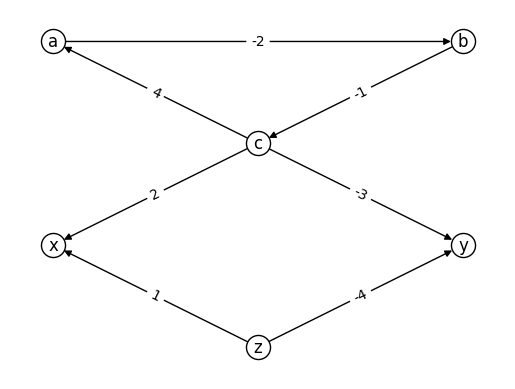

In [ ]:
G1 = nx.DiGraph()
edge_list = [('a','b',-2),
             ('b','c',-1),
             ('c','a',4),
             ('c','x',2),
             ('c','y',-3),
             ('z','y',-4),
             ('z','x',1)]


G1.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)
#pos1=nx.spring_layout(G)
pos1 = {'a':(0,3),
       'b':(.5,3),
       'c':(0.25,2),
       'x':(0,1),
       'y':(.5,1),
       'z':(0.25,0)}

nx.draw(G1, pos1,with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

In [ ]:
##
def johnson(G,source_name = 'SOURCE'):
  source_name = 'SOURCE'
  ##
  def dijkstra_heap(G,s):
    '''
    Invariant 1: elements in heap = vertices of V - X
    Invariant 2: for v not in X, key[v] = smallest Dijkstra greedy score of an edge (u,v) with u in X
    '''
    #  initialise heap to order nodes by shortest distances (0 for root)
    V = [(float('inf'),e) if e!=s else (0,e) for e in list(G.nodes)]
    hq.heapify(V) # turn list into a heap

    # keep track of nodes + shortest paths
    A = {s:0}

    #
    while len(V) > 0:
      _, w = hq.heappop(V) # pick priority
      #print(w)
      # get shortest path to head
      for v in G.predecessors(w):
        if v not in A:
          continue
        l_vw = A[v] + G.get_edge_data(v,w)['weight']
        if l_vw < A[w]:
          A[w] = l_vw

      ## exp: if w not in A, skip loop
      if w not in A: continue

      # get shortest path from head to nodes outside new boundary
      for w_ in G.neighbors(w):
        if w_ in A:
          continue
        #print(A.keys(),w,w_)
        l_ww_ = A[w] + G.get_edge_data(w,w_)['weight']
        if l_ww_ < A.get(w_,float('inf')):
          # replace path lengths for nodes outside new frontier
          V.remove((A.get(w_,float('inf')),w_))

          # update tracking dict
          A[w_] = l_ww_

          # push back onto heap
          hq.heappush(V,(A[w_],w_))

    return A

  ##
  def bellman_ford(G,source):
    '''
    will only detect negative cycles reachable from source
    space optimised
    '''
    # setup
    V = list(G.nodes)
    M = len(G.edges) # no. of edges

    ## Bellman-Ford Algorithm
    # keep track of shortest sub-paths
    A = []
    for i in range(len(V)):
      if i == V.index(source):
        A.append(0)
      else:
        A.append(np.inf)

    # # keep track of last hop
    # B = [None for _ in range(len(V))]

    ##
    for i in range(1,M):
      for vertex in V:
        idx = V.index(vertex)
        # get case 1 (already filled in)
        #A[idx] = A[idx]

        # get case 2 - cycle through in-degrees
        for (w,v) in G.in_edges(vertex):
          candidate = A[V.index(w)] + G.edges[w, v]['weight']
          if candidate < A[idx]:
            A[idx] = candidate
            # B[idx] = w

    # go one more round to check if negative cycle detected
    for vertex in V:
      idx = V.index(vertex)
      # get case 2 - cycle through in-degrees
      for (w,v) in G.in_edges(vertex):
        candidate = A[V.index(w)] + G.edges[w, v]['weight']
        if candidate < A[idx]:
          print('negative cycle detected')
          return None, None

    return A, V

  ### START FUNC HERE ###
  # check
  assert source_name not in G.nodes, 'conflicting source name'
  V = list(G.nodes)
  print(V)

  # step 1: add new source vertex S and all (S,v) = 0 => G'
  G_ = G.copy()
  for v in V:
    G_.add_edge(source_name,v,weight=0)

  # step 2: run Bellman-Ford on G' with source vertex S (half if negative cycle detected)
  SP, SV = bellman_ford(G_,source_name)
  assert SP is not None, 'negative cycle detected'

  # step 3: for each v in G, define Pv & reweight edges
  P = {v:SP[SV.index(v)] for v in SV}
  #P.pop(source_name) # drop source node

  for u,v in G.edges:
    G.edges[(u,v)]['weight'] += P[u] - P[v]

  # step 4: for each vertex of G, run Dijkstra on reweighted edges
  D = np.ones((len(V),len(V))) * np.inf

  for u_idx,u in enumerate(V):
    # get dict of shortest lengths from u to all other vertices
    l = dijkstra_heap(G,u)
    for t,dist in l.items():
      D[u_idx,V.index(t)] = dist

  # step 5: for each pair (u,v) in G, unweight & return shortest path distance
  for u_idx,u in enumerate(V):
    for v_idx,v in enumerate(V):
      D[u_idx,v_idx] += P[v] - P[u]

  return D, V


In [ ]:
D,V = johnson(G1)
print(D)

['a', 'b', 'c', 'x', 'y', 'z']
[[ 0. -2. -3. -1. -6. inf]
 [ 3.  0. -1.  1. -4. inf]
 [ 4.  2.  0.  2. -3. inf]
 [inf inf inf  0. inf inf]
 [inf inf inf inf  0. inf]
 [inf inf inf  1. -4.  0.]]


In [ ]:
# check
A1,B1 = floyd_warshall(G1)
print(A1)
print((A1 == D).all())

['a', 'b', 'c', 'x', 'y', 'z']
[[ 0. -2. -3. -1. -6. inf]
 [ 3.  0. -1.  1. -4. inf]
 [ 4.  2.  0.  2. -3. inf]
 [inf inf inf  0. inf inf]
 [inf inf inf inf  0. inf]
 [inf inf inf  1. -4.  0.]]
True


# NP-COMPLETE PROBLEMS

Many important problems are impossible to solve efficiently.

How do we separate tractable from intractable problems? In short, how can intractability be formalised?

Idea: Amass evidence of intractability via relative difficulty - show that one problem is as hard as (i.e. reduces to) lots of other problems, & therefore unlikely to be in $\text{P}$

---

**$\text{P}$-completeness**


$\text{P}$ is the set of all polynomial-time solvable problems.

A problem is polynomial-time solvable if there is an algorithm that correctly solves it in $O(n^k)$ time, for some constant $k$.

Note: Problems in $\text{P}$ can be thought of as a rough litmus test for computational tractability

---

*Reduction*

Problem $Π_1$ reduces to problem $Π_2$ if: given a polynomial-time subroutine for $Π_2$, we can use it to solve $Π_1$. e.g.
* median computation reduces to sorting
* detecting a cycle reduces to depth-first search
* all-pairs shortest paths reduces to single-source shortest paths

Contrapositive: Suppose $Π_1$ reduces to $Π_2$. If $Π_1$ is not in $\text{P}$, then neither is $Π_2$ (i.e., $Π_2$ is at least as hard as $Π_1$)

---

*Completeness*

Let $\text{C}$ be a set of problems. If
1. $Π \in \text{C}$
2. everything in $\text{C}$ reduces to $Π$

Then $Π$ is the hardest problem in $\text{C}$, and we define $\Pi$ as $\text{C}$-complete.

---

**Travelling Salesman Problem**

- input: complete undirected graph with nonnegative edge costs
- output: a min-cost tour (i.e. cycle that visits every vertex exactly once)

*Conjecture*: There is no polynomial-time algorithm for TSP. [Edmonds '65]

Suppose we want to show that TSP is $\text{C}$-complete for a really big set $\text{C}$.

If we define $\text{C}$ as ALL problems, we can contradict that by the Halting problem (unsolvable by any algorithm [Turing '36]).

We can see that TSP is solvable at least via brute force search, so we can choose $\text{C}$ to be all brute-force-solvable problems. This new definition of $\text{C}$ falls under the (discipline wide) definition of problem set $\text{NP}$.

---

**$\text{NP}$-completeness**

A problem is in $\text{NP}$ if:
1. Solutions always have length polynomial in the input size
2. Purported solutions can be verified in polynomial time

Every problem in $\text{NP}$ can be solved by brute-force search in exponential time (i.e. just check every candidate solution).

By definition of completeness, if there is a polynomial-time algorithm for one $\text{NP}$-complete problem, then it can solve every problem in $\text{NP}$ efficiently (implying that $\text{P}=\text{NP}$)

However:
1. Fact: vast majority of natural computational problems are in $\text{NP}$
2. It is yet unknown if $\text{P}=\text{NP}$

Nonetheless, **$\text{NP}$-completeness is strong evidence of intractability**.

Note: an $\text{NP}$-complete problem encodes simultaneously all problems for which a solution can be efficiently recognised.
* $\text{NP}$-complete problems exist [Cook '71, Levin '73]
* Thousands of natural & important problems (including TSP) are $\text{NP}$-complete [started by Karp '72]

---

*Proving $\text{NP}$-completeness*

To prove a problem $\Pi$ is $\text{NP}$-complete:
1. Find a known $\text{NP}$-complete problem $\Pi'$
2. Prove that $\Pi'$ reduces to $\Pi$

Implies that:
* $\Pi$ is at least as hard as $\Pi'$
* $\Pi$ is $\text{NP}$-complete as well

---

*The $\text{P}$ vs $\text{NP}$ Question*

Is $\text{P} = \text{NP}$?

It is widely conjectured that $\text{P} \neq \text{NP}$, but has not been proved.


---

*Algorithmic approaches to $\text{NP}$-complete problems*

3 useful strategies to solve $\text{NP}$ problems
1. Focus on computationally tractable special cases, e.g.
  * WIS in path graphs
  * Knapsack with polynomial size capacity
  * 2SAT instead of 3SAT
  * Vertex cover when optimal cover is small
2. Heuristics - fast algorithms that are generally but not always correct, e.g.
  * Greedy & DP-based heuristics for knapsack
3. Solve in exponential time, but faster than brute-force search, e.g.
  * Knapsack using DP (even in large size capacity)
  * TSP
  * Vertex cover


# Exact Algorithms for NP-complete

## Vertex Cover Problem

Input: undirected graph $G = (V,E)$

Output: compute a minimum-cardinality vertex cover - a subset $S ⊆ V$ that contains at least one endpoint of each edge $E$.

e.g. a star graph has a vertex cover size of 1, while a clique (fully interconnected) has size $n-1$

*simple approach*
* Given a positive integer $k$ as input, check whether or not there is a vertex cover of with size $\leq k$
* Loop through $k = {1,2,\dots,n}$ and find the smallest $k$, but would take around ${n \choose k} = \Theta(n^k)$ time

---

*substucture lemma*

Consider a graph $G$, edge $(u,v) \in G$, integer $k \geq 1$. Let $G_u$ be $G$ with $u$ and it's incident edges deleted (similarly for $G_v)$. Then, $G$ has a vertex cover of size $k$ i.f.f. either $G_u$ or $G_v$ (or both) has a vertex cover of size $k-1$.

*Proof*:

($⇐$) Suppose $G_u$ has a vertex cover $S$ of size $k-1$ (i.e. no incident edges of $u$ are covered by $S$). Then $E$ can be written as $E = E_u ∪ F_u$, where $E_u =$ all edges inside $G_u$ and $F_u$ all edges incident to $u$.

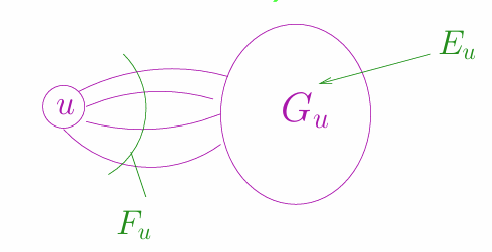

Since $S$ has an endpoint of each edge of $E_u$ but not the endpoint of edges incident to $u$, $S \cup {u}$ is a vertex cover of size $k$ of $G$

($⇒$) Let $S$ be a vertex cover of $G$ of size $k$. Since $(u,v)$ is an edge of $G$, at least one of $u$ or $v$ is in $S$ (say $u$). Since no edges of $E_u$ are incident on $u$, $S - {u}$ must be a vertex cover of size $k-1$ of $G_u$.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
import random

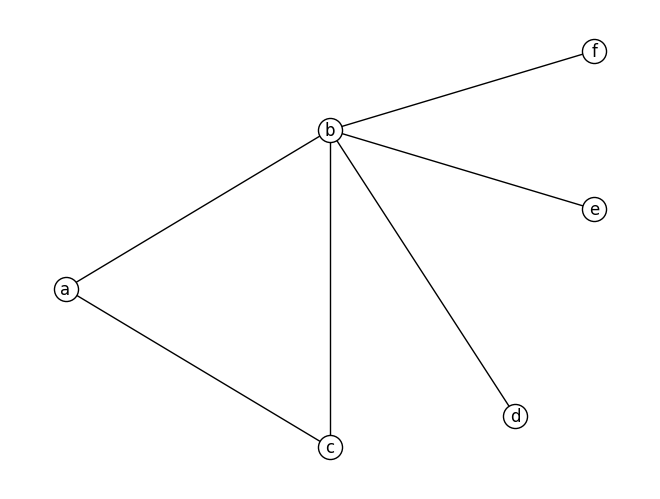

In [ ]:
G1 = nx.Graph()
edge_list = [('a','b'),
             ('b','c'),
             ('c','a'),
             ('b','d'),
             ('b','e'),
             ('b','f')]


G1.add_edges_from(edge_list)
pos1 = {'a':(0.0,0.5),
       'b':(1.0,1.0),
       'c':(1.0,0.0),
       'd':(1.7,0.1),
       'e':(2.0,0.75),
       'f':(2.0,1.25)}

nx.draw(G1, pos1,with_labels=True,node_color='w',edgecolors='k')

In [ ]:
def min_cover(G,k):

  # base cases
  if (k==0):
    print('k == 0, end')
    return None

  print('k is',k)
  n_nodes = G.number_of_nodes()
  if (n_nodes < 2): # no edges
    print('less than 2 nodes')
    return set(G)

  elif (n_nodes == 2): # 1 edge
    print('only 2 nodes')
    return set(random.choice(list(G)))

  # G has >2 vertices & k >= 1
  else:
    if (k == 1):
      print('k is 1, searching for node that is incident to all edges')
      for node in G:
        if len(G.edges(node)) == G.number_of_edges():
          print('node found:',node)
          return set(node)

      print('k is 1, but no encompassing node found')
      return None
    else:
      # pick arbitrary edge
      u,v = random.choice(list(G.edges))
      print(f'edges {u} and {v} selected')
      Gu = G.copy()
      Gv = G.copy()

      # search Gu
      print('searching Gu')
      Gu.remove_node(u)
      print(f'node {u} removed, size of Gu: {Gu.number_of_nodes()}')
      Eu = min_cover(Gu,k-1)
      if Eu is not None:
        print('Gu set found')
        return Eu.union(u)


      # search Gv
      print('searching Gv')
      Gv.remove_node(v)
      print(f'node {v} removed, size of Gv: {Gv.number_of_nodes()}')
      Ev = min_cover(Gv,k-1)
      if Ev is not None:
        print('Gv set found')
        return Ev.union(v)


      # G has no cover with size k
      print('no cover')
      return None



In [ ]:
X = min_cover(G1,3)
print(X)

k is 3
edges b and d selected
searching Gu
node b removed, size of Gu: 5
k is 2
edges a and c selected
searching Gu
node a removed, size of Gu: 4
k is 1
k is 1, searching for node that is incident to all edges
node found: c
Gu set found
Gu set found
{'a', 'c', 'b'}


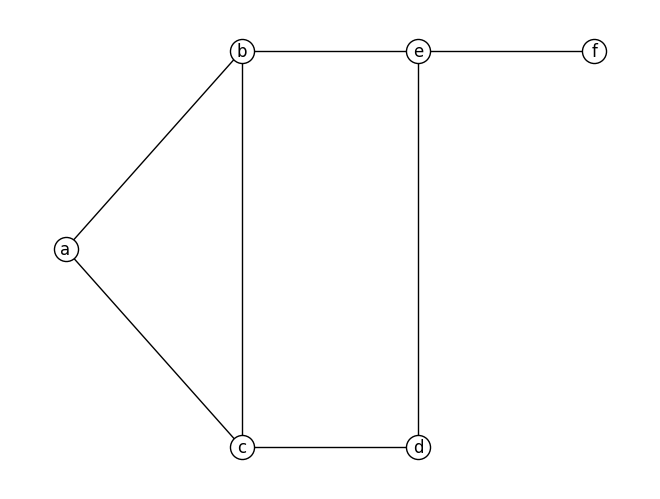

In [ ]:
G2 = nx.Graph()
edge_list = [('a','b'),
             ('b','c'),
             ('c','a'),
             ('c','d'),
             ('b','e'),
             ('e','d'),
             ('e','f')]


G2.add_edges_from(edge_list)
pos2 = {'a':(0.0,1.0),
       'b':(1.0,2.0),
       'c':(1.0,0.0),
       'd':(2.0,0.0),
       'e':(2.0,2.0),
       'f':(3.0,2.0)}

nx.draw(G2, pos2,with_labels=True,node_color='w',edgecolors='k')

In [ ]:
X = min_cover(G2,3)
print(X)

k is 3
edges c and d selected
searching Gu
node c removed, size of Gu: 5
k is 2
edges a and b selected
searching Gu
node a removed, size of Gu: 4
k is 1
k is 1, searching for node that is incident to all edges
node found: e
Gu set found
Gu set found
{'e', 'a', 'c'}


In [ ]:
G2.edges(X)

EdgeDataView([('e', 'b'), ('e', 'd'), ('e', 'f'), ('a', 'b'), ('a', 'c'), ('c', 'b'), ('c', 'd')])

In [ ]:
G2.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'e'), ('c', 'd'), ('d', 'e'), ('e', 'f')])

## Travelling Salesman Problem (DP)

Input: complete undirected graph with nonnegative edge costs

Output: a min-cost tour (i.e. cycle that visits every vertex exactly once)

Brute force search takes $≈n!$ time, tractable for $n$ around 12 or 13

A DP-based algorithm will obtain $O(n^2 2^n)$ running time.

---

Idea: copy the format of the Bellman-Ford algorithm.

*Original Bellman-Ford solution*
* For every edge budget $i \in \{ 0,1,...,n \}$, destination $j \in \{ 0,1,...,n \}$, let $L_{ij} =$ length of shortest path from $1$ to $j$ that uses $\leq i$ edges
* however, this implies that some nodes can (and will) be skipped

*Proposed improvement #1*
* For every edge budget $i \in \{ 0,1,...,n \}$, destination $j \in \{ 0,1,...,n \}$, let $L_{ij} =$ length of shortest path from $1$ to $j$ that uses *exactly* $i$ edges
* however, there is a possibility that some nodes can have repeated visits

*Proposed improvement #2*
* For every edge budget $i \in \{ 0,1,...,n \}$, destination $j \in \{ 0,1,...,n \}$, let $L_{ij} =$ length of shortest path from $1$ to $j$ that uses exactly $i$ edges *and* no repeated vertices
* Use the following recurrence: $L_{ij} = \min_{k \neq i,j} \{ L_{i-1,k} + C_{kj} \}$, where $k$ is some node that is preceeds destination $j$
* Need to remember the identities of vertices visited in subproblem

---

*Substructure lemma*

Let $P$ be the shortest path from $1$ to $j$ that visits the vertices $S \subseteq V$ exactly once each (assume $|S| \geq 2$). If the last hop of $P$ is $(k,j)$, then $P'$ is the shortest path from $1$ to $k$ that visits every vertex of $S - \{ j \}$ exactly once.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy

{(1, 2): Text(0.49999910304904915, 0.9999999999999999, '2'),
 (1, 3): Text(0.0, 0.49999798333738, '1'),
 (1, 4): Text(0.5000010623771232, 0.49999893762287684, '4'),
 (2, 3): Text(0.49999893762287684, 0.49999893762287684, '3'),
 (2, 4): Text(0.9999999999999999, 0.49999798333738, '5'),
 (3, 4): Text(0.49999910304904915, -5.551115123125783e-17, '6')}

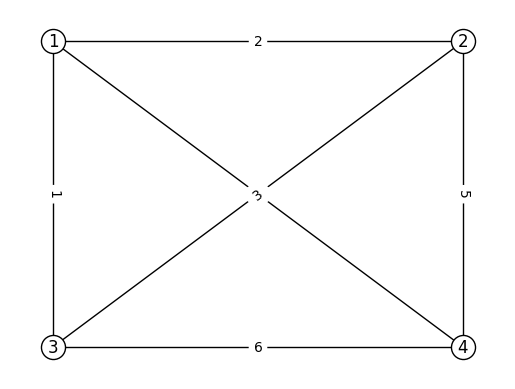

In [ ]:
G1 = nx.Graph()
edge_list = [(1,2,2),
             (1,3,1),
             (1,4,4),
             (2,3,3),
             (2,4,5),
             (3,4,6)]

G1.add_weighted_edges_from(edge_list)
subax1 = plt.subplot(111)

pos1 = {1:(0,1),
        2:(1,1),
        3:(0,0),
        4:(1,0)}

nx.draw(G1, pos1, with_labels=True,node_color='w',edgecolors='k')
labels = nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos1,edge_labels=labels)

In [ ]:
G1.get_edge_data(1,4)['weight']

starting_node = 1

In [ ]:
nodes_indexer = {n:i for i,n in enumerate(G1.nodes)}
subset_indexer = {}
#combs = []

ct = 0
for i in range(len(S)):
  for comb in itertools.combinations(list(nodes_indexer), i+1):
      #combs.append(comb)
      if starting_node in comb:
        subset_indexer.update({frozenset(comb):ct})
        ct += 1

In [ ]:
max_subproblem_size = len(nodes_indexer)
A = np.zeros((len(subset_indexer),max_subproblem_size)) #indexed by Subset & destination

In [ ]:
# start at subproblem size of 1
for S in subset_indexer.keys():
  if S == {starting_node}: #if subset contains origin node in subset of size 1
    A[subset_indexer[S],nodes_indexer[starting_node]] = 0
  else:
    A[subset_indexer[S],nodes_indexer[starting_node]] = np.inf

In [ ]:
# for remaining subproblem sizes from 2 to n
for m in range(2,max_subproblem_size+1):

  for S in subset_indexer.keys():
    if (len(S) == m) and (starting_node in S): # for each set of size m that contains origin

      for j in S:
        if j != starting_node: # for each j in S & when j is not origin, find minimum P' + c_kj
          min_val = np.inf
          for k in S:
            if k != j:
              min_val = min(min_val,A[subset_indexer[S - {j}],nodes_indexer[k]] + G1.get_edge_data(k,j)['weight'])

          A[subset_indexer[S],nodes_indexer[j]] = min_val



In [ ]:
# cost of hop back to origin
for j in nodes_indexer.keys():
  min_val = np.inf
  if j != starting_node: # return minimum value of
    S = frozenset(list(G1.nodes))
    min_val = min(min_val,A[subset_indexer[S],nodes_indexer[j]] + G1.get_edge_data(j,starting_node)['weight'])

print(min_val)

13.0


# Approximation Algorithms for NP-complete

Heuristics provide a quick way to solve NP-complete problems, but with some margin of error (i.e. not always guaranteed to solve problems accurately)

## Greedy Heuristic for Knapsack

Motivation: ideal items have big value, small size.

3-step greedy:
1. Sort items by ratio, i.e. $\frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq \dots \geq \frac{v_n}{w_n}$
2. Pack items in order until 1 doesn't fit, then halt
3. Return either answer from step 2, or maximum valuable next item, whichever is better.

*Example 1*

$$W = 5 \\
v_1 = 2, w_1 = 1 \\
v_2 = 4, w_2 = 3 \\
v_3 = 3, w_3 = 3
$$

Algorithm gives $\{1,2\}$, which is optimal

*Example 2*

$$W = 1000 \\
v_1 = 2, w_1 = 1 \\
v_2 = 1000, w_2 = 1000
$$

Algorithm gives $\{2\}$, which is optimal

Value of the 3-step greedy algorithm's solution is always $\geq$ 50% value of the optimal solution.

---
*Greedy-fractional solution*

What if we were allowed to fully fill the knapsack using fractional value & weight of an item. E.g.

$
W = 3 \\
v_1 = 3, w_1 = 2 \\
v_2 = 2, w_2 = 2
$

Greedy-fractional solution: 100% of $v_1$ + 50% of $v_2$, gives a value of 4.

The Greedy-fractional solution $\geq$ optimal solution for every instance, and can be strict. (i.e. at least as good as every non-fractional feasible solution)

*Proof*
1. Let $S$ be an arbitrarily feasible solution
2. Suppose $l$ units of knapsack filled by $S$, with items not packed by greedy-fractional (i.e. the capacity that is filled differently between optimal & greedy-fractional solution)
3. There must be at least $l$ units of knapsack filled by greedy-fractional, not filled by $S$.
4. By greedy criterion, items in (3) have larger ratio $\frac{v_i}{w_i}$ than those in (2) (i.e. more bang-per-back / valuable use of space)
5. Total value of greedy-fractional solution at least that of $S$.

---

*Analysis*

Suppose step 2 of greedy solution picks the first $k$ items sorted by $v_i/w_i$ (note: may not be optimal solution).

$\text{value of greedy algorithm} \geq \text{total value of 1st } k \text{ items}$

Then, in step 3, because the $(k+1)^{th}$ item also has to be considered

$\text{value of greedy algorithm} \geq \text{value of } (k+1)^{th} \text{ item}$

By summing the 2 equations together

$2 \times \text{value of greedy algorithm} \geq \text{total value of 1st } (k+1) \text{ items}$

We also know that
1. the total value of the 1st $(k+1)$ items is $\geq$ total value of the greedy fractional solution (since 100% of k+1 items may be over the knapsack capacity)
2. total value of the greedy fractional solution $\geq$ optimal knapsack solution

Therefore, by commutativity

$2 \times \text{value of greedy algorithm} \geq \text{optimal solution} ⇒$
$\text{value of greedy algorithm} \geq \text{50%} \times \text{optimal solution}$

---

*Refined analysis*

Suppose every item $i$ has size $w_i \leq$ 10% of knapsack capacity $W$

If step 2 of the greedy algorithm fails to pack all items, then the knapsack is $\geq$ 90% full. Therefore,

$$
\begin{align}
\text{value of 2-step greedy algorithm} &\geq \text{90%} \times \text{value of greedy-fractional solution} \\
&\geq \text{90%} \times \text{value of optimal solution}
\end{align}
$$

In general, if $\max_i w_i \leq δW$, then 2-step greedy value is $\geq (1-\delta) \times \text{optimal}$





## DP Heuristic for Knapsack


*Arbitrarily good approximation*

*Goal*: for a user-specified parameter $ϵ > 0$, guarantee a $(1-\epsilon)$-approximation, i.e. if $ϵ = 0.01$, then a 99% accurate solution will be calculated.
* Caveat: runtime will increase as $ϵ$ decreases (runtime vs accuracy tradeoff)

---

High level idea for knapsack problem: exactly solve a slightly incorrect but easier knapsack instance.
* if $w_i$'s & $W$ are integers, DP can solve knapsack in $O(nW)$ time
* if $v_i$'s are integers, DP can solve knapsack in $O(n^2 v_{max})$ time, where $v_{max} = \max_{i} v_i$ [shown below]

So if all $v_i$'s are small integers (polynomial in $n$) then there already exists a poly-time algorithm; capitalise on this by throwing out lower-order bits of the $v_i$'s.

---

**Algorithm**

2 steps:
1. Round down each $v_i$ to the nearest multiple of $m$ & divide by $m$ to get integers; i.e. $\hat{v}_i = ⌊ \frac{v_i}{m} ⌋$
  * larger $m ⇒$ less accurate
  * $m$ depends on $ϵ$
2. Use DP to solve knapsack instance with $\hat{v}_1, \hat{v}_2, \dots, \hat{v}_n$

Runtime will thus be $O(n^2 \max_{i} \hat{v}_i)$
* larger $m ⇒$ smaller $\max_{i} \hat{v}_i ⇒$ shorter runtime
* Computes a feasible solution to the original instance

---

*Alternative exact DP solution*

Previous instantiation kept track of values of item combinations. Now instead, keep track of weights of item combinations (so there is no need to assume that $W$ is an integer).

*subproblems*
* keep track of items $i = 0,1,...,n$, and values $x = 0,1,...,n \cdot v_{max}$
  * note that $n \cdot v_{max}$ can also be replaced by $\sum_i v_{i}$
* define $S_{i,x} =$ minimum total size needed to achieve value $\geq x$ while using only the first $i$ items ($+∞$ if impossible)

*recurrence*

$
S_{i,x} = \min
\begin{cases}
S_{(i-1),x} \\
w_i + S_{(i-1),(x-v_i)}
\end{cases}
$

In [ ]:
import numpy as np

In [ ]:
# data
W = 6
N = [(4,2),(3,4),(2,3),(4,3)]

# preprocess (sort by ratio)
V = sorted([(v/w,(v,w)) for v,w in N],reverse=True)
N = [v[1] for v in V]
print(N)

[(4, 2), (4, 3), (3, 4), (2, 3)]


In [ ]:
# initialise A to keep track of value S(i,x)
# value of x keeps track of the minimum total size needed to achieve said value while using only the first i items

n = len(N)
v_max = max([v for v,_ in N])

A = np.zeros((n+1,(n*v_max)+1))
for x in range((n*v_max)+1):
  if x != 0:
    A[0,x] = np.inf

print(A.shape)

(5, 17)


In [ ]:
# get optimal value
for i in range(1,n+1):
  for x in range((n*v_max)+1):
    v_i, w_i = N[i-1]

    # case 1:  item i not used in optimal solution
    c1 = A[i-1,x]

    # case 2: item i used in optimal solution
    c2 = w_i + A[i-1,max(0,x-v_i)] # interpret as 0 if v_i > x

    A[i,x] = min(c1,c2)


In [ ]:
optimal_val = max([idx for idx,w in enumerate(A[-1,:]) if w <= W])
print(optimal_val,'\n', A)

8 
 [[ 0. inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf]
 [ 0.  2.  2.  2.  2. inf inf inf inf inf inf inf inf inf inf inf inf]
 [ 0.  2.  2.  2.  2.  5.  5.  5.  5. inf inf inf inf inf inf inf inf]
 [ 0.  2.  2.  2.  2.  5.  5.  5.  5.  9.  9.  9. inf inf inf inf inf]
 [ 0.  2.  2.  2.  2.  5.  5.  5.  5.  8.  8.  9. 12. 12. inf inf inf]]


---

**Determining $m$**

Since we rounded down $v_i$ to the nearest multiple of $m$, then can work backwards to find the range of values of $m \cdot \hat{v}_i \in [v_i - m, v_i]$ for each item $i$.

This gives us 2 inequalities:
1. $v_i \geq m \cdot \hat{v}_i$
2. $m \cdot \hat{v}_i \geq v_i - m$

Now, if we let $S^{*}$ be the optimal solution to the original problem (with original $v_i$'s), and $S$ be our heuristic's solution, then we have a third inequality:
3. $∑_{i \in S} \hat{v}_i \geq ∑_{i \in S^{*}} \hat{v}_i$
  * since $S$ is optimal for the $v_i$'s, it may include more items (but never less) than $S^{*}$


Combining these 3 inequalities together (summing across all $i$'s in inequalities 1 & 2):

$$
\sum_{i \in S} v_i \geq m\sum_{i \in S} \hat{v}_i \geq m\sum_{i \in S^{*}} \hat{v}_i \geq \sum_{i \in S^{*}} (v_i - m)
$$

Note that $S^{*}$ contains at most $n$ items, so we can set a rough lower bound for the combined inequality

$$
\sum_{i \in S} v_i \geq \left( \sum_{i \in S^{*}} v_i \right) - mn
$$


Recall that the constraint using $\epsilon$ was such that our heuristic solution achieves within $(1-ϵ)$ factor of the optimal solution, thus:

$\sum_{i \in S} v_i \geq (1-ϵ) \sum_{i \in S^{*}} v_i$


Expanding the right-hand side out, we can see that $mn$ is conjugate to $ϵ \sum_{i \in S^{*}} v_i$, i.e. the error term. Since we want to minimise the error, we want to make sure that

$$mn \leq ϵ \sum_{i \in S^{*}} v_i$$

However, we don't know what $S^{*}$ is (it is the solution we are trying to find). Nonetheless we can make a rough assumption on the lower bound of the right-hand side, since
* items to consider will individually fit within the capacity (i.e. delete $w_i$'s which are $>W$ in preprocessing)
* considered items will at least be the value of $v_{max}$ (excluding those removed in preprocessing)

This means that in the worst case scenario:
$$
mn = ϵ v_{max} ⇒ m = \frac{ϵ v_{max}}{n}
$$

Note that $m$ can be set lower than this value.

---

*Running time*

Setting $m = \frac{ϵ v_{max}}{n}$ guarantees that the value of heuristic solution is $\geq (1-ϵ)$ of the optimal solution

Recall that the runtime is $O(n^2 \hat{v}_{max})$.

Note that for every item $i$, $\hat{v}_i \leq \frac{v_i}{m} \leq \frac{v_{max}}{m}$

Substituting in the previously calculated value of $m$

$$
\begin{align}
\frac{v_{max}}{m} &= v_{max} \cdot \frac{n}{ϵ v_{max}} \\
&=  \frac{n}{ϵ}
\end{align}
$$

Therefore the running time is $O(n^3 / ϵ)$, where we can see that setting larger values of $ϵ$ decreases the runtime (and vice versa).

# Local Search Algorithms

## Maximum Cut Problem

*Goal*: Given an undirected graph $G = (V,E)$, find a cut $(A,B)$ that partitions all vertices $V$ into two non-empty sets that maximises the number of crossing edges
- inverse of the minimum cut problem

Problem is NP-complete except for when the graph is bipartite (a cut such that all edges are crossing)

---
*Local search algorithm*

For a cut $(A,B)$ and a vertex $v \in V$, define
* $c_v(A,B)$ be the number of edges incident on $v$ that cross $(A,B)$
* $d_v(A,B)$ be the number of edges incident on $v$ that do not cross $(A,B)$

Then,
1. Let $(A,B)$ be a arbitrary cut of $G$
2. While there is a vertex $v$ with $d_v(A,B) > c_v(A,B)$, move $v$ to the other side of the cut
  * increases the number of crossing edges by $d_v(A,B) - c_v(A,B) >0$
3. Return final cut $(A,B)$ after loop ends

This algorithm terminates within $n \choose 2$ iterations (polynomial runtime)

---
*performance guarantees*

Local search algorithm always outputs a cut in which the number of crossing edges is at least 50% of the maximum possible (i.e. $\frac{1}{2} |E|$)

However, this is the expected number of crossing edges of a random cut.


*proof*:
1. Let $(A,B)$ be a locally optimal cut. Then for every vertex $v$, $d_v(A,B) \leq c_v(A,B)$
2. Summing over all $v \in V$, $$\sum_{v \in V} d_v(A,B) \leq \sum_{v \in V} c_v(A,B)$$
  * $\sum_{v \in V} d_v(A,B)$ counts each non-crossing edge twice
  * $\sum_{v \in V} c_v(A,B)$ counts each crossing edge twice
3. Then
$$
\begin{align}
2 \cdot \text{# of non-crossing edges} &\leq 2 \cdot \text{# of crossing edges} \\
2 \cdot [\text{# of non-crossing edges} + \text{# of crossing edges}] &\leq 4 \cdot \text{# of crossing edges} \\
2 \cdot |E| &\leq 4 \cdot \text{# of crossing edges} \\
\text{# of crossing edges} &\geq \frac{1}{2} \cdot |E| \\
\end{align}
$$

---
*Extension - weighted maximum cut problem*

Each edge $e \in E$ has a non-negative weight $w_e$, and goal is to maximise the total weight of crossing edges.
1. Local search still well defined
2. Performance guarantee of 50% still holds for locally optimal cuts
3. No longer guaranteed to converge in polynomial time (non-trivial proof)

## Principles

Key idea behind Local Search algorithms is the concept of searching a "neighbourhood" of solutions

Let $X$ be a set of candidate solutions (e.g. cuts of a graph, TSP tours, constraint satisfaction variable assignments)

For each $x \in X$, specify which $y \in X$ are its neighbours; e.g.
* cuts: differ by moving one vertex from $A$ to $B$
* variable assignments: differ in the value of a single variable
* TSP tours: tours that differ by 2 edges

---
*generic template for local search algorithms*

1. Let $x$ = some initial solution
2. While current solution $x$ has superior neighbouring solution $y$, set $x := y$
3. Return the final (locally optimal) solution $x$.

---
**FAQ**

1. How to pick solution $x$?
 * Answer #1, if algorithm is used as the main source of finding solutions: run many independent trials
 * Answer #2, if algorithm is used as a postprocessing check: use best heuristics to see if solution can be even better
2. If there are multiple superior $y$'s, which one to choose?
 * Answer: highly dependent on domain knowledge. Options are: 1) at random, 2) biggest improvement, 3) more complex heuristics (domain dependent)
3. How to define neighbourhoods?
 * Answer: Find sweet spot between solution quality & efficient searchability. Bigger neighbourhoods = slower verification of local optimality, but more bad options eliminated (and vice versa)
4. Is local search guaranteed to terminate?
 * Answer: Yes if $X$ is finite, and if every local step improves some objective function
5. Is local search guaranteed to converge quickly?
 * Answer: usually not, though often does in practice
6. Are locally optimal solutions generally good approximations to globally optimal ones?
 * Answer: No, but running many randomised local searches (& remembering the best locally optimal solution) can mitigate it

## 2-SAT problem

Given $n$ Boolean variables $x_1,x_2,\dots,x_n$, and $m$ clauses of 2 literals ('literal' = $x_i$ or $\lnot x_i$), output "yes" if there is an assignment that simultaneously satisfies every clause, "no" otherwise.

*Example*

Variables: $\{x_1,x_2,x_3,x_4\}$

Clauses: $(x_1 \lor x_2) \land (\lnot x_1 \lor x_3) \land (x_3 \lor x_4) \land (\lnot x_2 \lor \lnot x_4)$

Output: $\text{TRUE}$ when $x_1 = x_3 = \text{TRUE}$ and $x_2 = x_4 = \text{FALSE}$


---

2-SAT problem, as an exception, is tractable and can be solved in polynomial time with solutions such as
* reducing to computing strongly connected components (nontrivial exercise)
* "backtracking" (nontrivial proof)
* randomised local search

3-SAT however is the canonical NP-complete intractable problem; brute force search takes $O(2^n)$ time (but it is possible to get $O(\frac{4}{3}^n)$ time via randomised local search)



In [ ]:
import random
import math

In [ ]:
# clauses as dictionary, key = evaluation, value = indices of literals used
C = {(lambda X: (X[0]       | X[1]      )):[0,1],
     (lambda X: ((not X[0]) | X[2]      )):[0,2],
     (lambda X: (X[2]       | X[3]      )):[2,3],
     (lambda X: ((not X[1]) | (not X[3]))):[1,3]}


# create quick eval function to crosscheck
Y = lambda X: all([k(X) for k in C.keys()])

In [ ]:
# check eval function is working (should return False)
Y([True,True,True,True])

False

In [ ]:
def papadimitriou(n:int,clauses:dict):

  # outer loop
  for _ in range(math.ceil(math.log(n,2))):

    # choose random initial assignment
    X = [random.choice([True,False]) for _ in range(n)]

    # inner loop
    for _ in range(2*n**2):

      # evaluate all clauses, keep track of unmet clauses
      errs = set([])
      for m,idxs in clauses.items():
        if not m(X): #if unmet
          errs = errs.union(idxs)

      # if current assignment satisfies all clauses, halt & report this
      if len(errs) == 0:
        return X
      # else, pick arbitrary unsatisfied clause and flip value of one of its variables
      else:
        idx = random.choice(list(errs))
        X[idx] = not X[idx]

  return False

In [ ]:
A = papadimitriou(4,C)
print(A, Y(A))

[True, False, True, True] True


---

Key to analyse Papadimitriou's algorithm is random walks on nonnegative integers


*Expected steps to reach a destination via random walk*

Given the path below
```
0 - 1 - 2 - ... - (n-1) - n - (n+1) - ...
```

Initially, start at position $0$. At each time step, position goes up or down by 1 with 50/50 probability (with the exception of position $0$, $Pr[\text{right}| 0] = 1$)

Let $Z_i$ = number of random walk steps to get to position $n$ from position $i$.

Edge cases:
* $E[Z_n] = 0$, need 0 steps to get from $n$ to $n$
* $E[Z_0] = 1 + E[Z_1]$, need 1 more step to get from $0$ to $n$ than from $1$ to $n$

For $i \in \{1,2,\dots,n-1\}$,
$$
\begin{align}
E[Z_i] &= Pr[\text{go left}] \cdot E[Z_i | \text{go left}] + Pr[\text{go right}] \cdot E[Z_i | \text{go right}] \\
&= \frac{1}{2} (1 + E[Z_{i-1}]) + \frac{1}{2} (1 + E[Z_{i+1}]) \\
&= 1 + \frac{1}{2}E[Z_{i+1}] + \frac{1}{2}E[Z_{i-1}]
\end{align}
$$
  * Note: intepretation of $E[Z_i | \text{go left}]$ - the expected number of steps it takes to reach $n$ from $i$ given that you take 1 step to the left, i.e. the 1 step it takes to go from $i$ to $i-1$ + the (expectation of the) remaining steps it takes to reach from $i-1$ to $n$. (vice versa for $E[Z_i | \text{go right}]$)

Rearranging & multuplying both sides by $2$,
$$
E[Z_i] - E[Z_{i+1}] = E[Z_{i-1}] - E[Z_i] + 2
$$
  * Intuitively, it takes more steps to reach $n$ if you move left, and less if you move right; and the relative advantage it takes to reach $n$ from starting at $i+1$ is 2 more than starting at $i$

Now, summing up all expectations
$$
\begin{align}
E[Z_0] - E[Z_1] &= 1 \\
E[Z_1] - E[Z_2] &= 3 \\
E[Z_2] - E[Z_3] &= 5 \\
\vdots \\
E[Z_{n-1}] - E[Z_n] &= 2n-1 \\
\end{align}
$$

Summing all together, consecutive $E[Z_i]$'s cancel out,
$$
\begin{align}
\sum_{i=0}^{n-1} \left( E[Z_i] - E[Z_{i+1}]  \right) &= 1 + 3 + 5 + \cdots + 2n-1\\
E[Z_0] - E[Z_n] &= n^2
\end{align}
$$
  * Note: if $n$ is even, then sum is $\frac{n}{2}$ pairs times $2n$ (1st + last terms, 2nd + 2nd last terms, 3rd + 3rd last terms, etc.); if $n$ is odd then $\frac{n-1}{2} \times 2n + n$, both of which equal to $n^2$

and since $E[Z_n] = 0$,

$$E[Z_0] = n^2$$

Therefore, it takes an expected $n^2$ steps until a random walk reaches position $n$, which we denote as $T_n$

---

The corollary of the random walk analysis gives us an upper-bound on Papadimitriou's algorithm,

$$
Pr[T_n > 2n^2] \leq \frac{1}{2}
$$

Note: this is a special case of Markov's inequality

*Proof*

By the random walk analysis above, we have $E[Z_0] = E[T_n] = n^2$

By expanding out the definition of $E[T_n]$, splitting the sum at $2n^2$
$$
E[T_n] = \sum_{k=0}^{2n^2} k Pr[T_n = k] + \sum_{k=2n^2 + 1}^{∞} k Pr[T_n = k]
$$

We can bound the terms as follows:
* in the first summation, $\sum_{k=0}^{2n^2} k Pr[T_n = k] \geq 0$, as we know it will be non-negative
* in the 2nd summation, roughly lower-bound $k \geq 2n^2$, as it will always be bigger than that (given the starting value of the 2nd summation)

Thus we can rewrite the equation as follows:
$$n^2 \geq 2n^2 \cdot Pr[T_n > 2n^2]$$

Since $\sum_{k=2n^2 + 1}^{∞} Pr[T_n = k] =  Pr[T_n \geq 2n^2 +1] =  Pr[T_n > 2n^2]$ (as $n$'s are integers)

Therefore,

$$Pr[T_n > 2n^2] \leq \frac{1}{2}$$

---

**Analysis of Papadimitriou's algorithm**

First, focus on a single iteration of the outer loop.

Fix an arbitrary satisfying assignment $a^*$

Let $a_t$ be the algorithm's assignment after inner iteration $t \in \{0,1,2,...,2n^2\}$

Let $X_t$ be the number of variables on which $a_t$ and $a^*$ agree, which means $X_t \in \{0,1,2,...,n\}$
* Note: if $X_t = n$, it means algorithm halts with assignment $a^*$

Now, suppose $a_t$ is not a satisfying assignment, and algorithm picks unsatisfied clause with variables $x_i,x_j$. Since $a^*$ is satisfying, it makes a different assignment than $x_i$ or $x_j$, or both. 2 scenarios of the consequences of flipping one of the variables:
1. If $a^*$ and $a_t$ differ on both $x_i$ & $x_j$, then $X_{t+1} = X_{t} + 1$
2. If $a^*$ and $a_t$ differ on exactly one of $x_i$ or $x_j$, then
$$ X_{t+1} =
\begin{cases}
X_t + 1 \\
X_t - 1
\end{cases}
$$ both events with 50% probability

In the corollary of the random-walk scenario, we proved that the probability of reaching position $n$ within $2n^2$ steps is at least half. While the random variables $X_0, X_1, ..., X_{2n^2}$ behave almost like the random walk of nonnegative integers, there are 3 key differences
1. Moving right - going from $X_i$ to $X_{i+1}$ - happens with >50% probability (as sometimes $a^*$ and $a_t$ differ on both $x_i$ & $x_j$)
2. $X_0$ generally has a value more than 0
3. Algorithm might find a satisfying solution that is not $a^*$ (i.e. stop before $X_t = n$)

Thus in the worst case scenario, the probability of one iteration of the inner loop failing is at most half. Then,

$$
\begin{align}
Pr[\text{algorithm fails}] &\leq Pr[\text{all } \log_{2}{n} \text{ independent trials fail}] \\
&\leq (\frac{1}{2})^{\log_{2}{n}} \\
&\leq \frac{1}{n}
\end{align}
$$


Therefore

$$Pr[\text{algorithm succeeds}] \geq 1-\frac{1}{n}$$


# OTHER ALGORITHMS

# Stable Matching

Consider 2 sets of nodes, $U$ and $V$ (historically called "men" and "women"). For simplicity, assume $|U| = |V| = n$.
* Examples: hospitals & residents, colleges & applicants

*Stable Matching*

A perfect matching (i.e. matches each node of $U$ to a distinct node of $V$) such that, if $u \in U$ and $v \in V$ are not matched, then
* either $u$ likes it's mate $v'$ better than $v$,
* or $v$ likes it's mate $u'$ better than $u$

---

**Gale-Shapely Algorithm** terminates with stable matching after $\leq n^2$ iterations,and a perfect matching solution always exists.

*Proof*
1. Each man makes $\leq n$ proposals $⇒ \leq n^2$ iterations
2. terminates with perfect matching: suppose if some $u$ was rejected by all $v$'s, then it means that all $v$'s are engaged at conclusion of algorithm (since $v$'s can only reject if they are engaged). However there are an equal number of $u$'s as $v$'s, thus it cannot be possible to have unmatched $u$'s at the end of the algorithm
3. terminates with stable matching: consider two unmatched nodes $u$ and $v$, so either
  * Case 1: $u$ never proposed to $v$, therefore $u$ is matched to some node he prefers to $v$
  * Case 2: $u$ proposed to $v$, but it must mean $v$ has gotten a preferred offer (i.e. not $u$) and therefore $v$ is matched to some node she prefers to $u$

In [ ]:
import random

In [ ]:
def gale_shapely(U:dict,V:dict):
  assert len(U) == len(V), 'both sets must have same number of nodes'
  N = len(U)
  attached = {}

  M = list(U.keys())
  W = list(V.keys())

  while True:
    u = random.choice(M)
    print('man',u)

    v = U[u]['pref'].pop(0)
    print('woman',v)

    curr_part = attached.get(v,None) #V[v]['part']
    if curr_part is None: # if first proposal
      #V[v]['part'] = u
      attached.update({v:u}) #u:v
      M.remove(u)
      print(f'no prop yet, engaging {u} to {v}')

    else:
      if V[v]['pref'].index(u) < V[v]['pref'].index(curr_part): # if v prefers new partner
        attached.pop(v) #attached.pop(curr_part) #remove current partner matching from final mapping
        attached.update({v:u}) #u:v

        M.append(curr_part)
        M.remove(u)

        #V[v]['part'] = u
        print(f'{v} prefers {u} to old {curr_part}, engaging {u} to {v}')
      else:
        print(f'{v} prefers curr {curr_part} to {u}')

    if len(attached) == N:
      return attached

In [ ]:
U = {'A':{'pref':['D','E','F']},
     'B':{'pref':['D','E','F']},
     'C':{'pref':['D','E','F']}}

V = {'D':{'pref':['A','B','C']},
     'E':{'pref':['B','C','A']},
     'F':{'pref':['C','A','B']}}

In [ ]:
A = gale_shapely(U,V)

man C
woman D
no prop yet, engaging C to D
man B
woman D
D prefers B to old C, engaging B to D
man A
woman D
D prefers A to old B, engaging A to D
man C
woman E
no prop yet, engaging C to E
man B
woman E
E prefers B to old C, engaging B to E
man C
woman F
no prop yet, engaging C to F


In [ ]:
A

{'D': 'A', 'E': 'B', 'F': 'C'}

# Bipartite Matching

Given a graph $G = (U,V,E)$, where each edge $e \in E$ has one endpoint in each of $U$ and $V$, compute a matching $M ⊆ E$ of maximum size, i.e. a set of the edges chosen in such a way that no two edges share an endpoint.
* Note: there can be multiple solutions to this problem

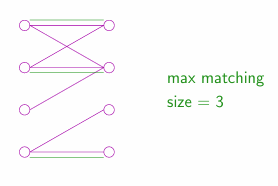

This problem is solvable in polynomial time (and even if the graph is not bipartite). However the bipartite matching problem in particular can be reduced to the maximum flow problem

# Maxmimum Flow

Given a directed graph $G = (V,E)$, with
* source vertex $s$
* sink vertex $t$
* each edge has a capacity $u_e$

Compute the $s-t$ flow that sends as much flow as possible.

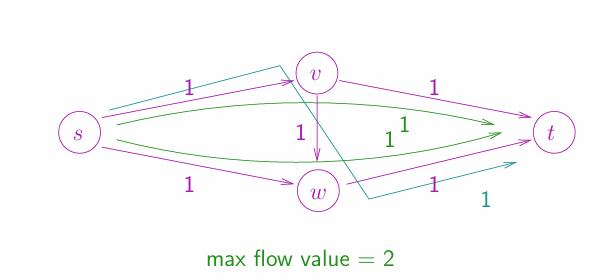

In the example graph, the maximum flow is 2 ($s-v-t$ and $s-w-t$). The problem is solvable in polynomial time via non-trivial greedy algorithms, based on "augmenting paths". Note that naive greedy algorithm would output $s-v-w-t$, which is not the solution (flow value of 1) as routing the flow though $v$ and $w$ ends up "blocking" the optimal paths.

# Selfish Flow - Braess' Paradox

Given a flow network, where each edge has a delay function, i.e
* if some edges have fixed delays, i.e. regardless of traffic it takes 1 hour to traverse
* other edges have linear delays, i.e. if 100% of traffic uses the edge it takes 1 hour to traverse, 50% = 30mins etc.


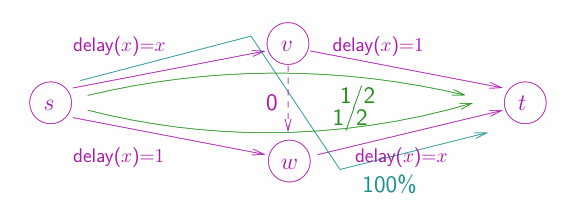


At a steady state, going through either $s-v-t$ or $s-w-t$ paths, with a 50/50 split, results in an average commute time of 1.5 hours

Now suppose a teleportation device is added between nodes $v$ to $w$. Path $s-v-w-t$ could take 1 hour in total. However, as more drivers discover the shorter path, traffic is redirected though $v-w$. The commute time of selfish traffic now degrades to 2 hours (as 100% of traffic routes through $w-t$).

# Linear Programming

Optimise a linear function given some constraints, i.e. over the intersection of halfspaces.

This can be a generalisation of the maximum flow problem, and applicable to tons of other problems

Linear programs can be solve efficiently (c.f. Dantzig's simplex algorithm), and modern day approaches utilise powerful "black box" subroutines.

Exentions:
* convex programming (polynomial time solvable under mild conditions)
* integer programming - constraining certain decision variables to be integers (NP-hard in general)

# Other topics & models not covered

1. Deeper study of data structures, graph algorithms, approximation algorithms etc.
2. Geometric algorithms
  * Low-dimensional (e.g. convex hull)
  * High-dimensional (e.g. nearest neighbours in information retrieval)
3. Algorithms that run forever, usually in real-time (e.g. caching, routing)
4. Bounded memory "streaming algorithms", where data is too large to fit into memory (e.g. maintaining statistics at a network router)
5. Exploiting parallelism (e.g. via Map-Reduce)


*N.B. this course was taught about 2016, so some information may be outdated.*

https://www.coursera.org/specializations/algorithms